In [1]:
!pip install ace_tools

In [2]:
!pip install psycopg2

In [3]:
!pip install xgboost

In [4]:
import pandas as pd
import psycopg2
import sqlalchemy as sa
from urllib.parse import quote_plus
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [5]:
def create_connection():
    try:
        connection = psycopg2.connect(
            host="127.0.0.1",
            port="5432",
            database="houseprice",
            user="postgres",
            password="162710"  # Ensure this matches the updated password
        )
        cursor = connection.cursor()
        print("Connection established successfully!")
        return connection, cursor
    except OperationalError as e:
        print(f"OperationalError: {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")
    return None, None

connection, cursor = create_connection()

Connection established successfully!


In [6]:
rawdata=pd.read_sql('Select * from rawdata',connection)

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\2486451114.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rawdata=pd.read_sql('Select * from rawdata',connection)


In [7]:
rawdata

id bldgtype housestyle  yearbuilt  yearremodadd roofstyle roofmatl  \
0        1     1Fam     2Story       2003          2003     Gable  CompShg   
1        2     1Fam     1Story       1976          1976     Gable  CompShg   
2        3     1Fam     2Story       2001          2002     Gable  CompShg   
3        4     1Fam     2Story       1915          1970     Gable  CompShg   
4        5     1Fam     2Story       2000          2000     Gable  CompShg   
...    ...      ...        ...        ...           ...       ...      ...   
2914  2915    Twnhs     2Story       1970          1970     Gable  CompShg   
2915  2916   TwnhsE     2Story       1970          1970     Gable  CompShg   
2916  2917     1Fam     1Story       1960          1996     Gable  CompShg   
2917  2918     1Fam     SFoyer       1992          1992     Gable  CompShg   
2918  2919     1Fam     2Story       1993          1994     Gable  CompShg   

     foundation  overallqual  overallcond  ... neighborhood condition1  \
0         PConc            7            5  ...      CollgCr       Norm   
1        CBlock            6            8  ...      Veenker      Feedr   
2         PConc            7            5  ...      CollgCr       Norm   
3        BrkTil            7            5  ...      Crawfor       Norm   
4         PConc            8            5  ...      NoRidge       Norm   
...         ...          ...          ...  ...          ...        ...   
2914     CBlock            4            7  ...      MeadowV       Norm   
2915     CBlock            4            5  ...      MeadowV       Norm   
2916     CBlock            5            7  ...      Mitchel       Norm   
2917      PConc            5            5  ...      Mitchel       Norm   
2918      PConc            7            5  ...      Mitchel       Norm   

      condition2 miscfeature  miscval  mosold  yrsold  saletype  \
0           Norm        None        0       2    2008        WD   
1           Norm        None        0       5    2007        WD   
2           Norm        None        0       9    2008        WD   
3           Norm        None        0       2    2006        WD   
4           Norm        None        0      12    2008        WD   
...          ...         ...      ...     ...     ...       ...   
2914        Norm        None        0       6    2006        WD   
2915        Norm        None        0       4    2006        WD   
2916        Norm        None        0       9    2006        WD   
2917        Norm        Shed      700       7    2006        WD   
2918        Norm        None        0      11    2006        WD   

      salecondition saleprice  
0            Normal  208500.0  
1            Normal  181500.0  
2            Normal  223500.0  
3           Abnorml  140000.0  
4            Normal  250000.0  
...             ...       ...  
2914         Normal       NaN  
2915        Abnorml       NaN  
2916        Abnorml       NaN  
2917         Normal       NaN  
2918         Normal       NaN  

[2919 rows x 81 columns]

In [8]:
dublication=rawdata.duplicated().sum()
dublication

0

In [9]:
test=rawdata[rawdata['saleprice'].isna()]

In [10]:
test

id bldgtype housestyle  yearbuilt  yearremodadd roofstyle roofmatl  \
1460  1461     1Fam     1Story       1961          1961     Gable  CompShg   
1461  1462     1Fam     1Story       1958          1958       Hip  CompShg   
1462  1463     1Fam     2Story       1997          1998     Gable  CompShg   
1463  1464     1Fam     2Story       1998          1998     Gable  CompShg   
1464  1465   TwnhsE     1Story       1992          1992     Gable  CompShg   
...    ...      ...        ...        ...           ...       ...      ...   
2914  2915    Twnhs     2Story       1970          1970     Gable  CompShg   
2915  2916   TwnhsE     2Story       1970          1970     Gable  CompShg   
2916  2917     1Fam     1Story       1960          1996     Gable  CompShg   
2917  2918     1Fam     SFoyer       1992          1992     Gable  CompShg   
2918  2919     1Fam     2Story       1993          1994     Gable  CompShg   

     foundation  overallqual  overallcond  ... neighborhood condition1  \
1460     CBlock            5            6  ...        NAmes      Feedr   
1461     CBlock            6            6  ...        NAmes       Norm   
1462      PConc            5            5  ...      Gilbert       Norm   
1463      PConc            6            6  ...      Gilbert       Norm   
1464      PConc            8            5  ...      StoneBr       Norm   
...         ...          ...          ...  ...          ...        ...   
2914     CBlock            4            7  ...      MeadowV       Norm   
2915     CBlock            4            5  ...      MeadowV       Norm   
2916     CBlock            5            7  ...      Mitchel       Norm   
2917      PConc            5            5  ...      Mitchel       Norm   
2918      PConc            7            5  ...      Mitchel       Norm   

      condition2 miscfeature  miscval  mosold  yrsold  saletype  \
1460        Norm        None        0       6    2010        WD   
1461        Norm        Gar2    12500       6    2010        WD   
1462        Norm        None        0       3    2010        WD   
1463        Norm        None        0       6    2010        WD   
1464        Norm        None        0       1    2010        WD   
...          ...         ...      ...     ...     ...       ...   
2914        Norm        None        0       6    2006        WD   
2915        Norm        None        0       4    2006        WD   
2916        Norm        None        0       9    2006        WD   
2917        Norm        Shed      700       7    2006        WD   
2918        Norm        None        0      11    2006        WD   

      salecondition saleprice  
1460         Normal       NaN  
1461         Normal       NaN  
1462         Normal       NaN  
1463         Normal       NaN  
1464         Normal       NaN  
...             ...       ...  
2914         Normal       NaN  
2915        Abnorml       NaN  
2916        Abnorml       NaN  
2917         Normal       NaN  
2918         Normal       NaN  

[1459 rows x 81 columns]

In [11]:
train=rawdata.dropna(subset=['saleprice'])

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   bldgtype       1460 non-null   object 
 2   housestyle     1460 non-null   object 
 3   yearbuilt      1460 non-null   int64  
 4   yearremodadd   1460 non-null   int64  
 5   roofstyle      1460 non-null   object 
 6   roofmatl       1460 non-null   object 
 7   foundation     1460 non-null   object 
 8   overallqual    1460 non-null   int64  
 9   overallcond    1460 non-null   int64  
 10  bsmtexposure   1422 non-null   object 
 11  bsmtfintype1   1423 non-null   object 
 12  bsmtfinsf1     1460 non-null   float64
 13  bsmtfintype2   1422 non-null   object 
 14  bsmtfinsf2     1460 non-null   float64
 15  bsmtunfsf      1460 non-null   float64
 16  totalbsmtsf    1460 non-null   float64
 17  bsmtfullbath   1460 non-null   float64
 18  bsmthalfbath 

In [13]:
total=train.isnull().sum().sort_values(ascending=False)
percent=((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
missing=pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing.head(60)

Total    Percent
poolqc          1453  99.520548
miscfeature     1406  96.301370
alley           1369  93.767123
fence           1179  80.753425
fireplacequ      690  47.260274
lotfrontage      259  17.739726
garagefinish      81   5.547945
garagequal        81   5.547945
garagecond        81   5.547945
garageyrblt       81   5.547945
garagetype        81   5.547945
bsmtexposure      38   2.602740
bsmtfintype2      38   2.602740
bsmtfintype1      37   2.534247
bsmtcond          37   2.534247
bsmtqual          37   2.534247
masvnrarea         8   0.547945
masvnrtype         8   0.547945
electrical         1   0.068493
lotshape           0   0.000000
mosold             0   0.000000
salecondition      0   0.000000
garagecars         0   0.000000
landslope          0   0.000000
garagearea         0   0.000000
saletype           0   0.000000
yrsold             0   0.000000
PavedDrive         0   0.000000
wooddecksf         0   0.000000
openporchsf        0   0.000000
enclosedporch      0   0.000000
threessnporch      0   0.000000
landcontour        0   0.000000
screenporch        0   0.000000
poolarea           0   0.000000
neighborhood       0   0.000000
utilities          0   0.000000
condition2         0   0.000000
mssubclass         0   0.000000
lotarea            0   0.000000
street             0   0.000000
condition1         0   0.000000
mszoning           0   0.000000
lotconfig          0   0.000000
miscval            0   0.000000
id                 0   0.000000
extercond          0   0.000000
overallcond        0   0.000000
bsmthalfbath       0   0.000000
bsmtfullbath       0   0.000000
totalbsmtsf        0   0.000000
bsmtunfsf          0   0.000000
bsmtfinsf2         0   0.000000
bsmtfinsf1         0   0.000000
overallqual        0   0.000000
secondflrsf        0   0.000000
foundation         0   0.000000
roofmatl           0   0.000000
roofstyle          0   0.000000
yearremodadd       0   0.000000

In [14]:
total.sum()

6965

<Axes: >

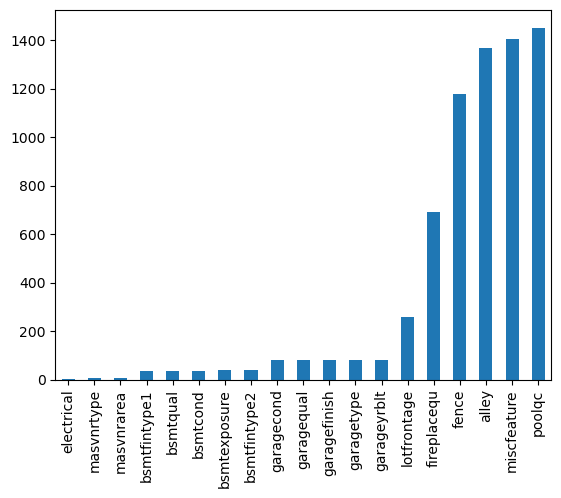

In [15]:
missingval = train.isnull().sum()
missingval = missingval[missingval > 0]
missingval.sort_values(inplace=True)
missingval.plot.bar()

<Axes: >

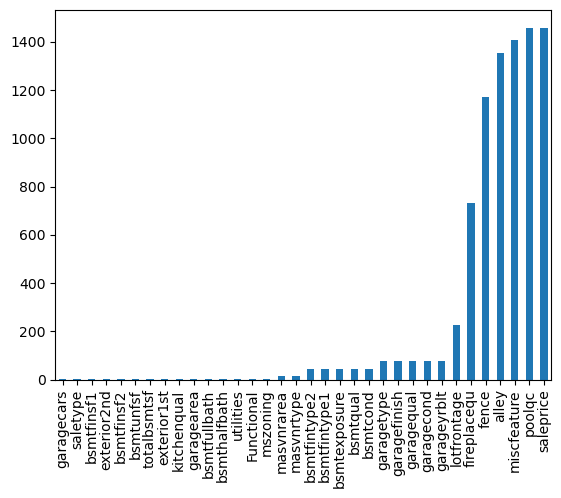

In [16]:
missingval2 = test.isnull().sum()
missingval2 = missingval2[missingval2 > 0]
missingval2.sort_values(inplace=True)
missingval2.plot.bar()

Some missing values ​​are actually due to their non-existence. For example, NA is written there to show that there is no garden in a house.

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

NA means not missing value for the mentioned columns ın traın and test datasetç
So, we will fill them.

In [17]:
totalt=test.isnull().sum().sort_values(ascending=False)
percentt=((test.isnull().sum()/test.isnull().count())*100).sort_values(ascending=False)
missingt=pd.concat([totalt, percentt],axis=1, keys=['Total','Percent'])
missingt.head(60)

Total     Percent
saleprice       1459  100.000000
poolqc          1456   99.794380
miscfeature     1408   96.504455
alley           1352   92.666210
fence           1169   80.123372
fireplacequ      730   50.034270
lotfrontage      227   15.558602
garagefinish      78    5.346127
garageyrblt       78    5.346127
garagequal        78    5.346127
garagecond        78    5.346127
garagetype        76    5.209047
bsmtcond          45    3.084304
bsmtexposure      44    3.015764
bsmtqual          44    3.015764
bsmtfintype1      42    2.878684
bsmtfintype2      42    2.878684
masvnrtype        16    1.096642
masvnrarea        15    1.028101
mszoning           4    0.274160
bsmthalfbath       2    0.137080
utilities          2    0.137080
Functional         2    0.137080
bsmtfullbath       2    0.137080
exterior1st        1    0.068540
bsmtfinsf2         1    0.068540
bsmtunfsf          1    0.068540
bsmtfinsf1         1    0.068540
kitchenqual        1    0.068540
exterior2nd        1    0.068540
garagecars         1    0.068540
garagearea         1    0.068540
saletype           1    0.068540
totalbsmtsf        1    0.068540
mssubclass         0    0.000000
roofstyle          0    0.000000
street             0    0.000000
yearremodadd       0    0.000000
roofmatl           0    0.000000
lotarea            0    0.000000
lotshape           0    0.000000
yearbuilt          0    0.000000
screenporch        0    0.000000
landcontour        0    0.000000
lotconfig          0    0.000000
landslope          0    0.000000
neighborhood       0    0.000000
condition1         0    0.000000
condition2         0    0.000000
housestyle         0    0.000000
miscval            0    0.000000
mosold             0    0.000000
yrsold             0    0.000000
salecondition      0    0.000000
poolarea           0    0.000000
overallqual        0    0.000000
threessnporch      0    0.000000
heating            0    0.000000
firstflrsf         0    0.000000
secondflrsf        0    0.000000

In [18]:
totalt.sum()

8459

In [19]:
garagemissings=['garagequal','garagecond','garagefinish','garagetype']
for col in garagemissings:
    train[col].fillna('NoGarage', inplace=True)
    test[col].fillna('NoGarage', inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\4104107751.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('NoGarage', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\4104107751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col].fillna('NoGarage', inplace=True)
C:\Users\Asus\AppData\Local\Temp\

In [20]:
bsmtmissings=['bsmtexposure','bsmtcond','bsmtqual','bsmtfintype1','bsmtfintype2']
for col in bsmtmissings:
    train[col].fillna('NoBasement', inplace=True)
    test[col].fillna('NoBasement', inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\2309174289.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('NoBasement', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\2309174289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col].fillna('NoBasement', inplace=True)
C:\Users\Asus\AppData\Local\T

In [21]:
poolmissings=['poolqc']
for col in poolmissings:
    train[col].fillna('NoPool', inplace=True)
    test[col].fillna('NoPool', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\1086428036.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('NoPool', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\1086428036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col].fillna('NoPool', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipyk

In [22]:
firemissings=['fireplacequ']
for col in firemissings:
    train[col].fillna('NoFirePlace', inplace=True)
    test[col].fillna('NoFirePlace', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\1274664216.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('NoFirePlace', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\1274664216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col].fillna('NoFirePlace', inplace=True)
C:\Users\Asus\AppData\Local

In [23]:
fencemissings=['fence']
for col in fencemissings:
    train[col].fillna('NoFence', inplace=True)
    test[col].fillna('NoFence', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\3833601053.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('NoFence', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\3833601053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col].fillna('NoFence', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ip

In [24]:
alleymissings=['alley']
for col in alleymissings:
    train[col].fillna('NoAlleyAccess', inplace=True)
    test[col].fillna('NoAlleyAccess', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\69871275.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('NoAlleyAccess', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\69871275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col].fillna('NoAlleyAccess', inplace=True)
C:\Users\Asus\AppData\Local

In [25]:
garagemissings2=['garageyrblt']
for col in garagemissings2:
    train[col].fillna('0', inplace=True)
    test[col].fillna('0', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\1457858087.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('0', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\1457858087.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train[col].fillna('0', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\14578580

In [26]:
masvmissings=['masvnrtype']
for col in masvmissings:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)

masvamissings=['masvnrarea']
for col in masvamissings:
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\3235077964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('None', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\3235077964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col].fillna('None', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykerne

In [27]:

for col in ['electrical']:
    train[col]=train[col].fillna(train[col].mode()[0])
    test[col]=test[col].fillna(train[col].mode()[0])

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\1682948951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col]=train[col].fillna(train[col].mode()[0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\1682948951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]=test[col].fillna(train[col].mode()[0])


In [28]:
for col in ['mszoning',
    'utilities',
    'exterior1st',
    'exterior2nd',
    'kitchenqual',
    'Functional',
    'saletype']:
    train[col]=train[col].fillna(train[col].mode()[0])
    test[col]=test[col].fillna(train[col].mode()[0])

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\745009755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col]=train[col].fillna(train[col].mode()[0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\745009755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]=test[col].fillna(train[col].mode()[0])


In [29]:
gamissings=['garagearea']
for col in gamissings:
    test[col].fillna(0, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\3608433452.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(0, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\3608433452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col].fillna(0, inplace=True)


In [30]:
gacmissings=['garagecars']
for col in gacmissings:
    test[col].fillna(0, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\2002603880.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(0, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\2002603880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col].fillna(0, inplace=True)


In [31]:
bmissings=['totalbsmtsf','bsmtfinsf1','bsmtunfsf','bsmtfinsf2','bsmthalfbath','bsmtfullbath']
for col in bmissings:
    test[col].fillna(0, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\1646328875.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(0, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\1646328875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col].fillna(0, inplace=True)


In [32]:
miscmissings=['miscfeature']
for col in miscmissings:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\3238740957.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('None', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_57332\3238740957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col].fillna('None', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykerne

In [33]:
train.loc[train['lotfrontage'].isna()==False,'lotfrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: lotfrontage, Length: 1201, dtype: float64

In [34]:
    e = train.loc[train['lotfrontage'].isna() == False, 'lotfrontage']
e

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: lotfrontage, Length: 1201, dtype: float64

In [35]:
n = train.loc[: ,train.isna().sum() == 0].columns
e = train.loc[train['lotfrontage'].isna() == False, n]
e


id bldgtype housestyle  yearbuilt  yearremodadd roofstyle roofmatl  \
0        1     1Fam     2Story       2003          2003     Gable  CompShg   
1        2     1Fam     1Story       1976          1976     Gable  CompShg   
2        3     1Fam     2Story       2001          2002     Gable  CompShg   
3        4     1Fam     2Story       1915          1970     Gable  CompShg   
4        5     1Fam     2Story       2000          2000     Gable  CompShg   
...    ...      ...        ...        ...           ...       ...      ...   
1455  1456     1Fam     2Story       1999          2000     Gable  CompShg   
1456  1457     1Fam     1Story       1978          1988     Gable  CompShg   
1457  1458     1Fam     2Story       1941          2006     Gable  CompShg   
1458  1459     1Fam     1Story       1950          1996       Hip  CompShg   
1459  1460     1Fam     1Story       1965          1965     Gable  CompShg   

     foundation  overallqual  overallcond  ... neighborhood condition1  \
0         PConc            7            5  ...      CollgCr       Norm   
1        CBlock            6            8  ...      Veenker      Feedr   
2         PConc            7            5  ...      CollgCr       Norm   
3        BrkTil            7            5  ...      Crawfor       Norm   
4         PConc            8            5  ...      NoRidge       Norm   
...         ...          ...          ...  ...          ...        ...   
1455      PConc            6            5  ...      Gilbert       Norm   
1456     CBlock            6            6  ...       NWAmes       Norm   
1457      Stone            7            9  ...      Crawfor       Norm   
1458     CBlock            5            6  ...        NAmes       Norm   
1459     CBlock            5            6  ...      Edwards       Norm   

      condition2 miscfeature  miscval  mosold  yrsold  saletype  \
0           Norm        None        0       2    2008        WD   
1           Norm        None        0       5    2007        WD   
2           Norm        None        0       9    2008        WD   
3           Norm        None        0       2    2006        WD   
4           Norm        None        0      12    2008        WD   
...          ...         ...      ...     ...     ...       ...   
1455        Norm        None        0       8    2007        WD   
1456        Norm        None        0       2    2010        WD   
1457        Norm        Shed     2500       5    2010        WD   
1458        Norm        None        0       4    2010        WD   
1459        Norm        None        0       6    2008        WD   

      salecondition saleprice  
0            Normal  208500.0  
1            Normal  181500.0  
2            Normal  223500.0  
3           Abnorml  140000.0  
4            Normal  250000.0  
...             ...       ...  
1455         Normal  175000.0  
1456         Normal  210000.0  
1457         Normal  266500.0  
1458         Normal  142125.0  
1459         Normal  147500.0  

[1201 rows x 80 columns]

In [36]:
    t = train.loc[train['lotfrontage'].isna() == True, n]
t

id bldgtype housestyle  yearbuilt  yearremodadd roofstyle roofmatl  \
7        8     1Fam     2Story       1973          1973     Gable  CompShg   
12      13     1Fam     1Story       1962          1962       Hip  CompShg   
14      15     1Fam     1Story       1960          1960       Hip  CompShg   
16      17     1Fam     1Story       1970          1970     Gable  CompShg   
24      25     1Fam     1Story       1968          2001     Gable  CompShg   
...    ...      ...        ...        ...           ...       ...      ...   
1429  1430     1Fam     1Story       1981          1981     Gable  CompShg   
1431  1432   TwnhsE     1Story       1976          1976     Gable  CompShg   
1441  1442   TwnhsE     1Story       2004          2004     Gable  CompShg   
1443  1444     1Fam     1.5Unf       1916          1950     Gable  CompShg   
1446  1447     1Fam     1Story       1962          1962     Gable  CompShg   

     foundation  overallqual  overallcond  ... neighborhood condition1  \
7        CBlock            7            6  ...       NWAmes       PosN   
12       CBlock            5            6  ...       Sawyer       Norm   
14       CBlock            6            5  ...        NAmes       Norm   
16       CBlock            6            7  ...        NAmes       Norm   
24       CBlock            5            8  ...       Sawyer       Norm   
...         ...          ...          ...  ...          ...        ...   
1429     CBlock            6            7  ...       NWAmes       Norm   
1431     CBlock            6            6  ...      NPkVill       Norm   
1441      PConc            6            5  ...      CollgCr       Norm   
1443     BrkTil            6            6  ...      BrkSide       Norm   
1446     CBlock            5            7  ...      Mitchel       Norm   

      condition2 miscfeature  miscval  mosold  yrsold  saletype  \
7           Norm        Shed      350      11    2009        WD   
12          Norm        None        0       9    2008        WD   
14          Norm        None        0       5    2008        WD   
16          Norm        Shed      700       3    2010        WD   
24          Norm        None        0       5    2010        WD   
...          ...         ...      ...     ...     ...       ...   
1429        Norm        None        0       4    2007        WD   
1431        Norm        None        0      10    2009        WD   
1441        Norm        None        0       5    2008        WD   
1443        Norm        None        0       5    2009        WD   
1446        Norm        None        0       4    2010        WD   

      salecondition saleprice  
7            Normal  200000.0  
12           Normal  144000.0  
14           Normal  157000.0  
16           Normal  149000.0  
24           Normal  154000.0  
...             ...       ...  
1429         Normal  182900.0  
1431         Normal  143750.0  
1441         Normal  149300.0  
1443         Normal  121000.0  
1446         Normal  157900.0  

[259 rows x 80 columns]

In [37]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [38]:
for column in ['lotfrontage']:
    train = knn_impute(train, column)
    test=knn_impute(test, column)

In [39]:
totalt=test.isnull().sum().sort_values(ascending=False)
percentt=((test.isnull().sum()/test.isnull().count())*100).sort_values(ascending=False)
missingt=pd.concat([totalt, percentt],axis=1, keys=['Total','Percent'])
missingt.head(20)

Total  Percent
saleprice       1459    100.0
masvnrarea         0      0.0
utilities          0      0.0
poolqc             0      0.0
poolarea           0      0.0
screenporch        0      0.0
threessnporch      0      0.0
enclosedporch      0      0.0
openporchsf        0      0.0
wooddecksf         0      0.0
PavedDrive         0      0.0
garagecond         0      0.0
garagequal         0      0.0
garagearea         0      0.0
garagecars         0      0.0
garagefinish       0      0.0
garageyrblt        0      0.0
garagetype         0      0.0
extercond          0      0.0
fence              0      0.0

In [40]:
total=train.isnull().sum().sort_values(ascending=False)
percent=((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
missing=pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing.head(10)


Total  Percent
id                 0      0.0
masvnrarea         0      0.0
utilities          0      0.0
poolqc             0      0.0
poolarea           0      0.0
screenporch        0      0.0
threessnporch      0      0.0
enclosedporch      0      0.0
openporchsf        0      0.0
wooddecksf         0      0.0

Data Mining


In [41]:
train.describe()

id    yearbuilt  yearremodadd  overallqual  overallcond  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean    730.500000  1971.267808   1984.865753     6.099315     5.575342   
std     421.610009    30.202904     20.645407     1.382997     1.112799   
min       1.000000  1872.000000   1950.000000     1.000000     1.000000   
25%     365.750000  1954.000000   1967.000000     5.000000     5.000000   
50%     730.500000  1973.000000   1994.000000     6.000000     5.000000   
75%    1095.250000  2000.000000   2004.000000     7.000000     6.000000   
max    1460.000000  2010.000000   2010.000000    10.000000     9.000000   

        bsmtfinsf1   bsmtfinsf2    bsmtunfsf  totalbsmtsf  bsmtfullbath  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  ...   
mean    443.639726    46.549315   567.240411  1057.429452      0.425342  ...   
std     456.098091   161.319273   441.866955   438.705324      0.518911  ...   
min       0.000000     0.000000     0.000000     0.000000      0.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000      0.000000  ...   
50%     383.500000     0.000000   477.500000   991.500000      0.000000  ...   
75%     712.250000     0.000000   808.000000  1298.250000      1.000000  ...   
max    5644.000000  1474.000000  2336.000000  6110.000000      3.000000  ...   

       threessnporch  screenporch     poolarea   mssubclass        lotarea  \
count    1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean        3.409589    15.060959     2.758904    56.897260   10516.828082   
std        29.317331    55.757415    40.177307    42.300571    9981.264932   
min         0.000000     0.000000     0.000000    20.000000    1300.000000   
25%         0.000000     0.000000     0.000000    20.000000    7553.500000   
50%         0.000000     0.000000     0.000000    50.000000    9478.500000   
75%         0.000000     0.000000     0.000000    70.000000   11601.500000   
max       508.000000   480.000000   738.000000   190.000000  215245.000000   

       lotfrontage       miscval       mosold       yrsold      saleprice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean     70.735479     43.489041     6.321918  2007.815753  180921.195890  
std      23.333062    496.123024     2.703626     1.328095   79442.502883  
min      21.000000      0.000000     1.000000  2006.000000   34900.000000  
25%      60.000000      0.000000     5.000000  2007.000000  129975.000000  
50%      70.000000      0.000000     6.000000  2008.000000  163000.000000  
75%      80.050000      0.000000     8.000000  2009.000000  214000.000000  
max     313.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [42]:
missing_g = test[test['garagearea'].isna()]

missing_g

Empty DataFrame
Columns: [id, bldgtype, housestyle, yearbuilt, yearremodadd, roofstyle, roofmatl, foundation, overallqual, overallcond, bsmtexposure, bsmtfintype1, bsmtfinsf1, bsmtfintype2, bsmtfinsf2, bsmtunfsf, totalbsmtsf, bsmtfullbath, bsmthalfbath, bsmtqual, bsmtcond, firstflrsf, secondflrsf, lowqualfinsf, grlivarea, bedroomabvgr, kitchenabvgr, totrmsabvgrd, fullbath, halfbath, kitchenqual, fireplaces, fireplacequ, Functional, heating, heatingqc, centralair, electrical, exterior1st, exterior2nd, masvnrtype, masvnrarea, exterqual, extercond, garagetype, garageyrblt, garagefinish, garagecars, garagearea, garagequal, garagecond, PavedDrive, wooddecksf, openporchsf, enclosedporch, threessnporch, screenporch, poolarea, poolqc, utilities, fence, mssubclass, lotarea, street, alley, mszoning, lotfrontage, lotshape, landcontour, lotconfig, landslope, neighborhood, condition1, condition2, miscfeature, miscval, mosold, yrsold, saletype, salecondition, saleprice]
Index: []

[0 rows x 81 columns]

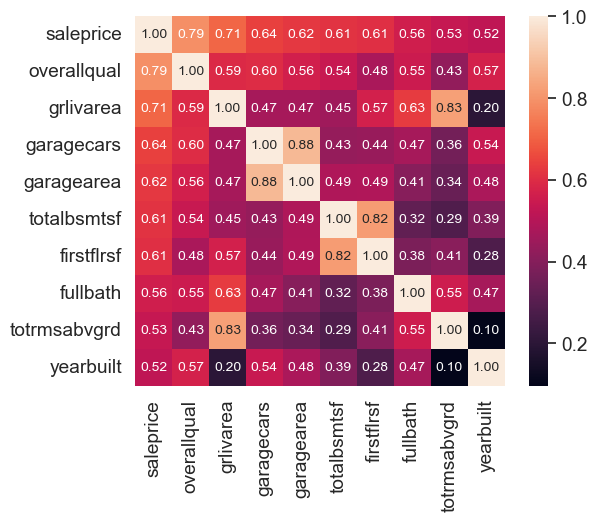

In [43]:
corr = train.select_dtypes(exclude=['object']).corr()
k  = 10 
cols = corr.nlargest(k, 'saleprice')['saleprice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

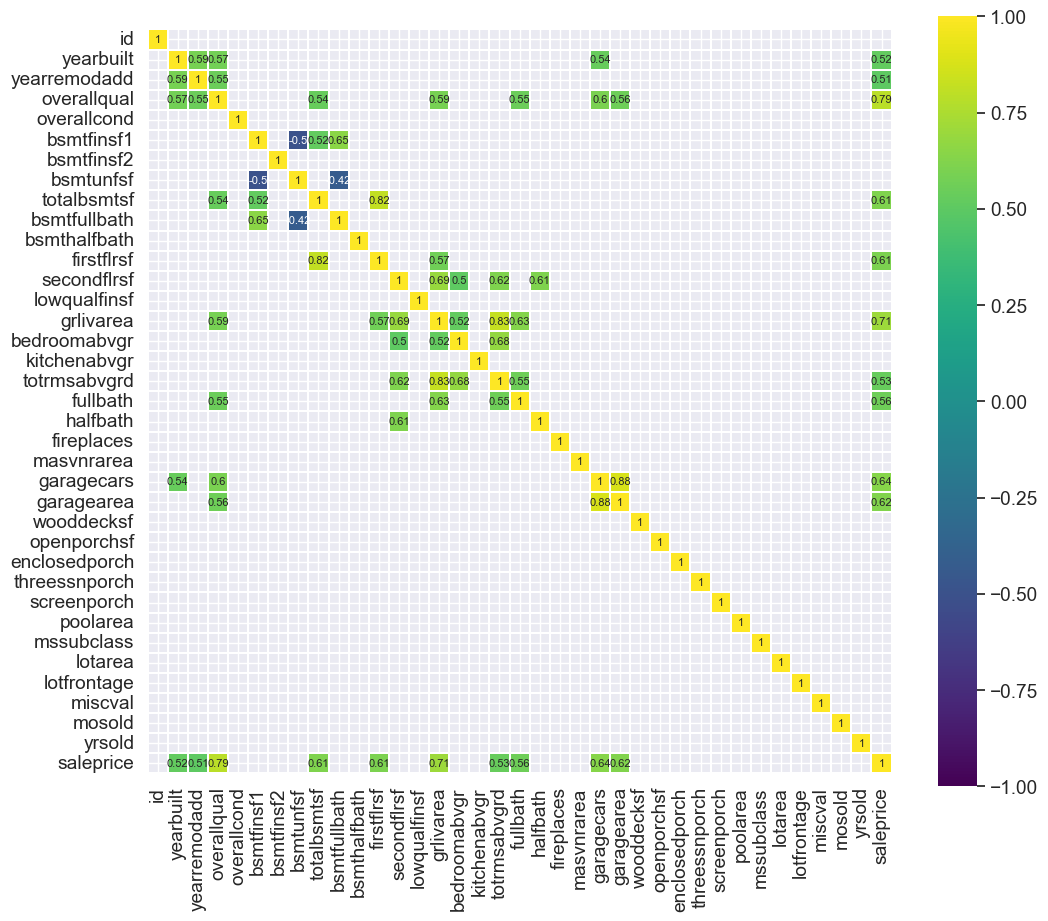

In [44]:
corr2 = corr.drop('saleprice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [45]:
# Use a smaller subset of the data to speed up computations
train_df_subset = train.sample(frac=0.5, random_state=42)



# Verify column names
print(train_df_subset.columns)

Index(['id', 'bldgtype', 'housestyle', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'foundation', 'overallqual', 'overallcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'bsmtfullbath',
       'bsmthalfbath', 'bsmtqual', 'bsmtcond', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bedroomabvgr', 'kitchenabvgr',
       'totrmsabvgrd', 'fullbath', 'halfbath', 'kitchenqual', 'fireplaces',
       'fireplacequ', 'Functional', 'heating', 'heatingqc', 'centralair',
       'electrical', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'PavedDrive',
       'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch',
       'screenporch', 'poolarea', 'poolqc', 'utilities', 'fence', 'mssubclass',
       'lotarea', 'street', 'alley', 'mszoni

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [47]:

def plot_data_with_regression(hypothesis_name, X, y):
    scalers = {
        'Original': None,
        'Standardized': StandardScaler(),
        'Normalized': MinMaxScaler()
    }

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, (name, scaler) in enumerate(scalers.items()):
        if scaler:
            X_scaled = scaler.fit_transform(X)
            y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
        else:
            X_scaled = X.values  # Ensure X_scaled is a NumPy array
            y_scaled = y.values

        # Perform linear regression
        model = LinearRegression()
        model.fit(X_scaled, y_scaled)
        y_pred = model.predict(X_scaled)

        # Use seaborn regplot
        sns.regplot(x=X_scaled[:, 0], y=y_scaled, ax=axes[i], scatter_kws={'alpha': 0.3}, line_kws={'color': 'red', 'linestyle': 'dashed', 'linewidth': 2})
        axes[i].set_xlabel('Feature')
        axes[i].set_ylabel('Target')
        axes[i].set_title(f'{hypothesis_name} - {name}')
        axes[i].legend(['Data', 'Regression Line'])
    plt.show()

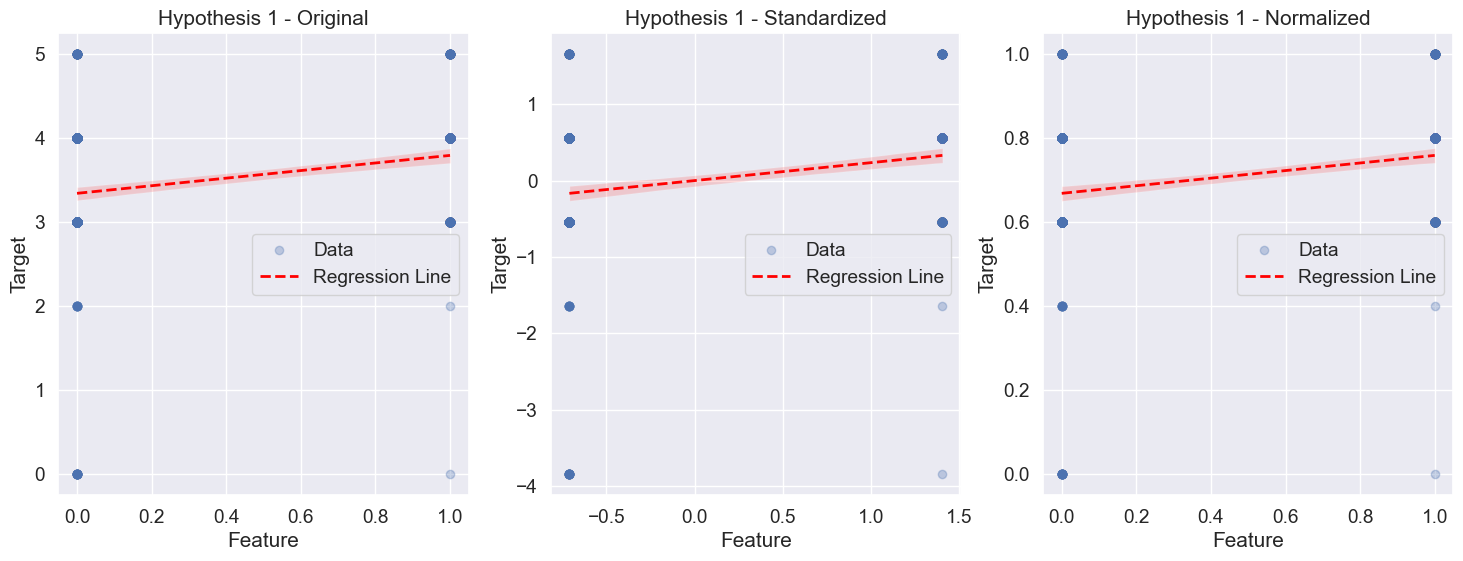

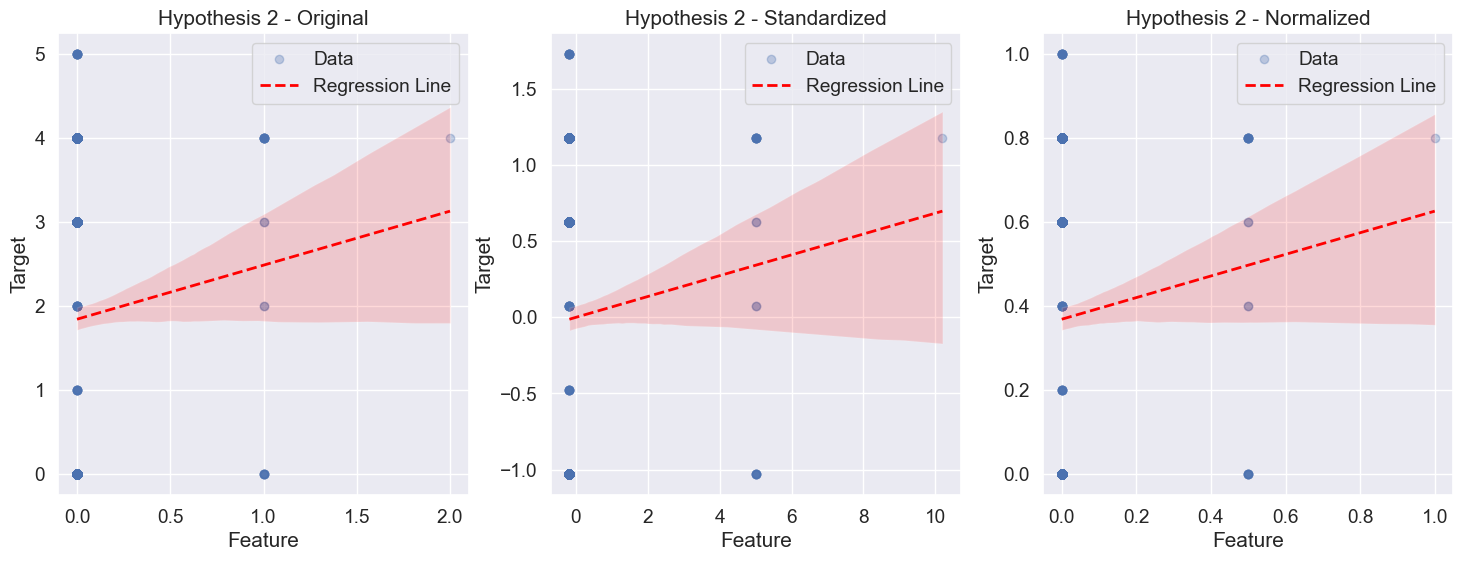

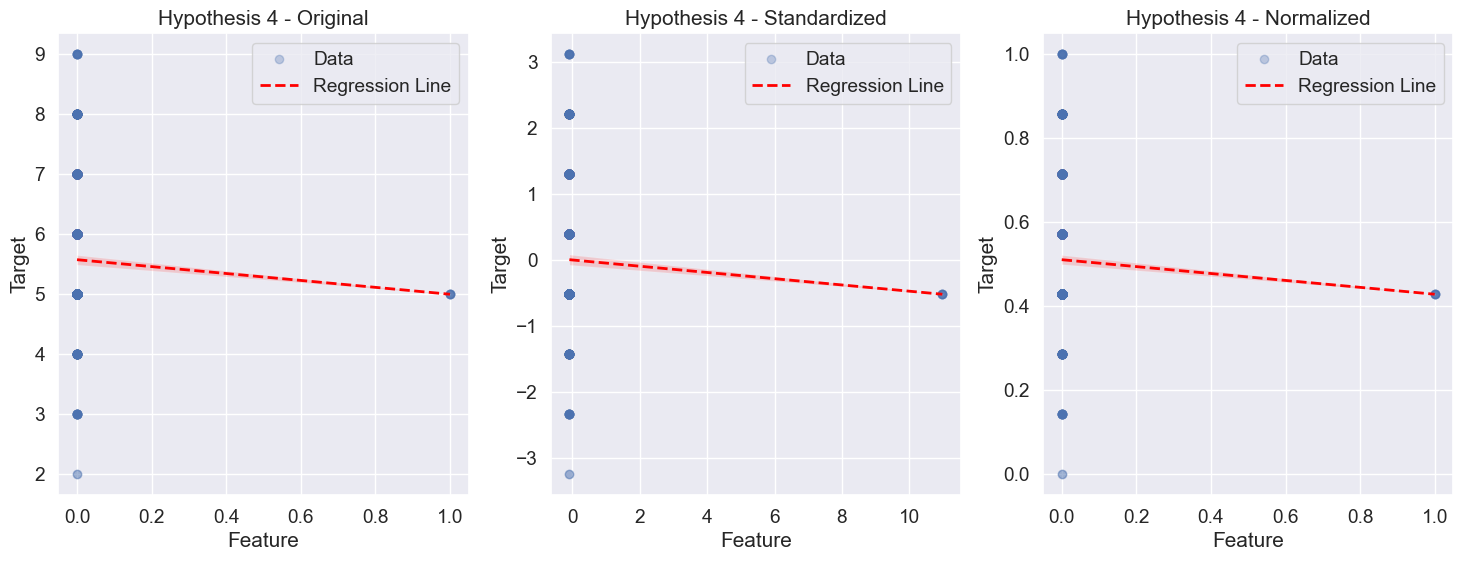

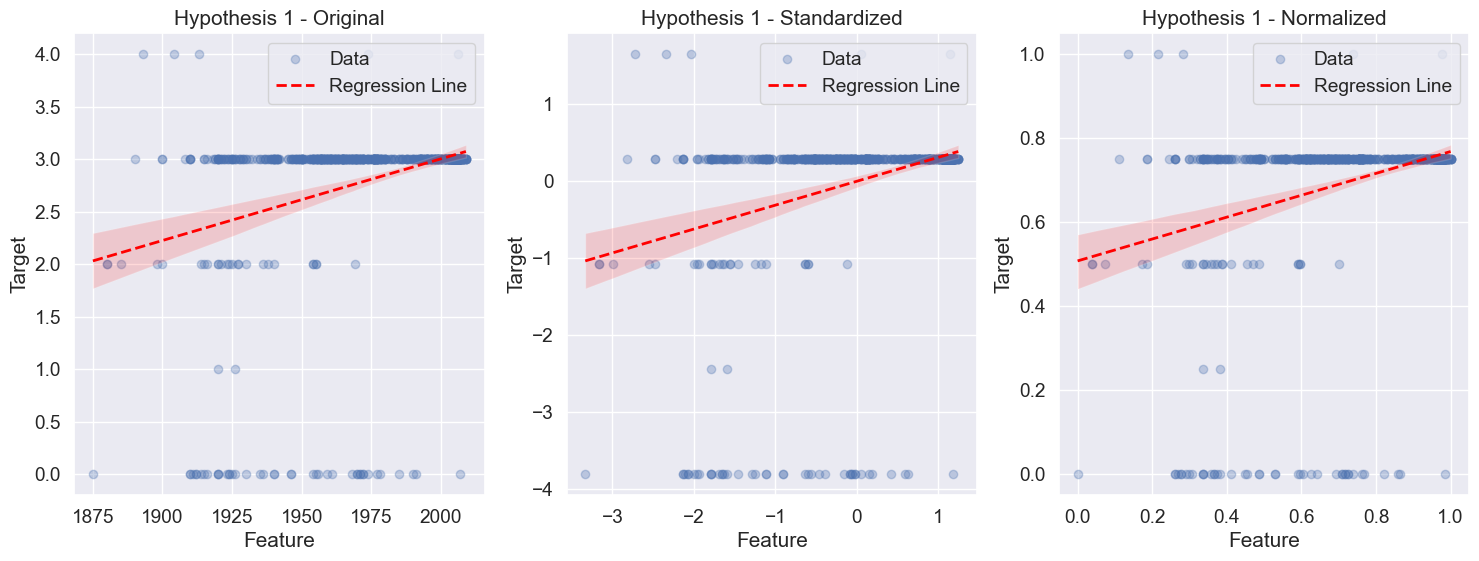

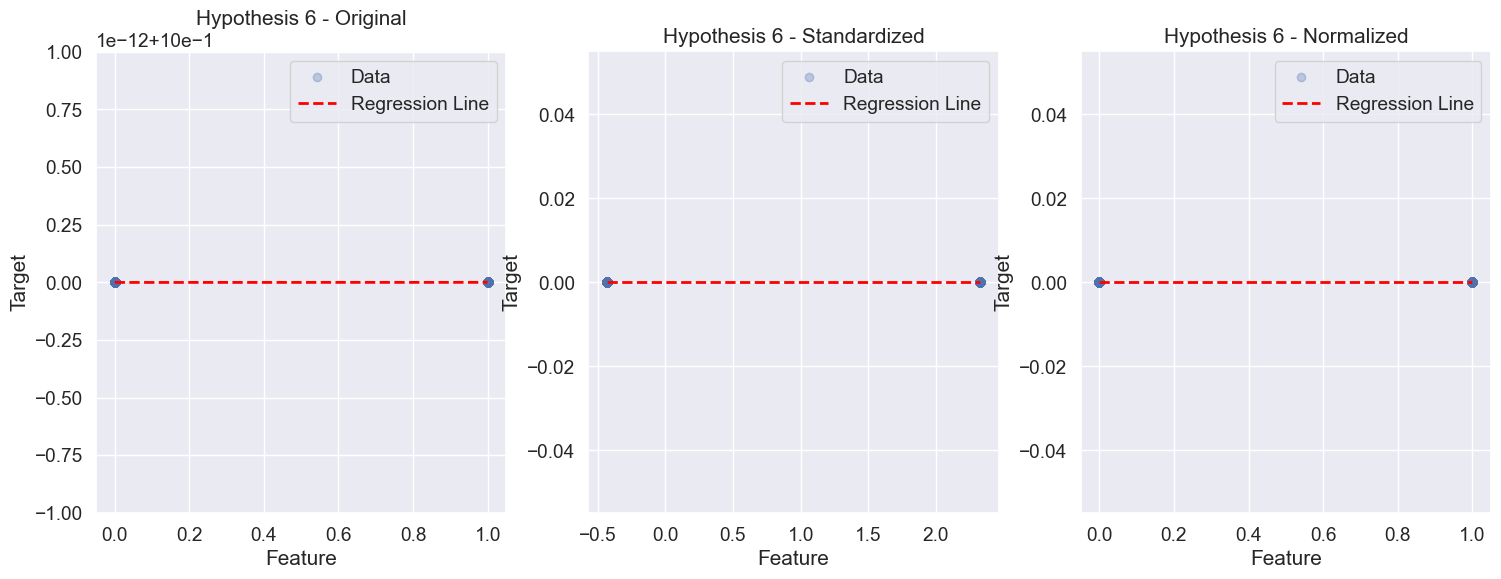

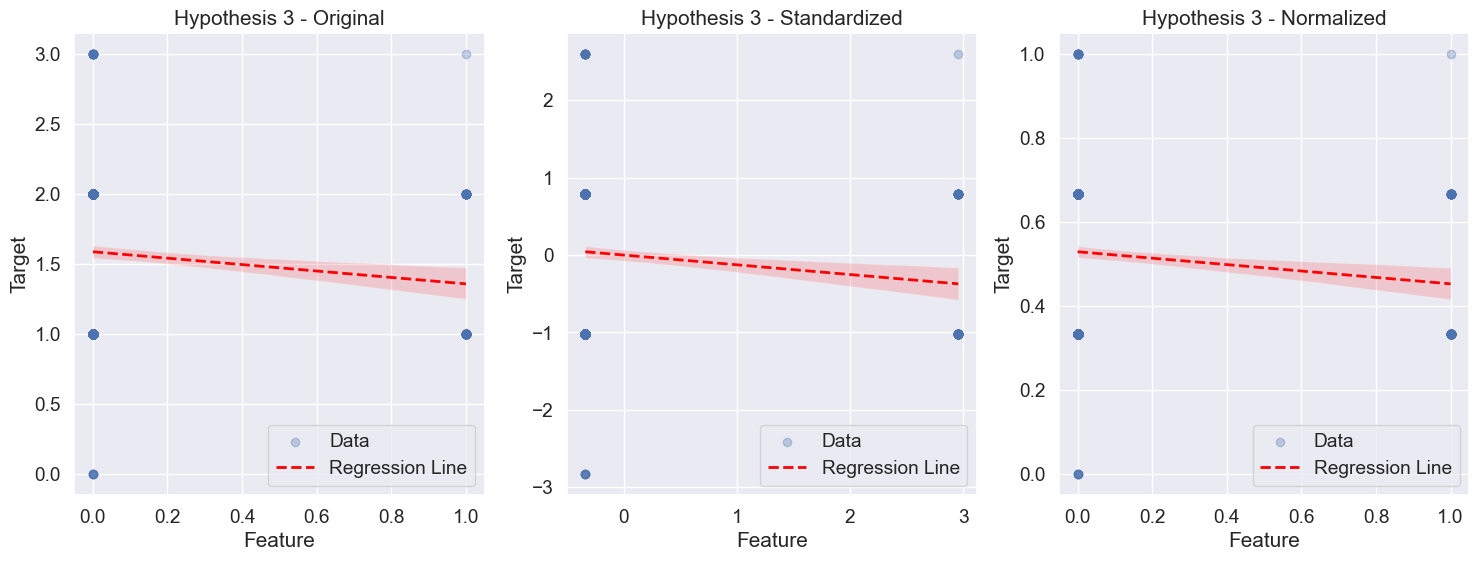

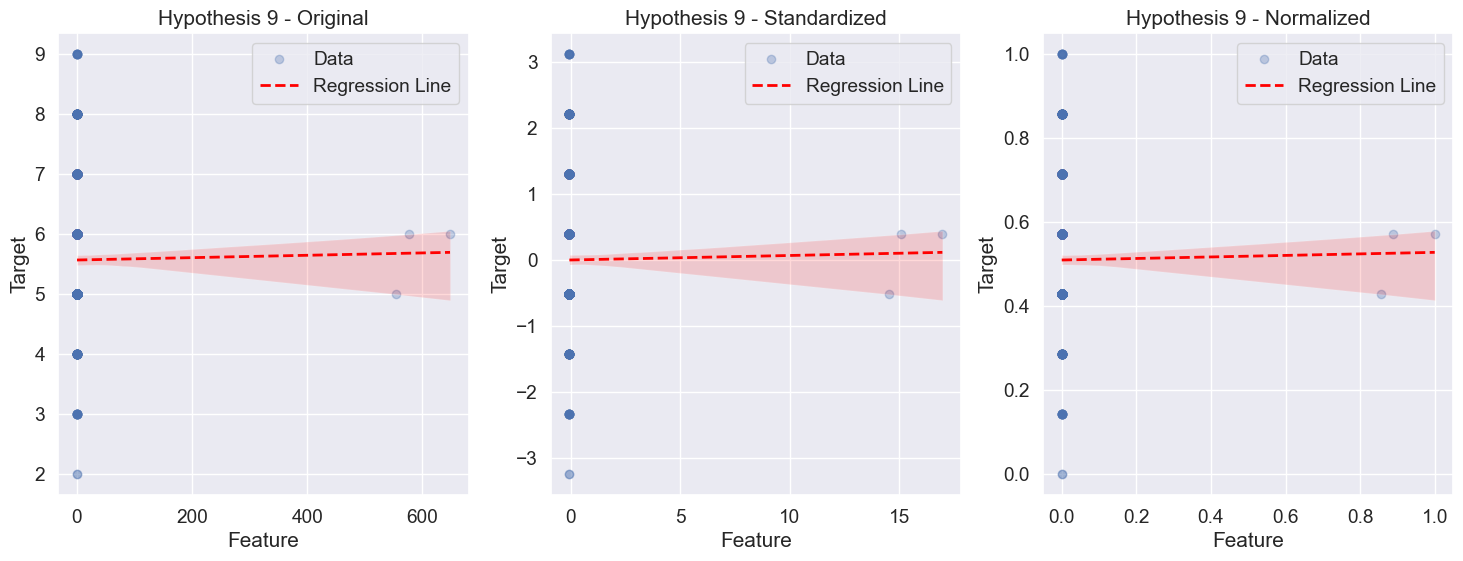

In [48]:
# Prepare and evaluate each hypothesis
bsmt_qual_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    'NoBasement': 0 # No Basement
}
# Hypothesis 1: The Impact of LotShape on Basement Quality (BsmtQual)
X_hypothesis_1g = pd.get_dummies(train_df_subset[['lotshape']])
y_hypothesis_1g = train_df_subset['bsmtqual'].map(bsmt_qual_mapping ).fillna(0)
plot_data_with_regression('Hypothesis 1', X_hypothesis_1g, y_hypothesis_1g)

# Hypothesis 2: Influence of Exterior Material on Fireplaces (FireplaceQu)
exterior_mapping = {'BrkFace': 1, 'Stone': 2}
fp_qual_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    'NoFirePlace': 0 # No Basement
}

X_hypothesis_2g = train_df_subset[['exterior1st']].copy()
X_hypothesis_2g['exterior1st'] = X_hypothesis_2g['exterior1st'].map(exterior_mapping).fillna(0)
y_hypothesis_2g =train_df_subset['fireplacequ'].map(fp_qual_mapping).fillna(0)

plot_data_with_regression('Hypothesis 2', X_hypothesis_2g, y_hypothesis_2g)



# Hypothesis 4: The Effect of Neighborhood on Overall Condition (OverallCond)
X_hypothesis_4g = pd.get_dummies(train_df_subset[['neighborhood']])
y_hypothesis_4g = train_df_subset['overallcond']
plot_data_with_regression('Hypothesis 4', X_hypothesis_4g, y_hypothesis_4g)

# Hypothesis 1: Relationship Between Year Built (YearBuilt) and Garage Quality (GarageQual)
garage_qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGarage': 0}

X_hypothesis_5g = train_df_subset[['yearbuilt']]
y_hypothesis_5g = train_df_subset['garagequal'].map(garage_qual_mapping).fillna(0)
plot_data_with_regression('Hypothesis 1', X_hypothesis_5g, y_hypothesis_5g)


# Hypothesis 6: The Impact of Lot Configuration (LotConfig) on Fence Presence


X_hypothesis_6g = pd.get_dummies(train_df_subset[['lotconfig']])
y_hypothesis_6g = train_df_subset['fence'].notnull().astype(int)
plot_data_with_regression('Hypothesis 6', X_hypothesis_6g, y_hypothesis_6g)


# Hypothesis 7: Influence of House Style on Number of Full Bathrooms (FullBath)
X_hypothesis_7g = pd.get_dummies(train_df_subset[['housestyle']])
y_hypothesis_7g = train_df_subset['fullbath']
plot_data_with_regression('Hypothesis 3', X_hypothesis_7g, y_hypothesis_7g)


# Hypothesis 9: PoolArea and OverallCond
X_hypothesis_9g = train_df_subset[['poolarea']]
y_hypothesis_9g = train_df_subset['overallcond']
plot_data_with_regression('Hypothesis 9', X_hypothesis_9g, y_hypothesis_9g)

In [49]:
# Define a function to evaluate the results of each hypothesis
def evaluate_hypothesis(hypothesis_name, X, y):
    
    results = {}
    scalers = {
        'Original': None,
        'Standardized': StandardScaler(),
        'Normalized': MinMaxScaler()
    }

     

    for name, scaler in scalers.items():
        if scaler:
            X_scaled = scaler.fit_transform(X)
        else:
            X_scaled = X

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        models = {
            'RandomForest': RandomForestRegressor(random_state=42),
            'KNN': KNeighborsRegressor(),
            'XGBoost': XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
        }

        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            results[f'{name}_{model_name}'] = {
                'r2': r2,
                'mae': mae,
                'mse': mse,
                'rmse': rmse
            }

           # Plotting actual vs predicted side by side
            fig, ax = plt.subplots(1, 3, figsize=(18, 6))
            for i, (name, scaler) in enumerate(scalers.items()):
                if scaler:
                    X_scaled = scaler.fit_transform(X)
                else:
                    X_scaled = X

                X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                ax[i].scatter(y_test, y_pred, alpha=0.3)
                ax[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
                ax[i].set_xlabel('Actual')
                ax[i].set_ylabel('Predicted')
                ax[i].set_title(f'{hypothesis_name} - {name} - {model_name}')

            plt.show()

    return results

In [50]:
# Prepare and evaluate each hypothesis
results = {}

In [51]:
train_df_subset['fireplacequ'].value_counts()

fireplacequ
NoFirePlace    337
Gd             195
TA             159
Fa              16
Ex              13
Po              10
Name: count, dtype: int64

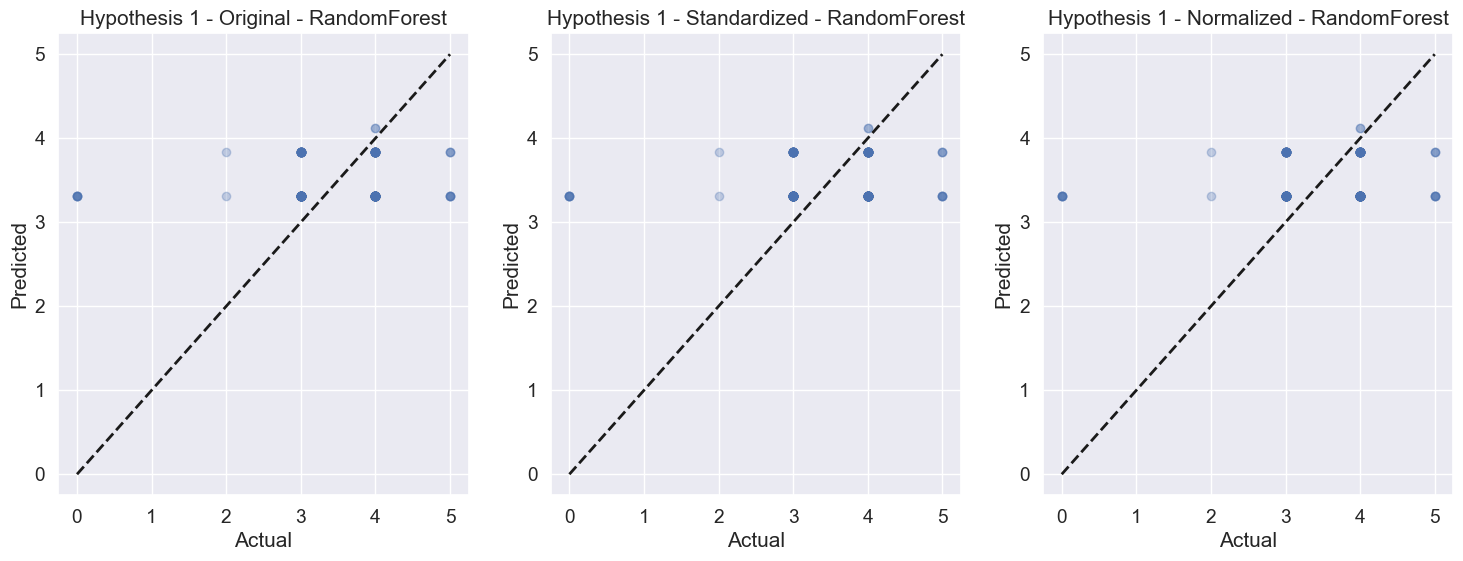

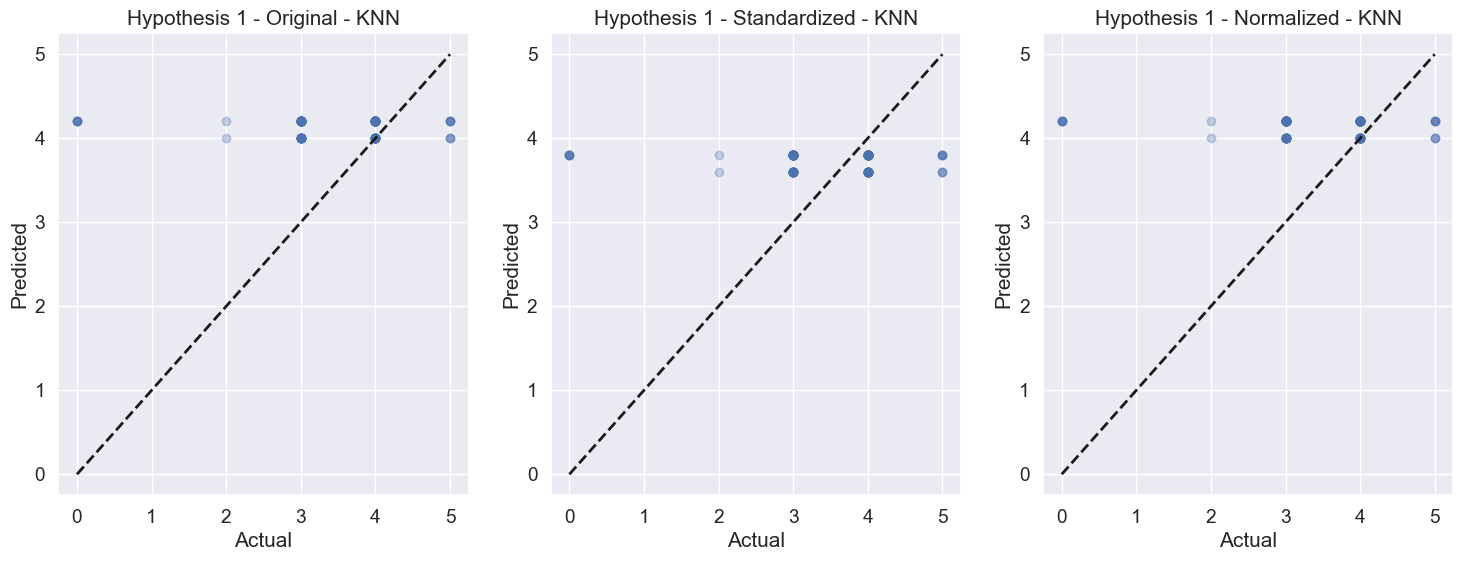

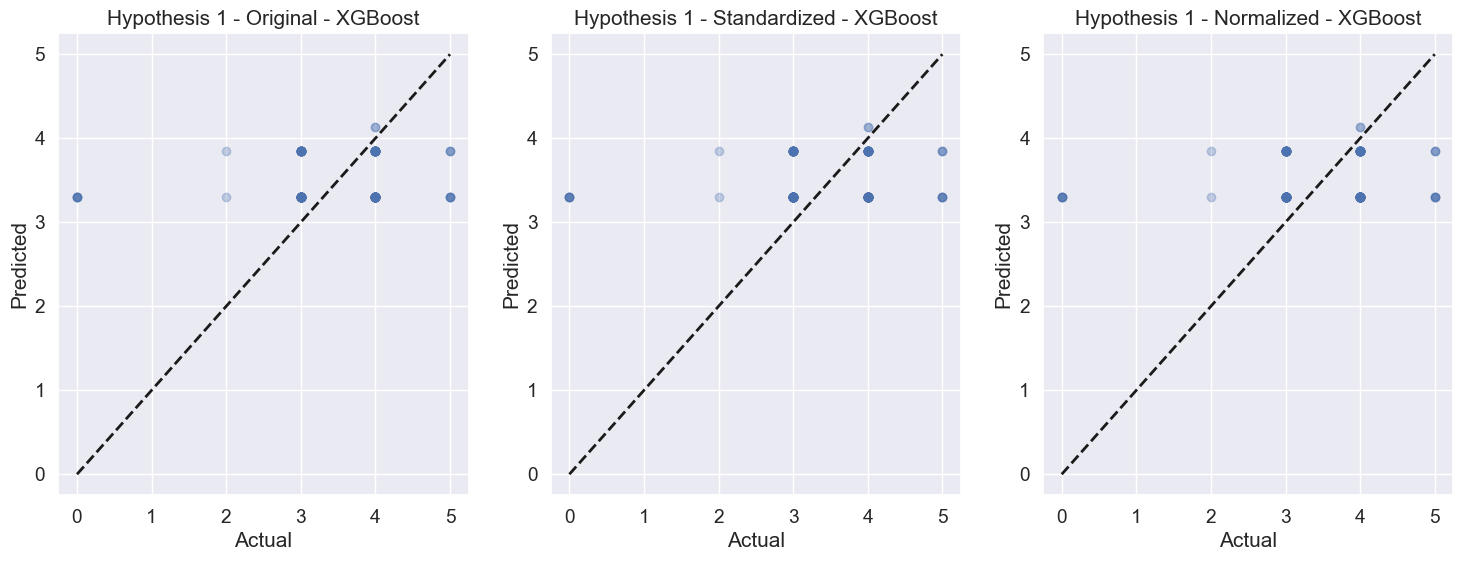

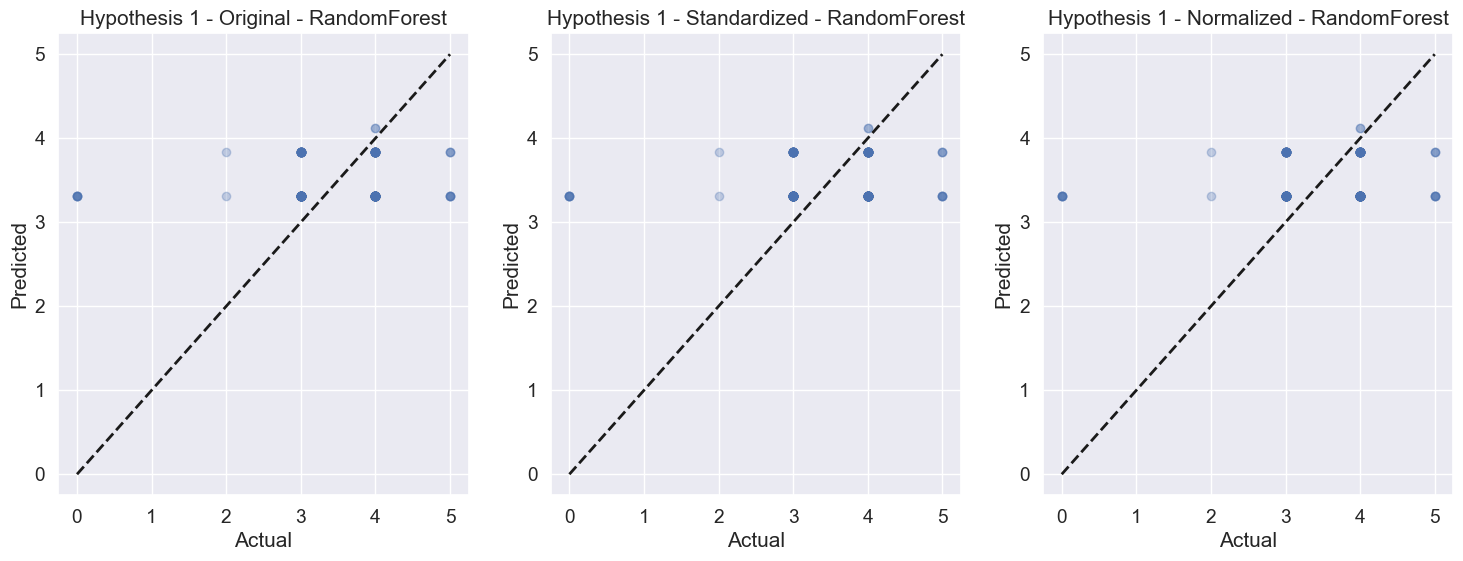

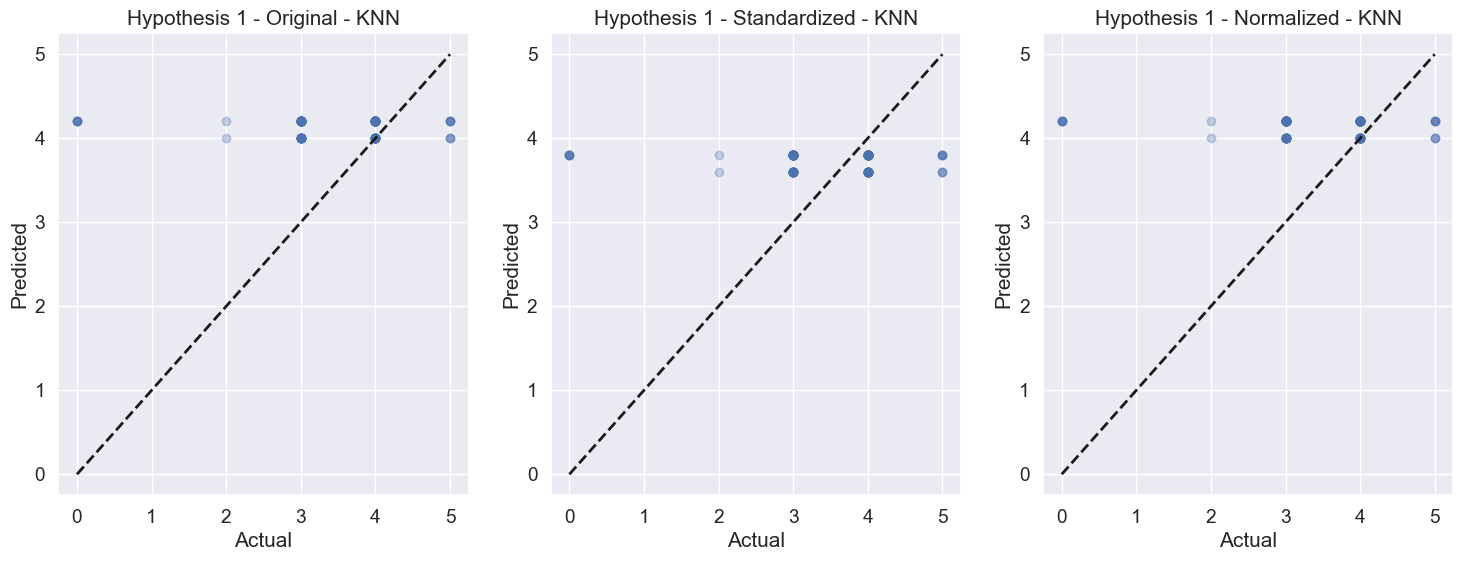

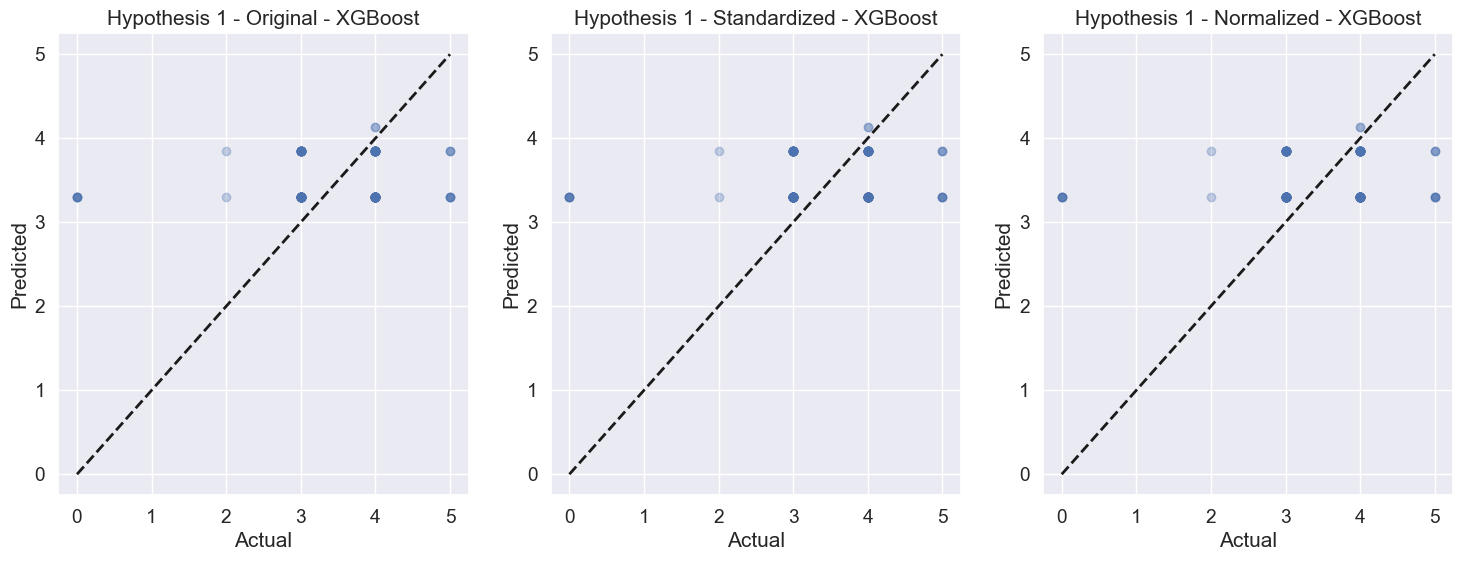

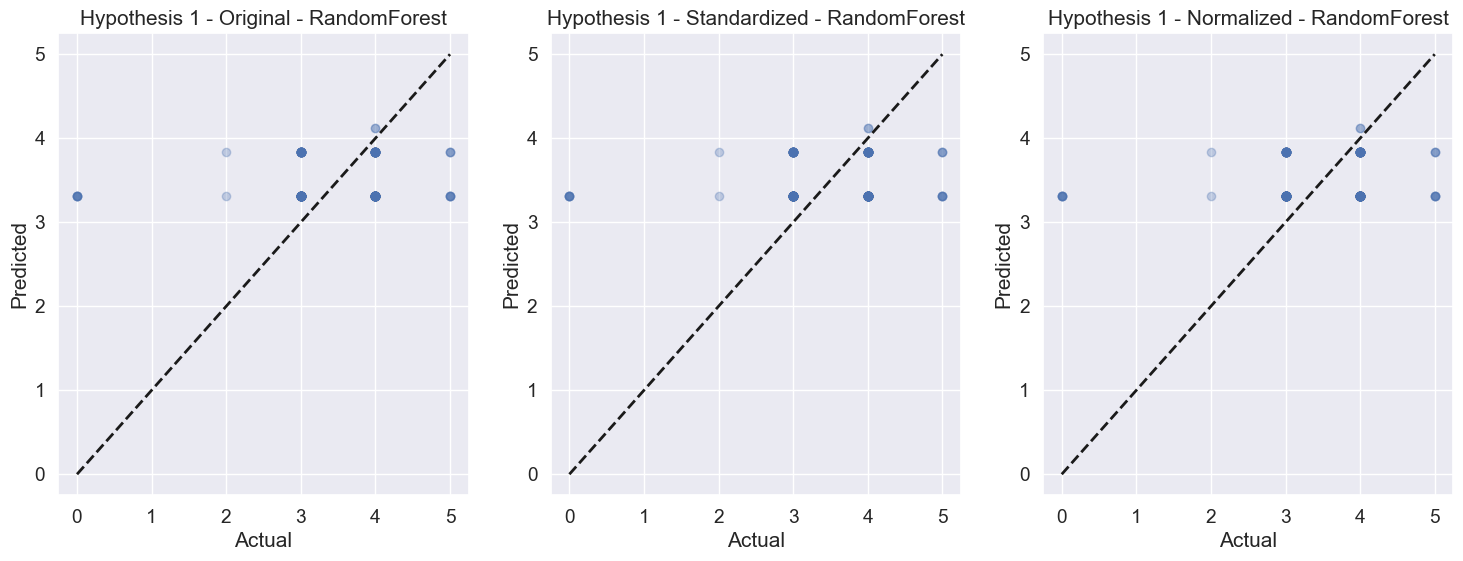

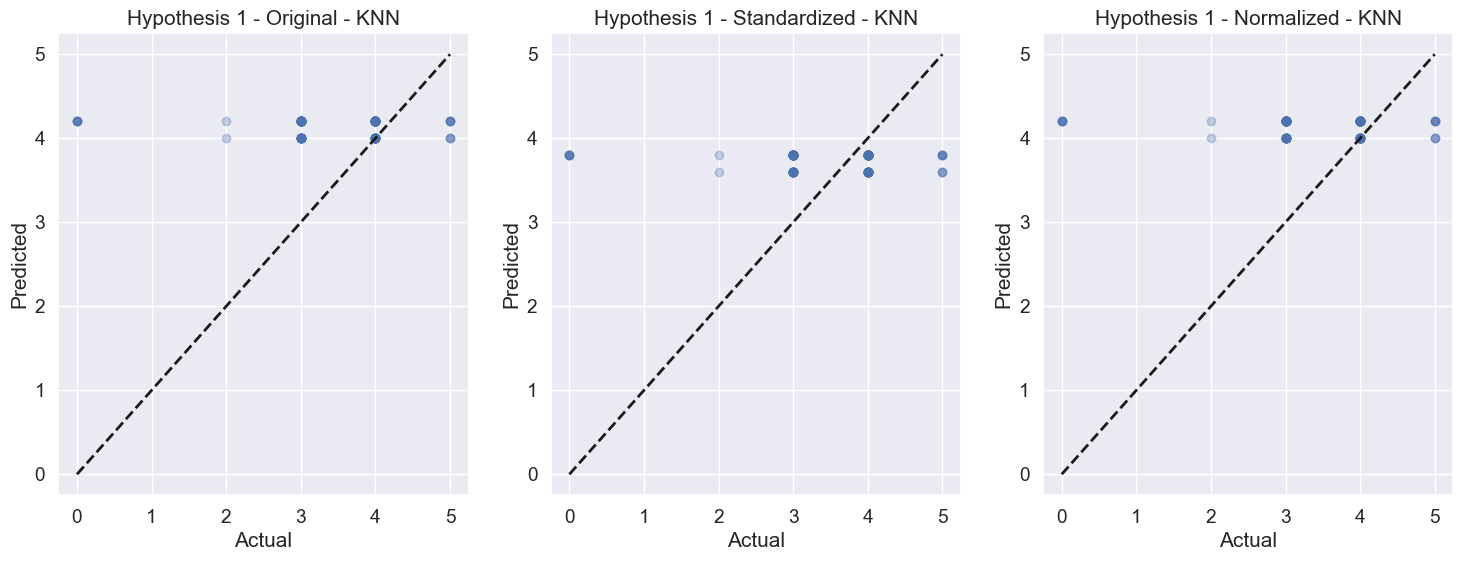

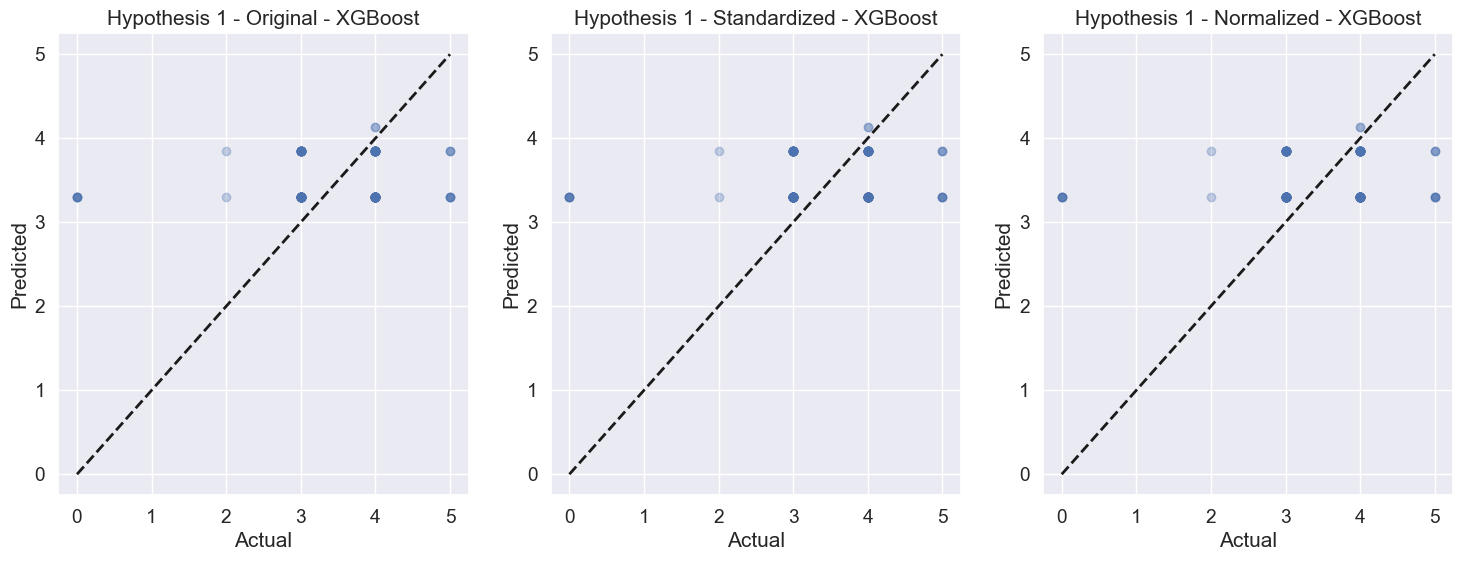

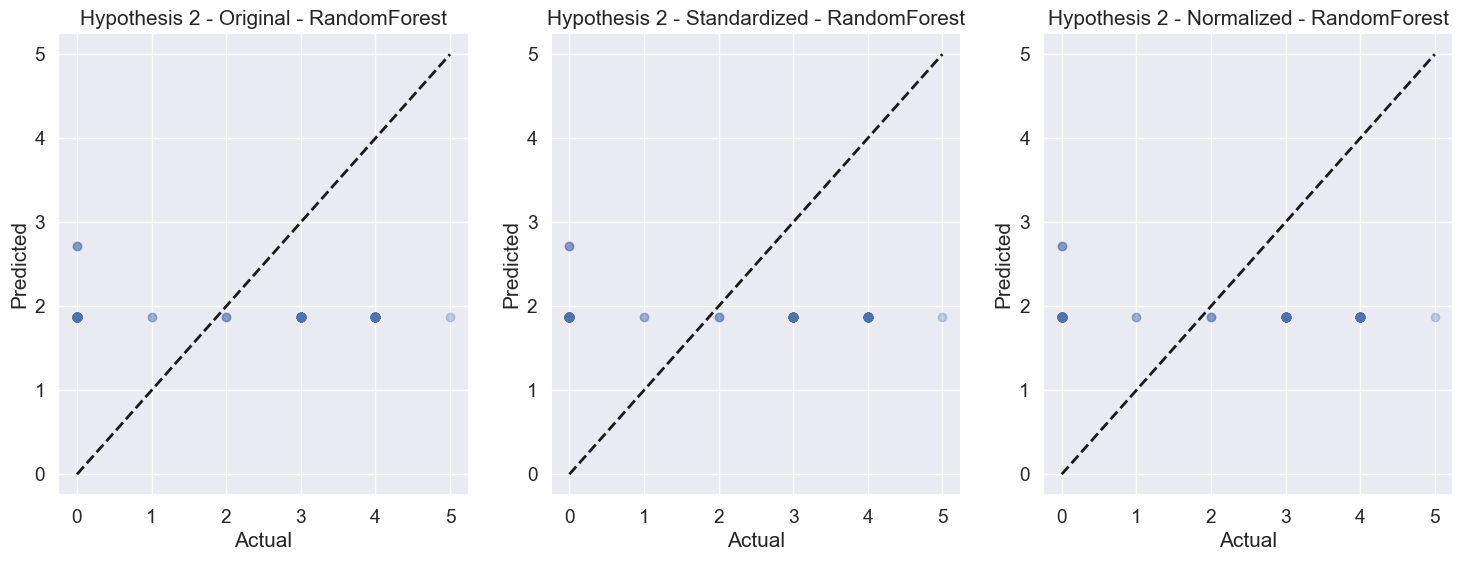

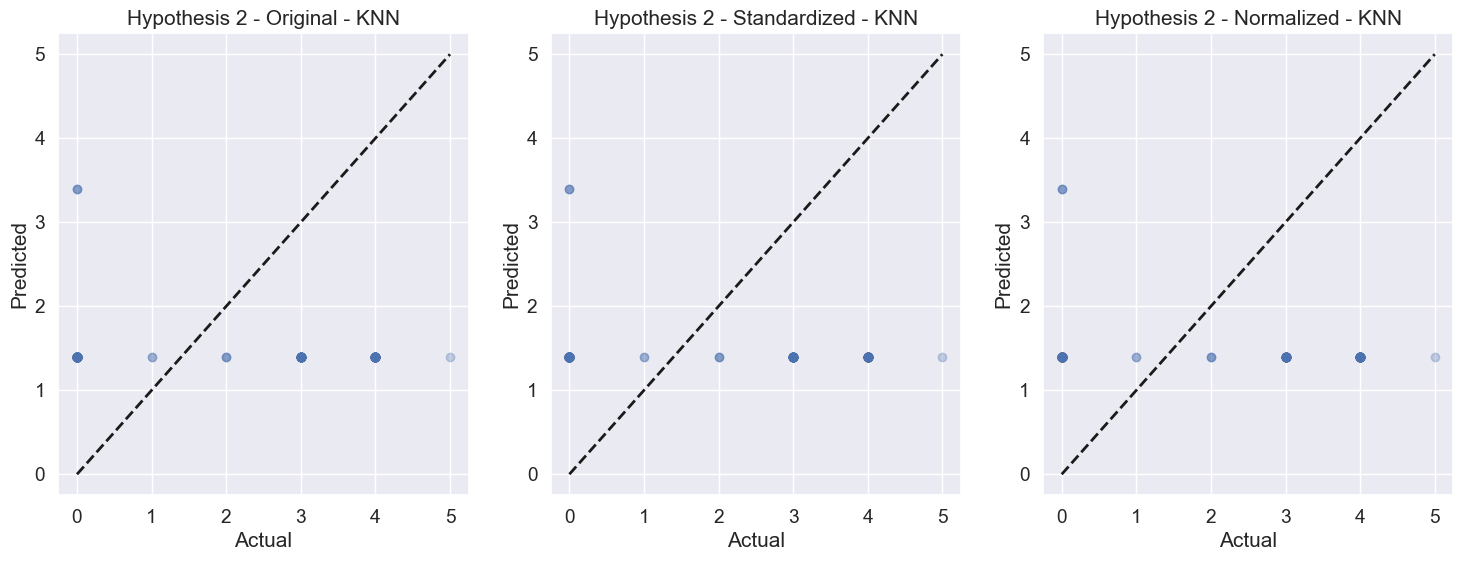

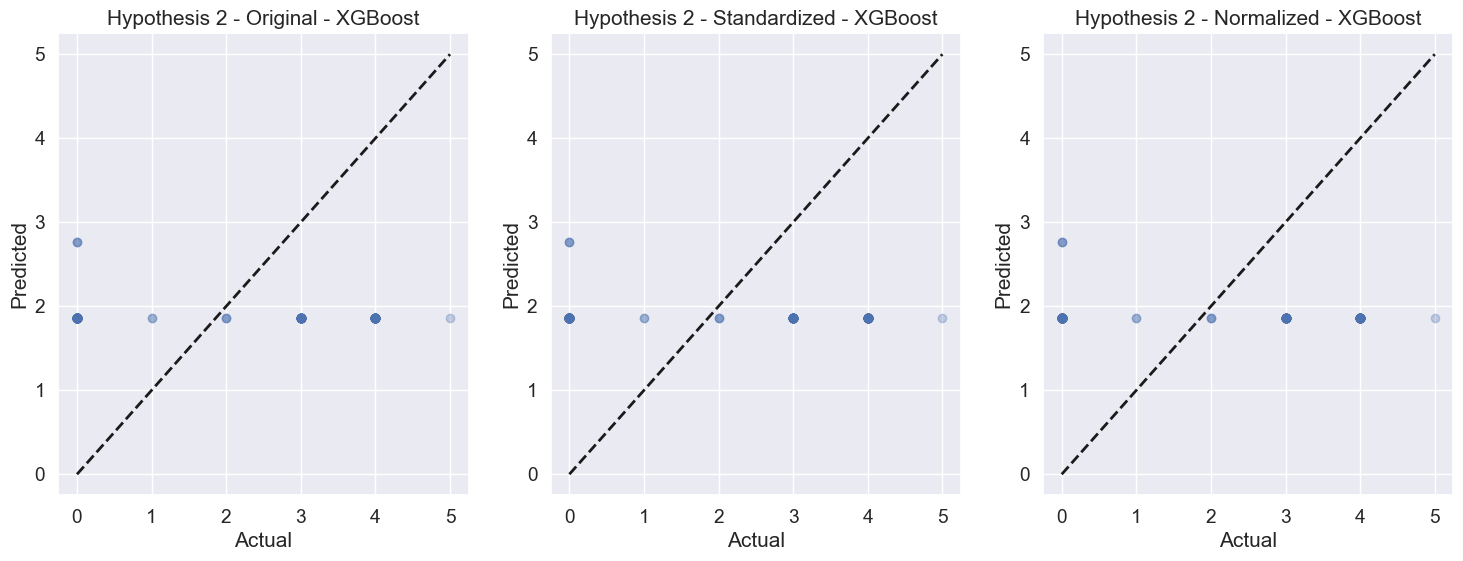

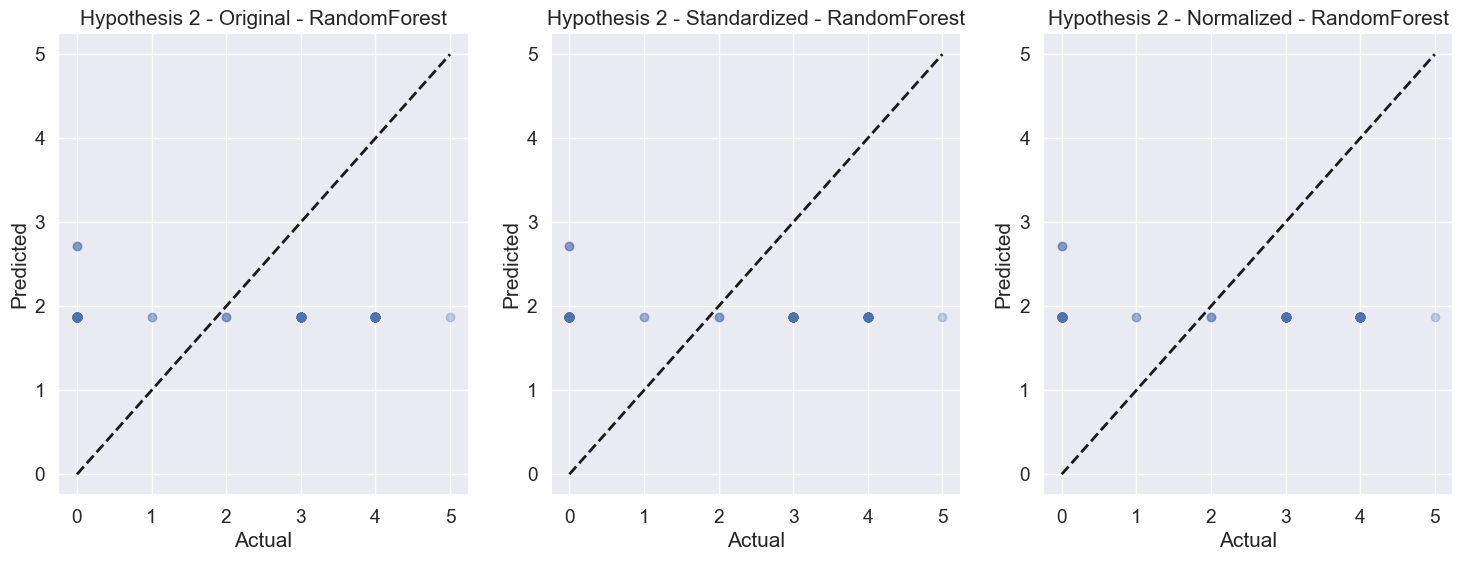

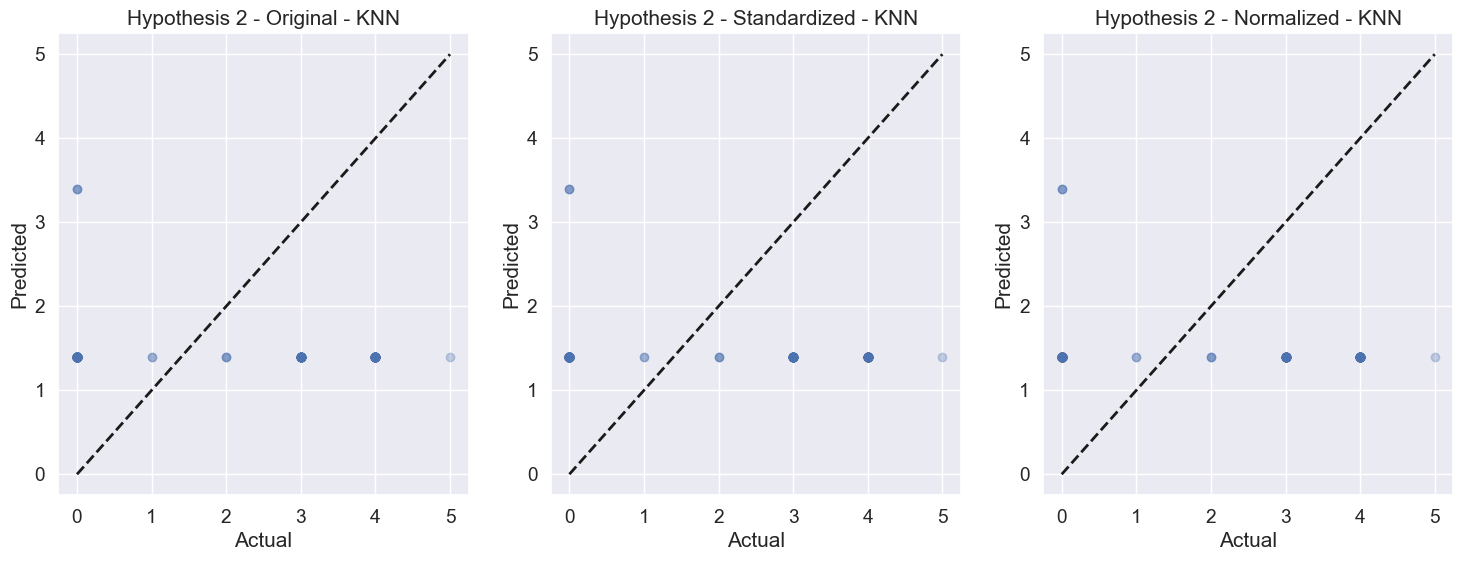

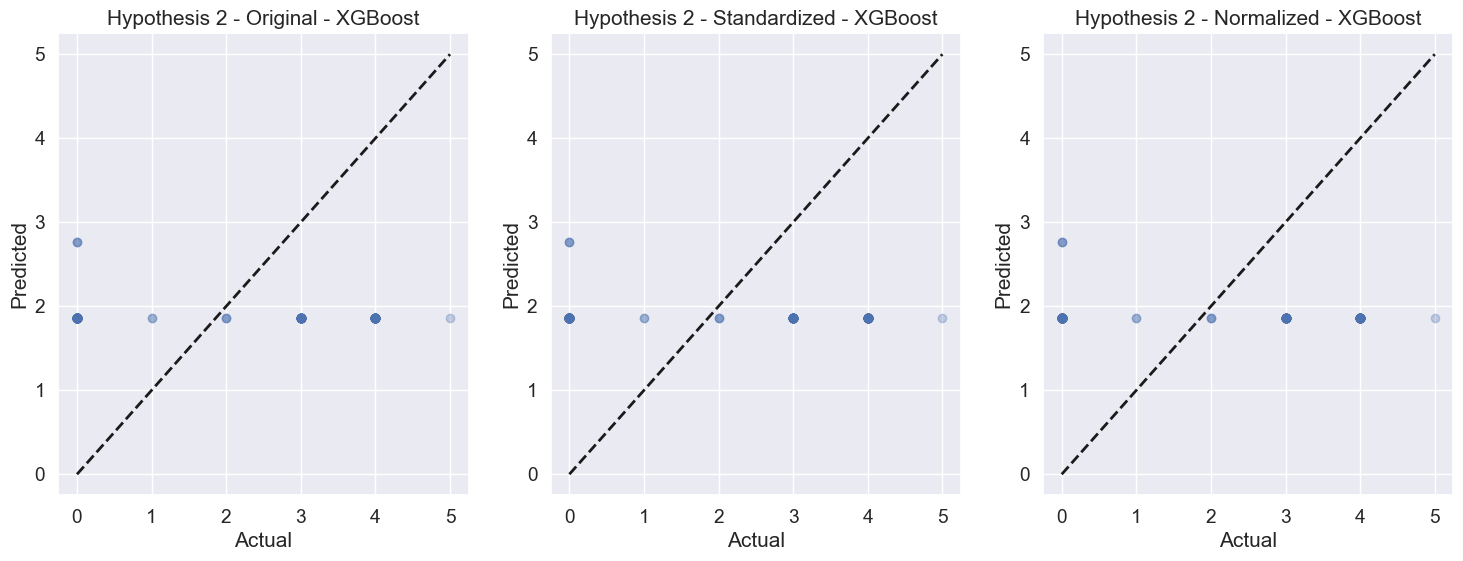

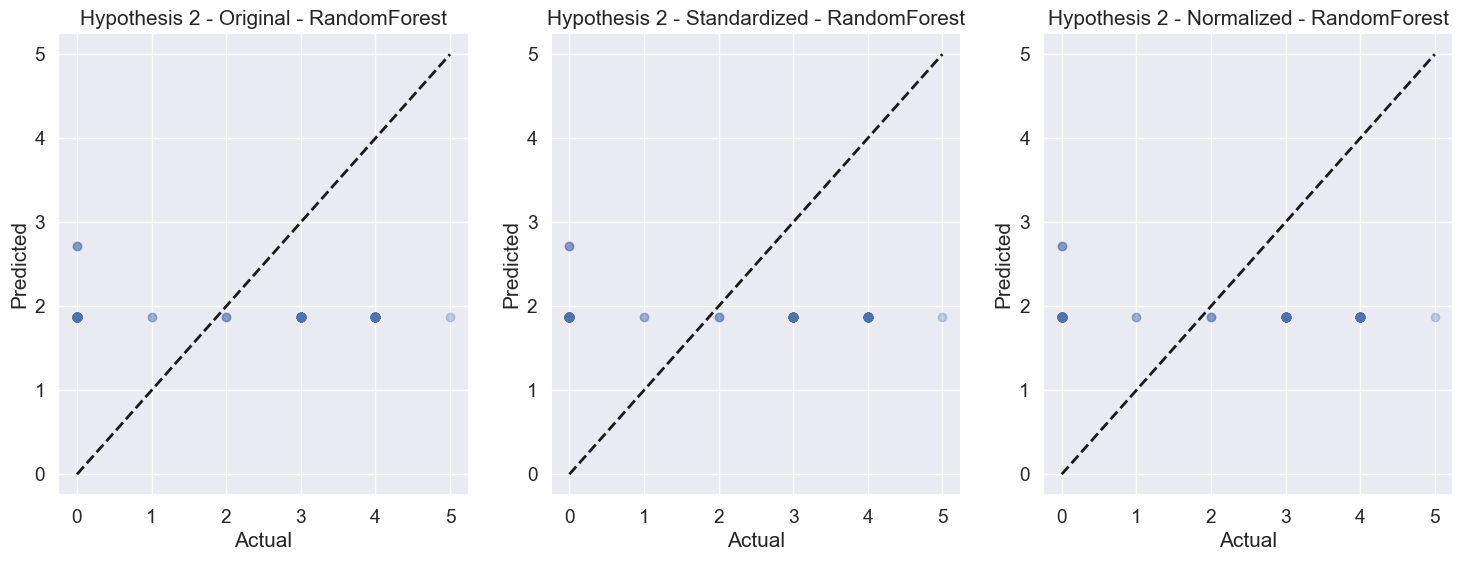

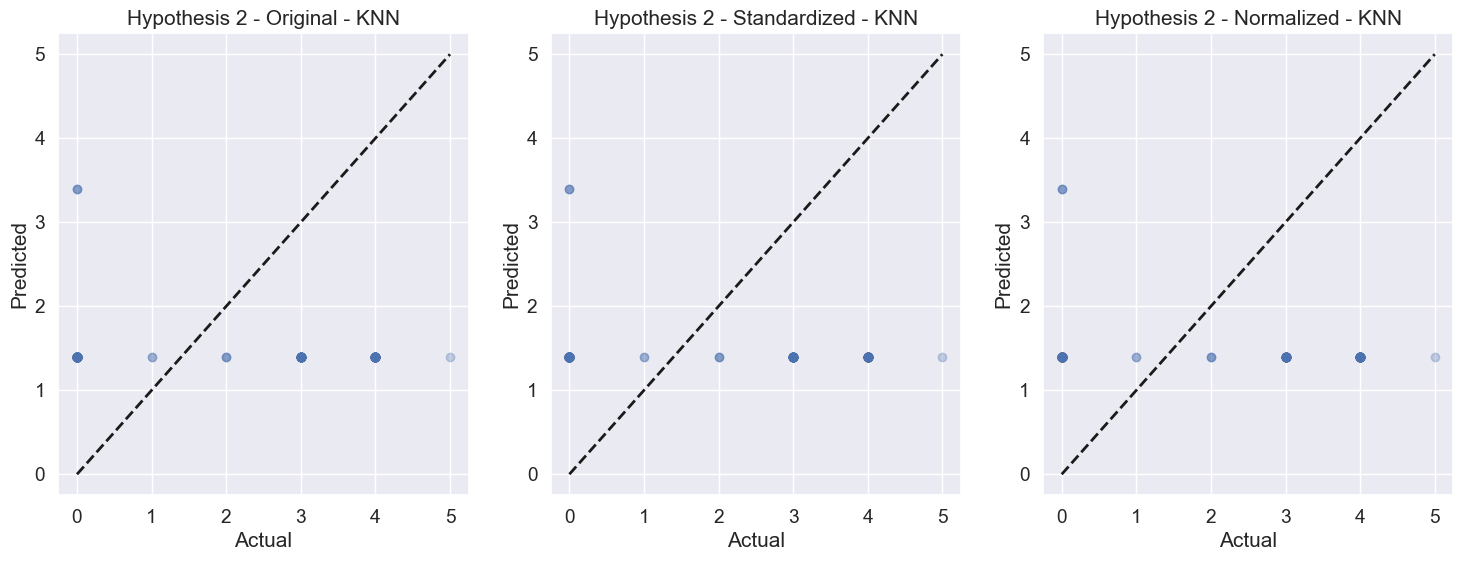

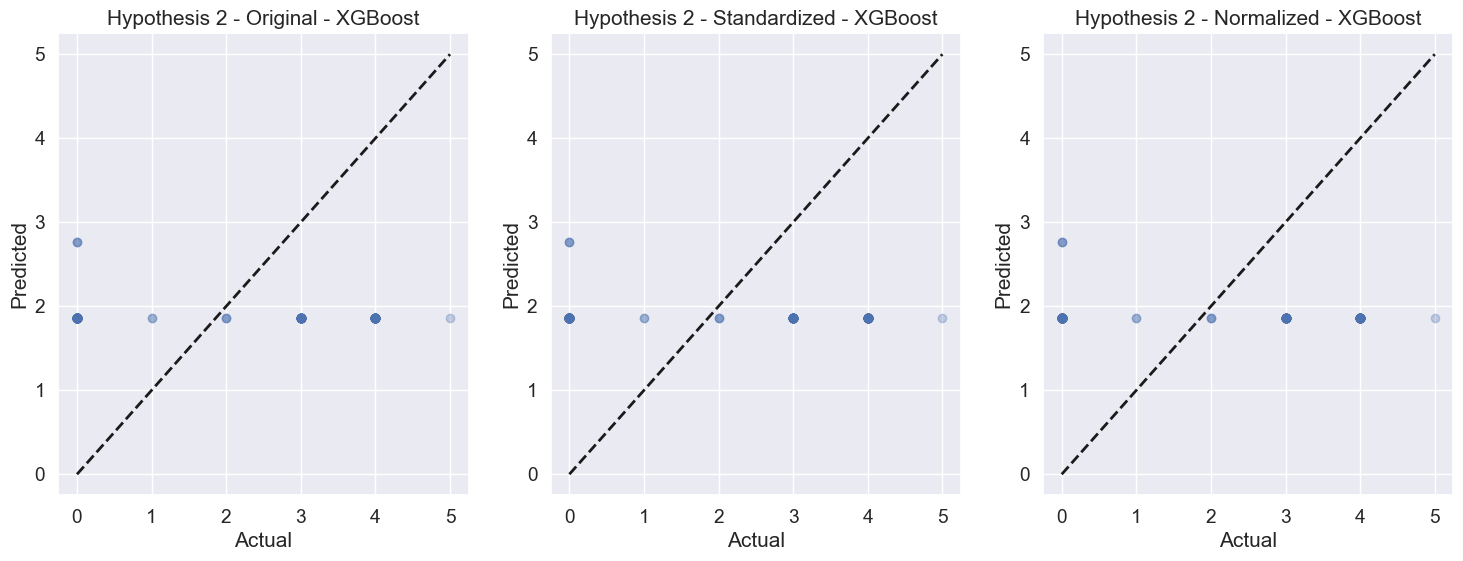

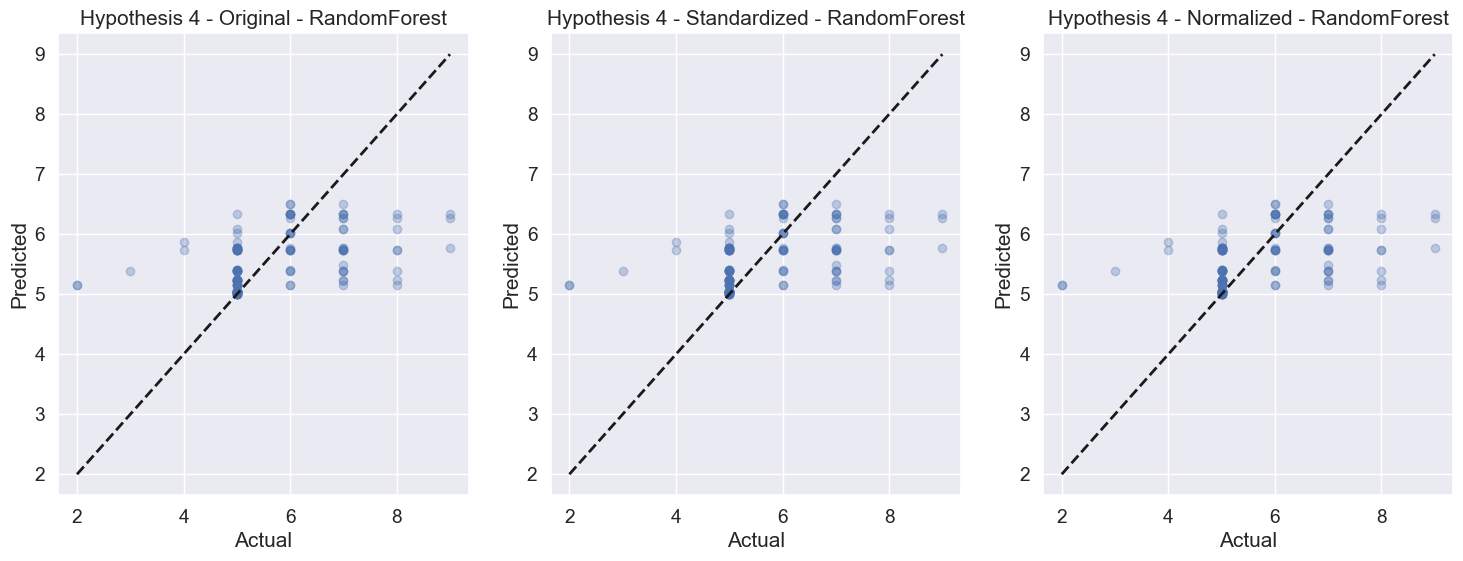

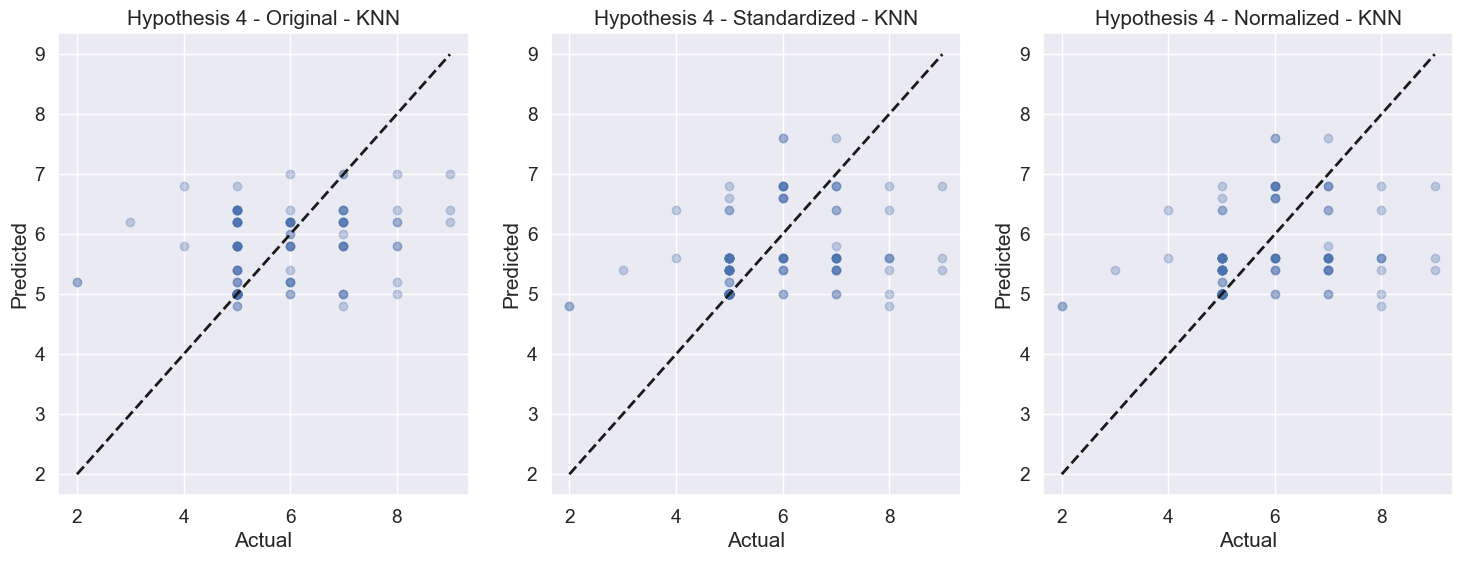

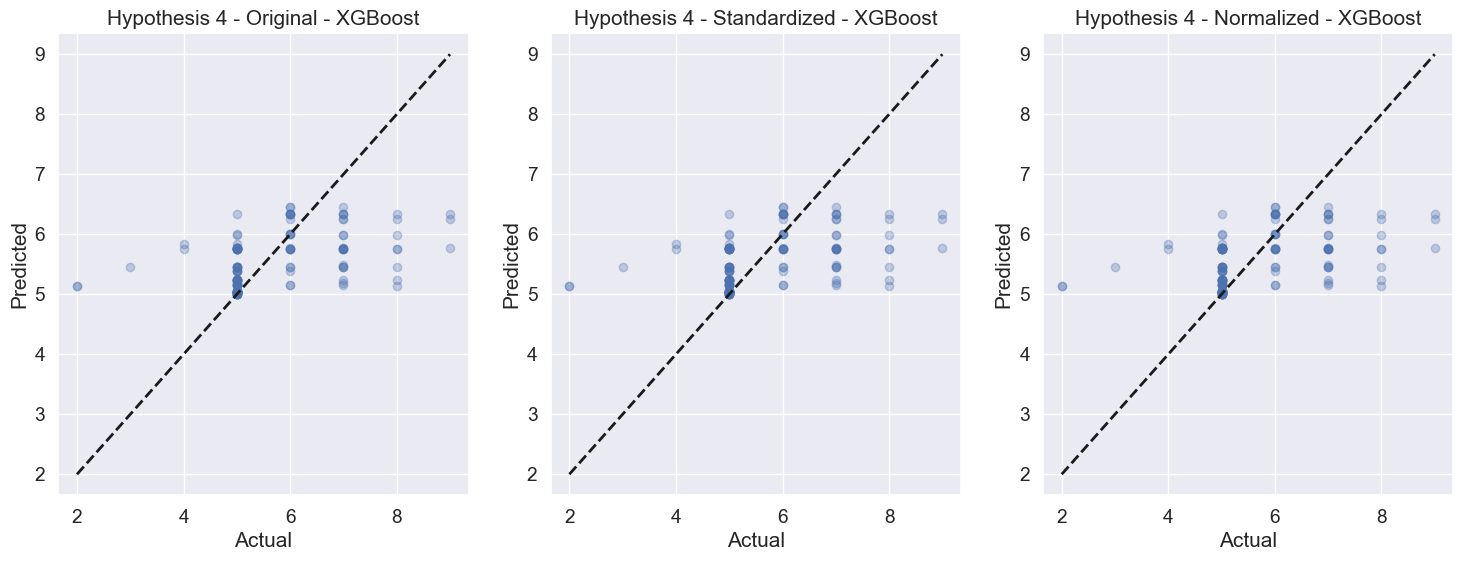

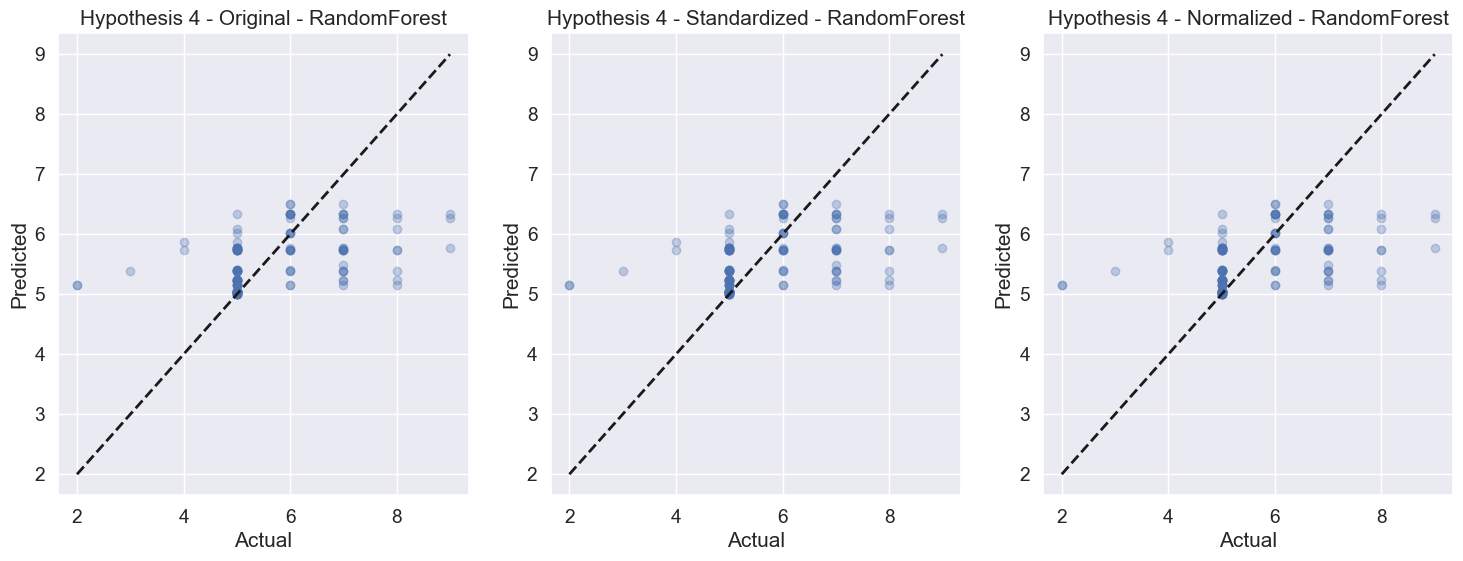

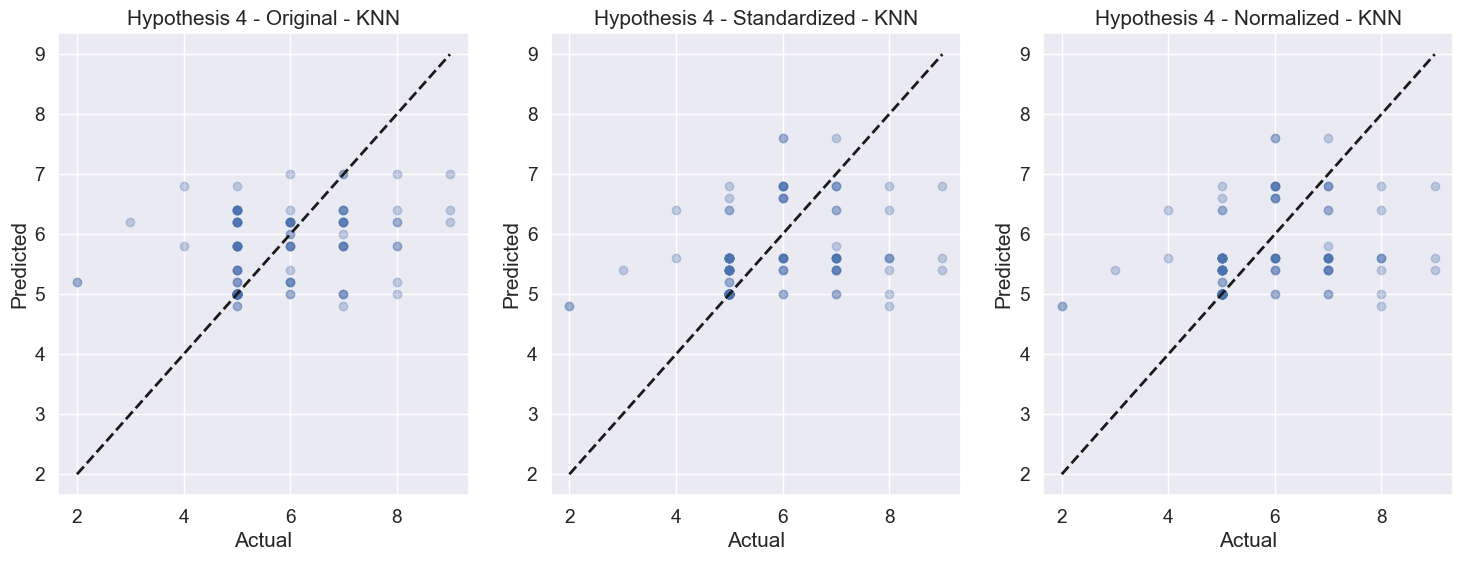

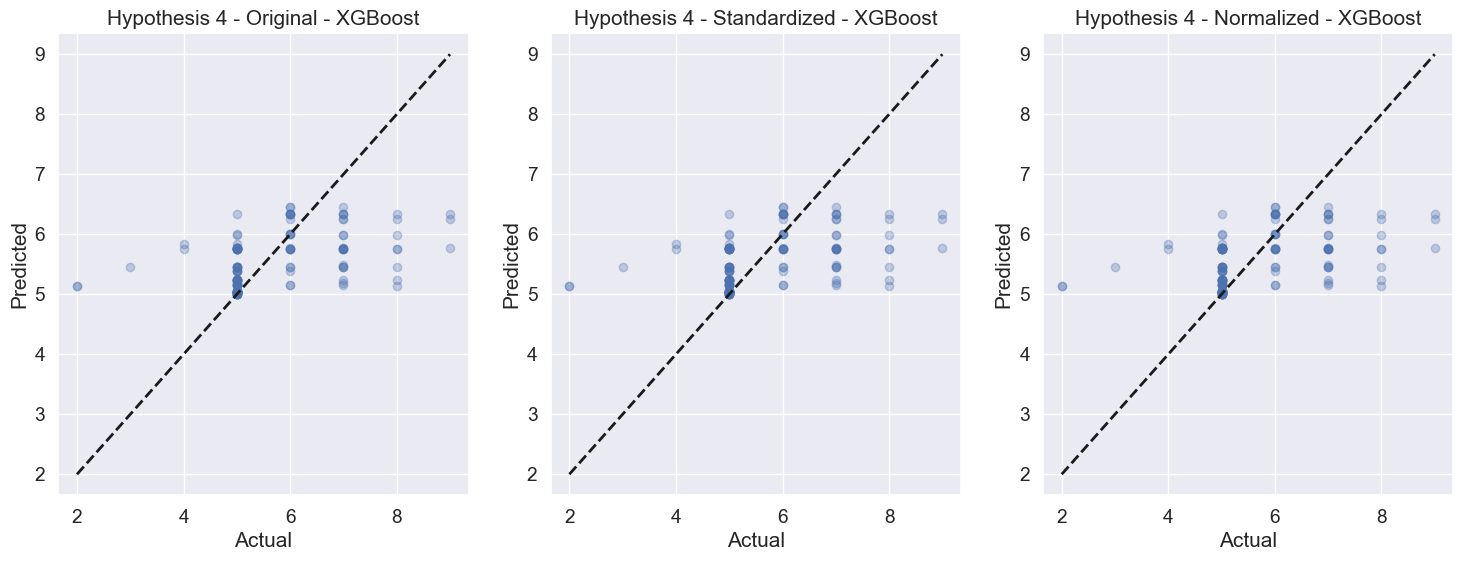

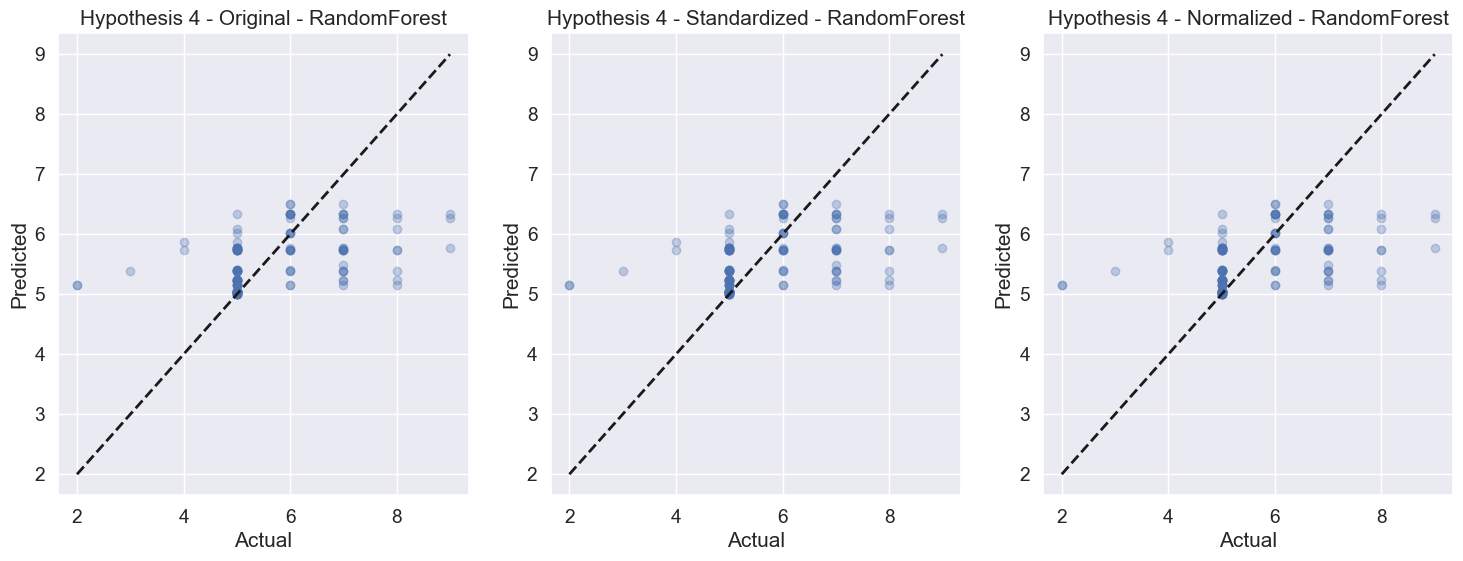

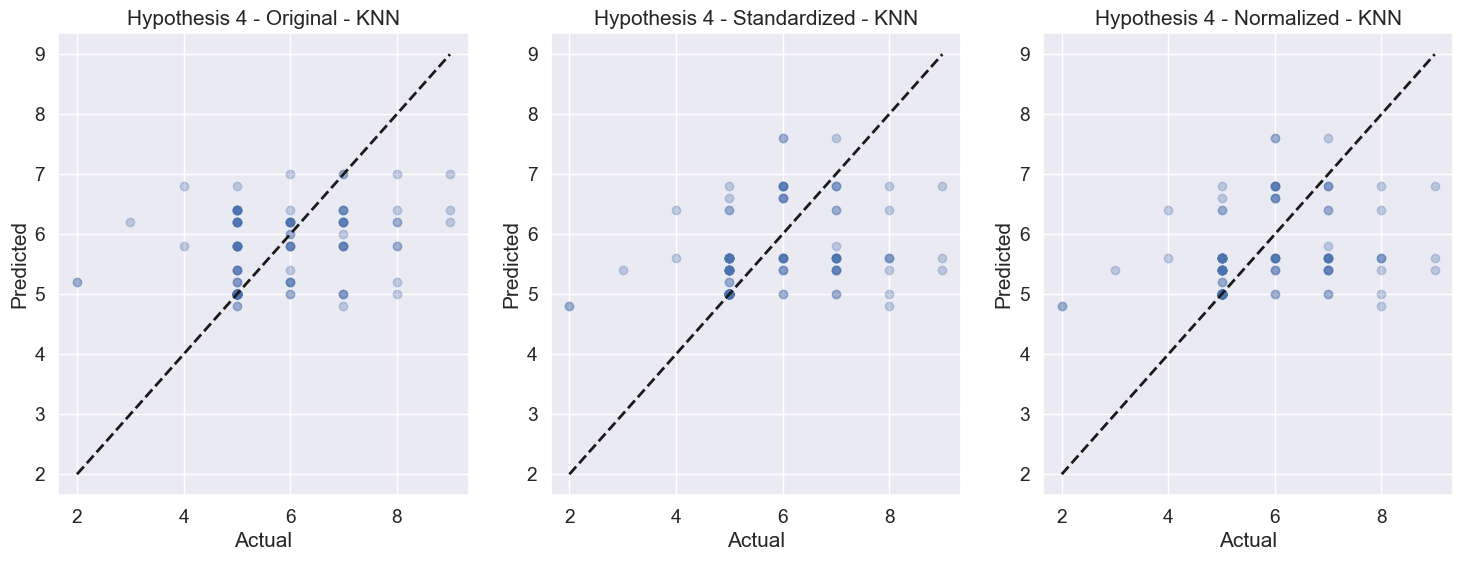

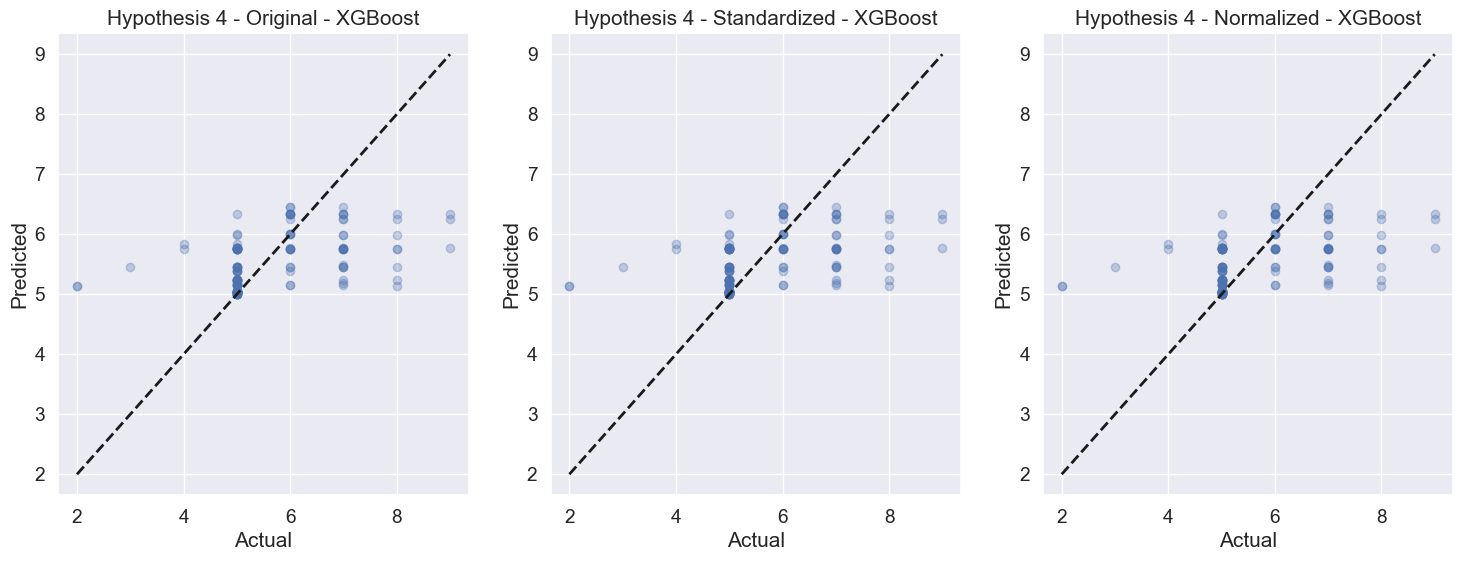

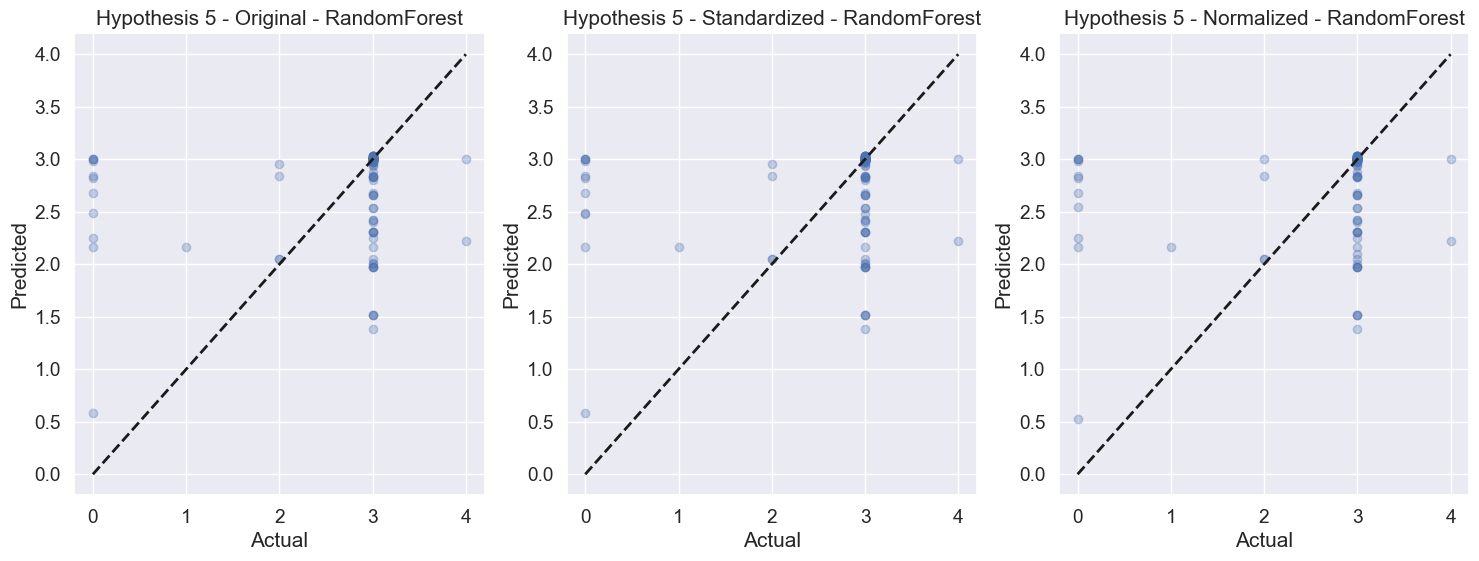

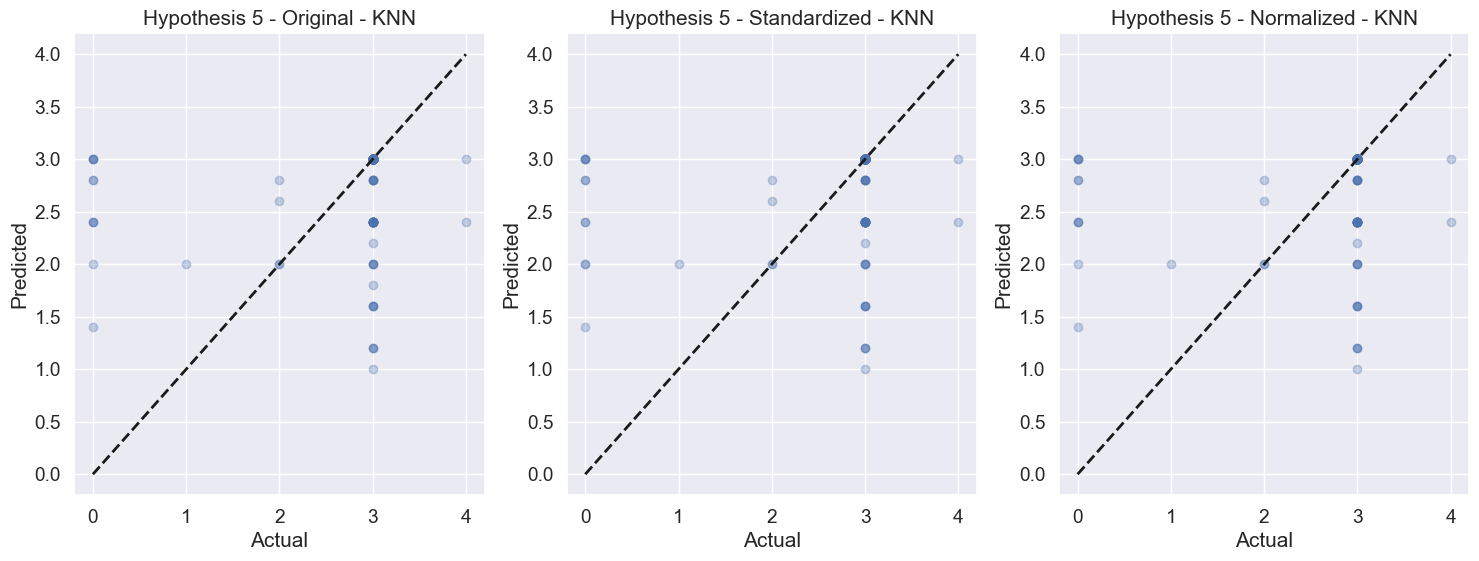

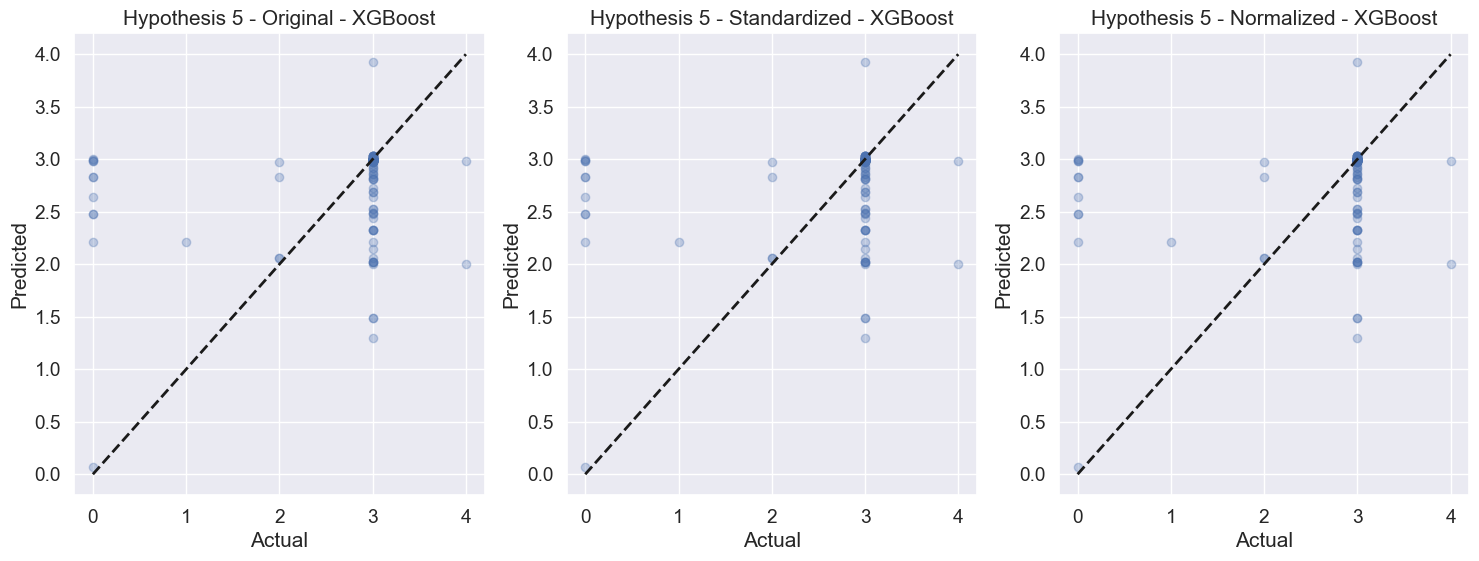

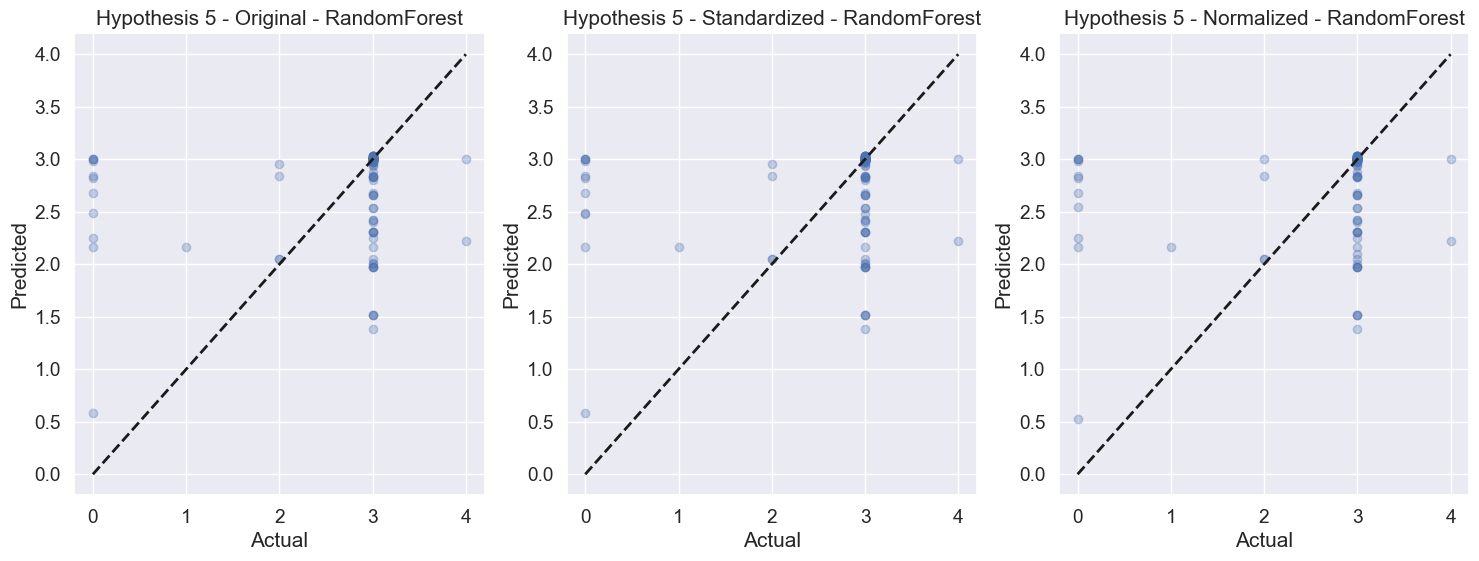

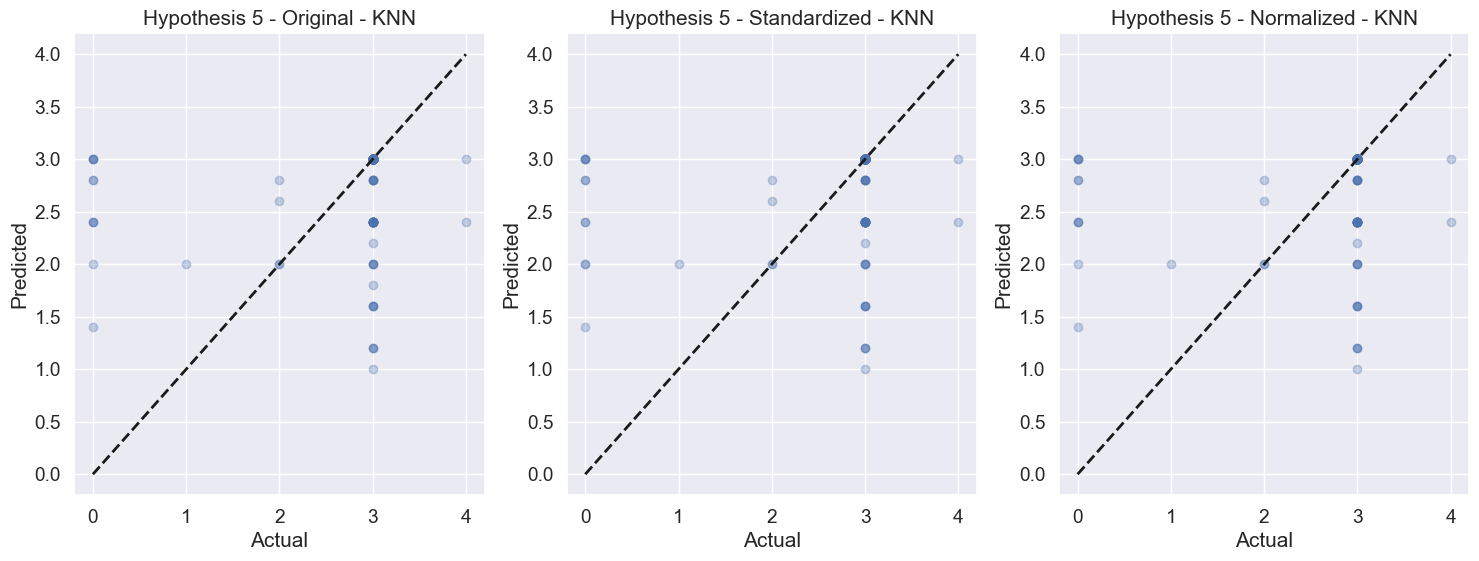

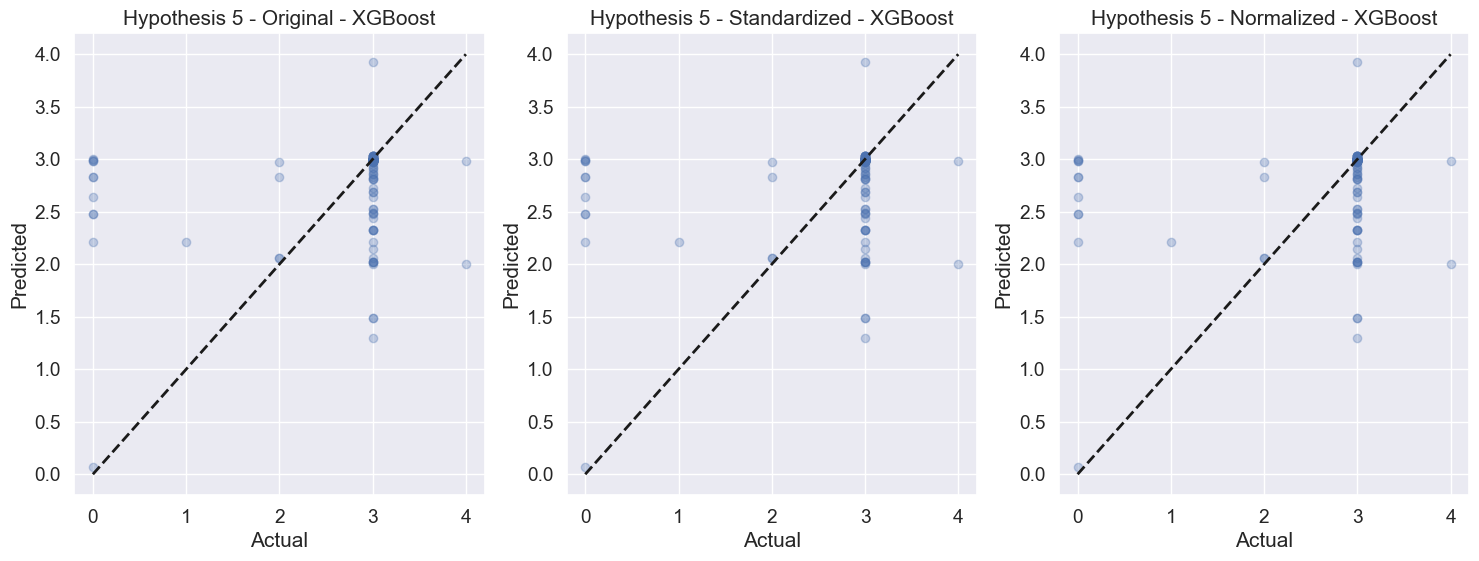

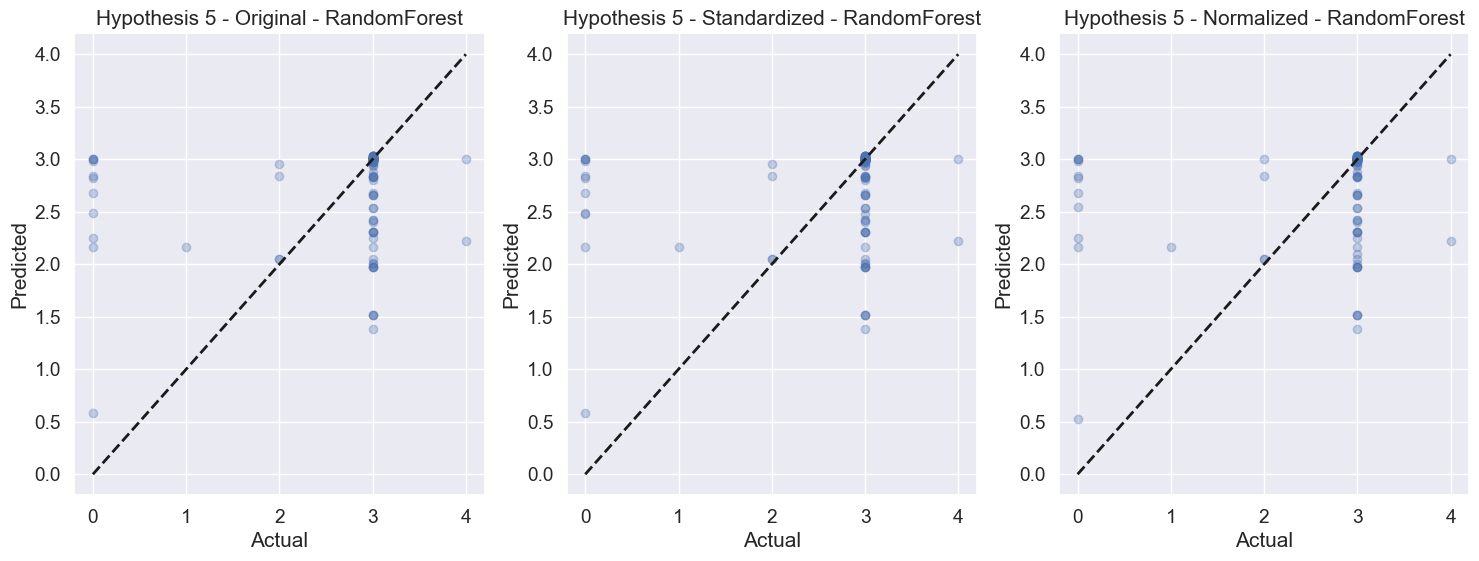

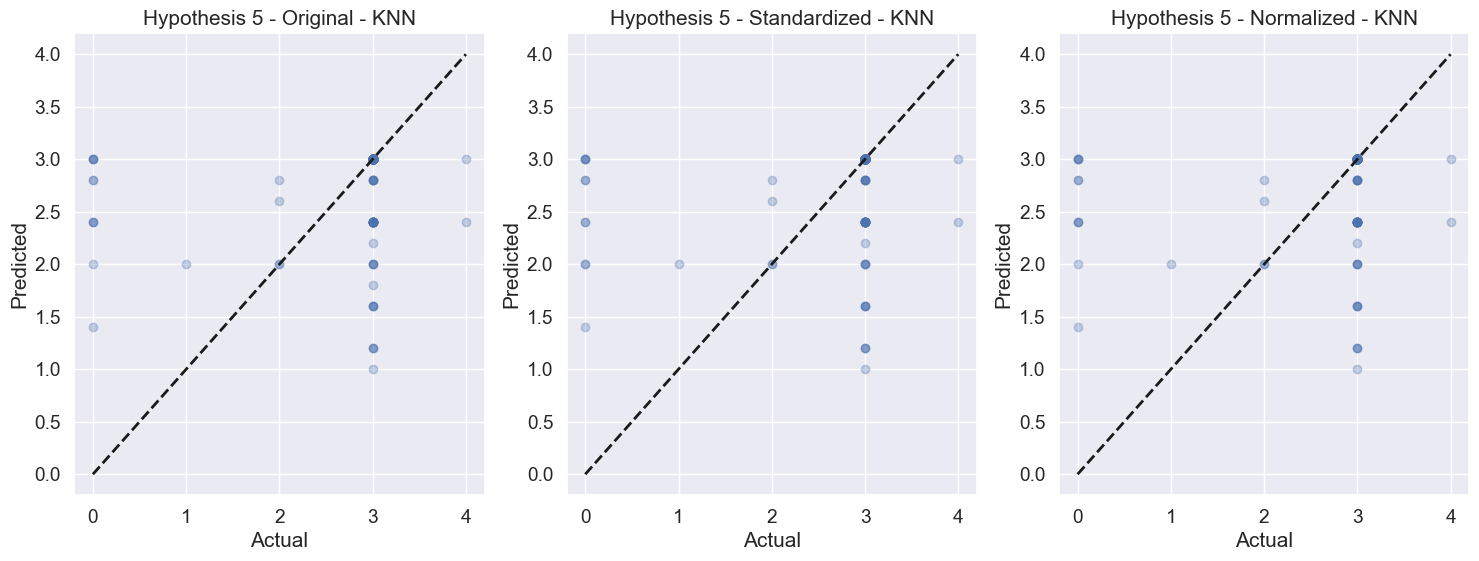

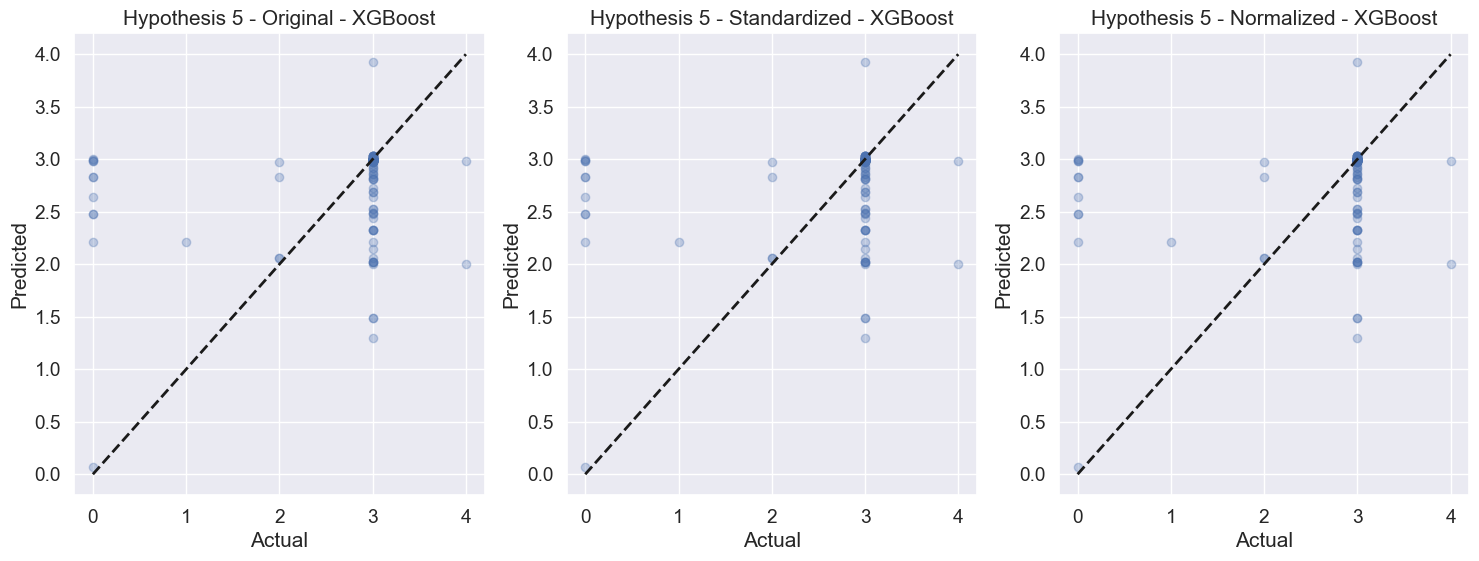

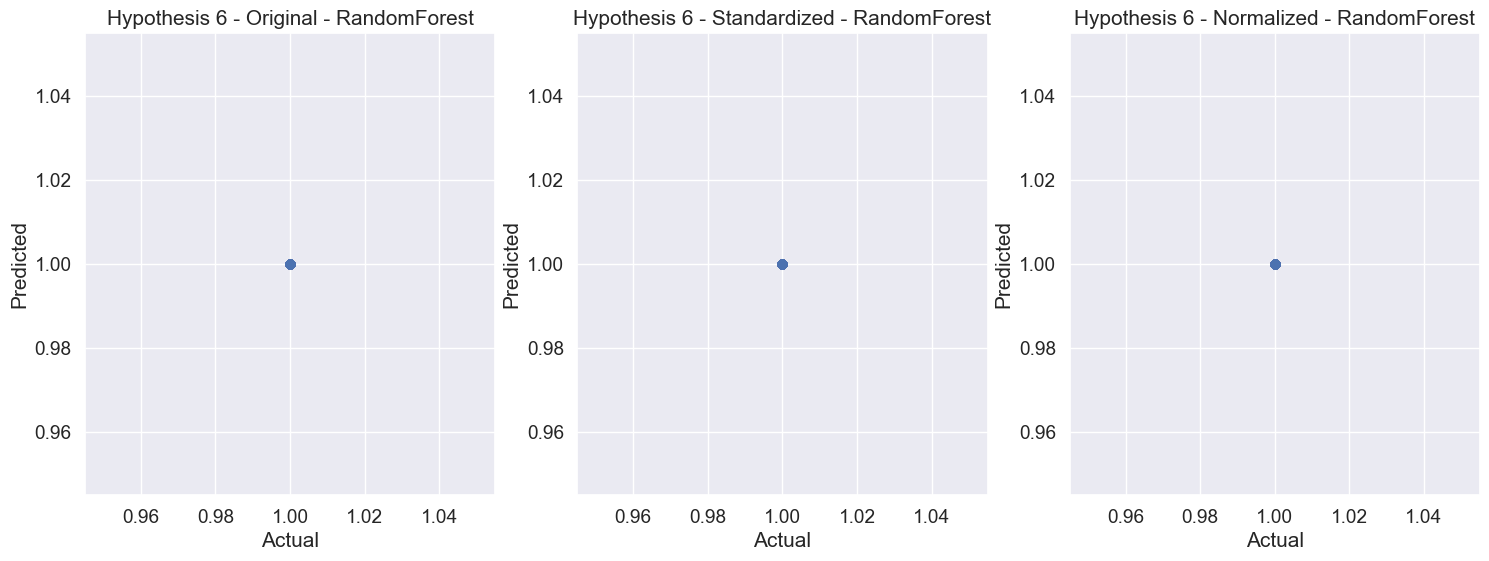

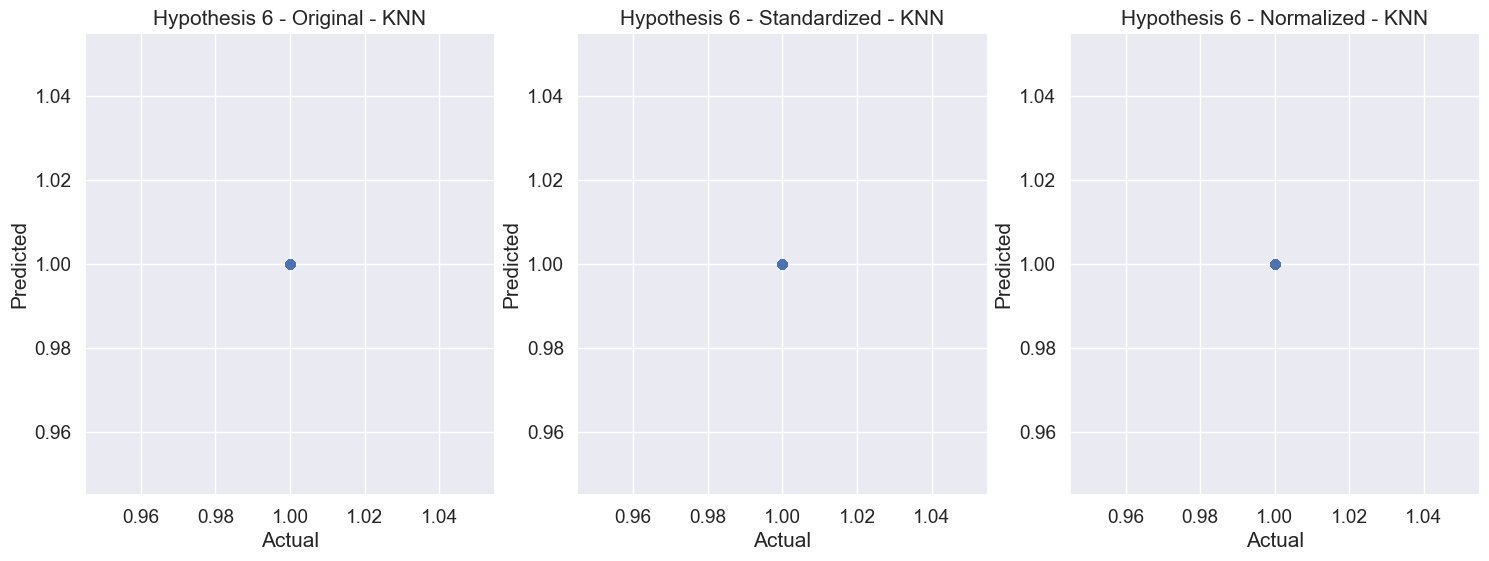

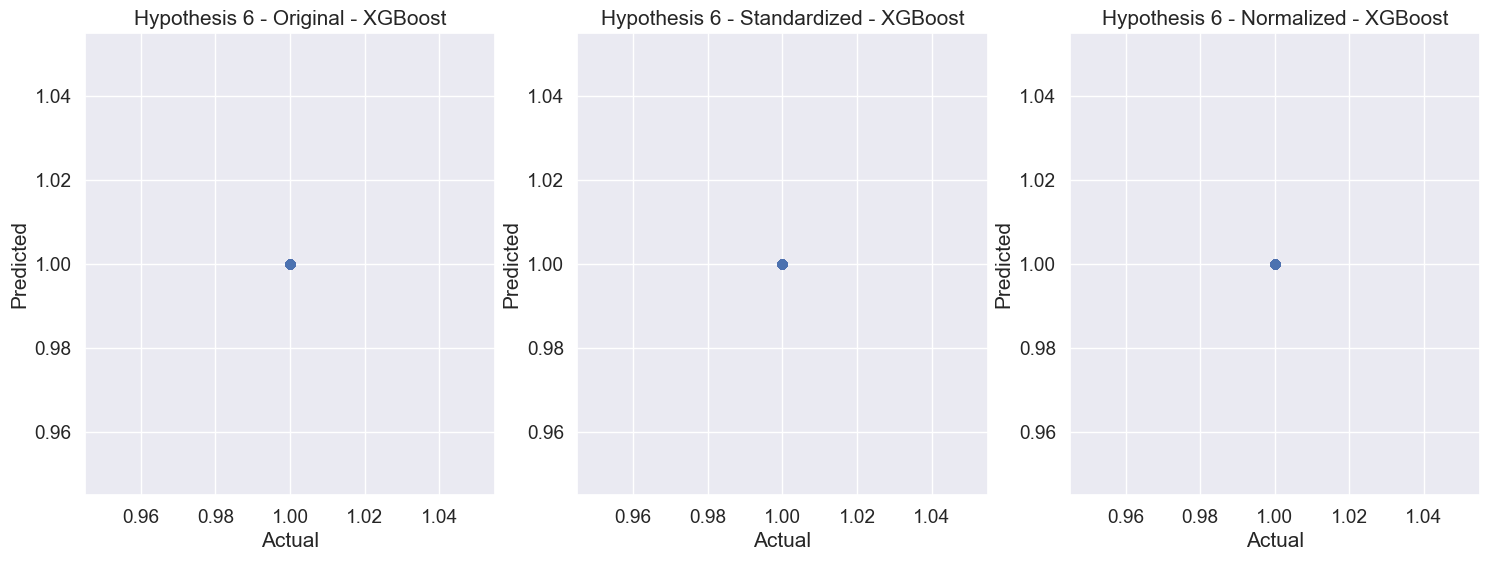

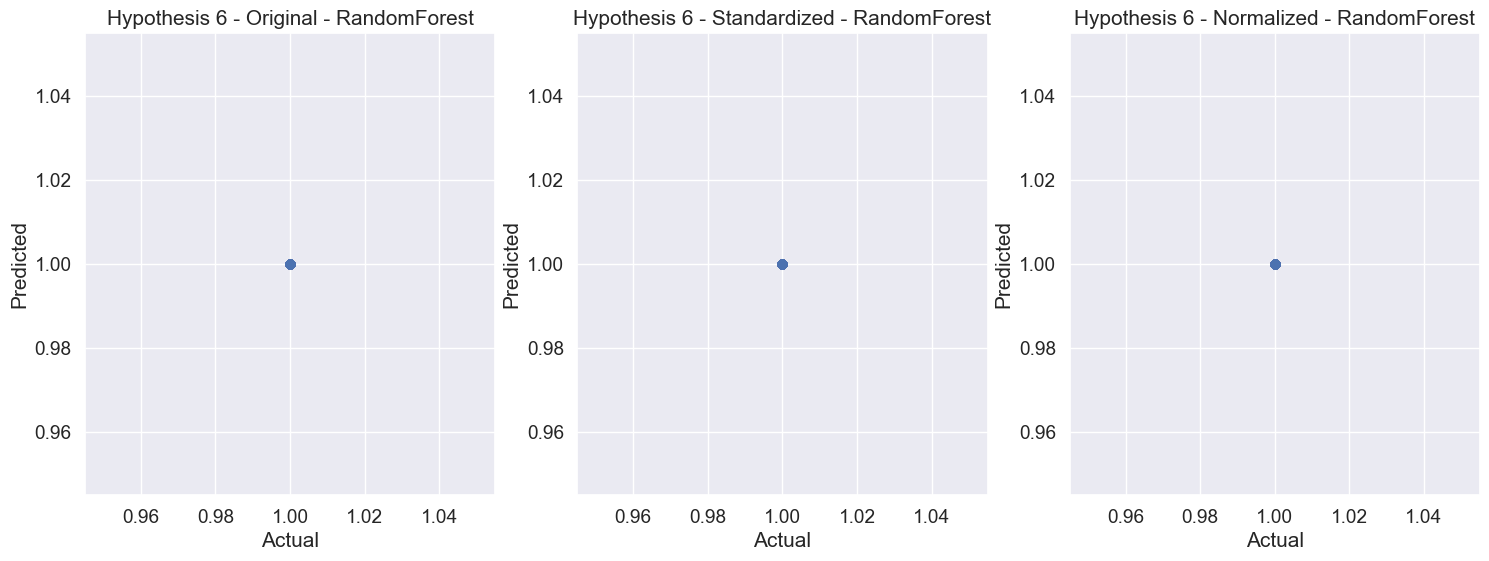

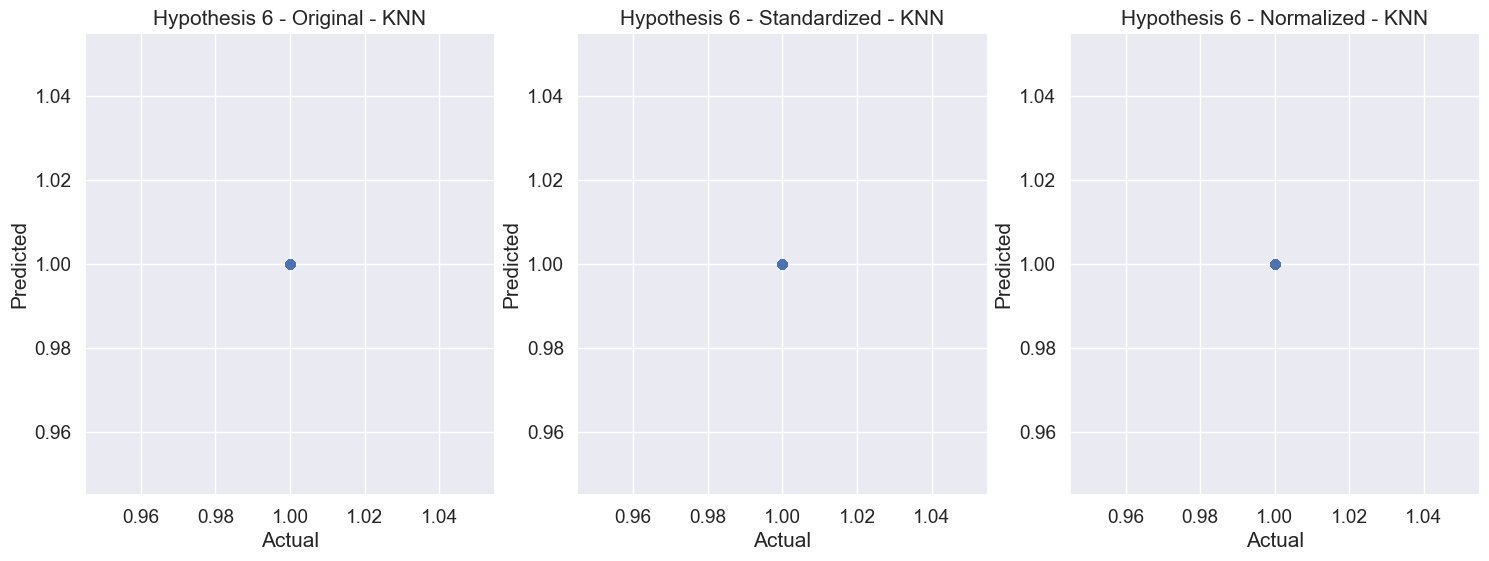

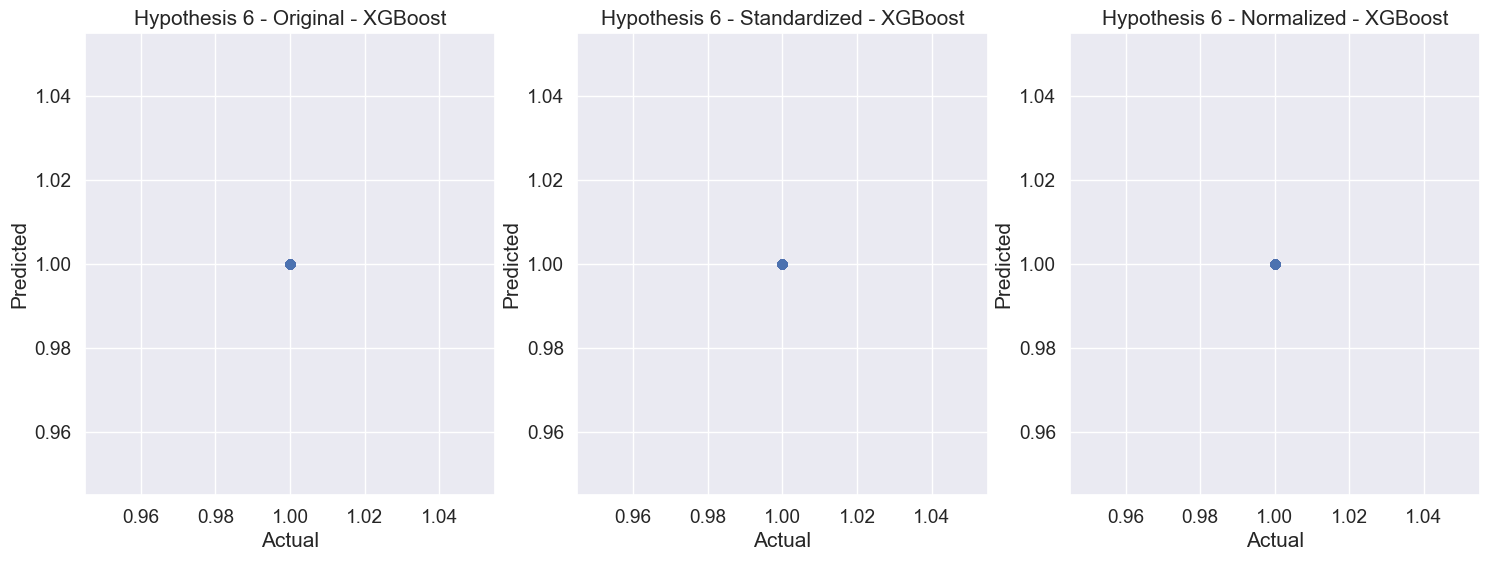

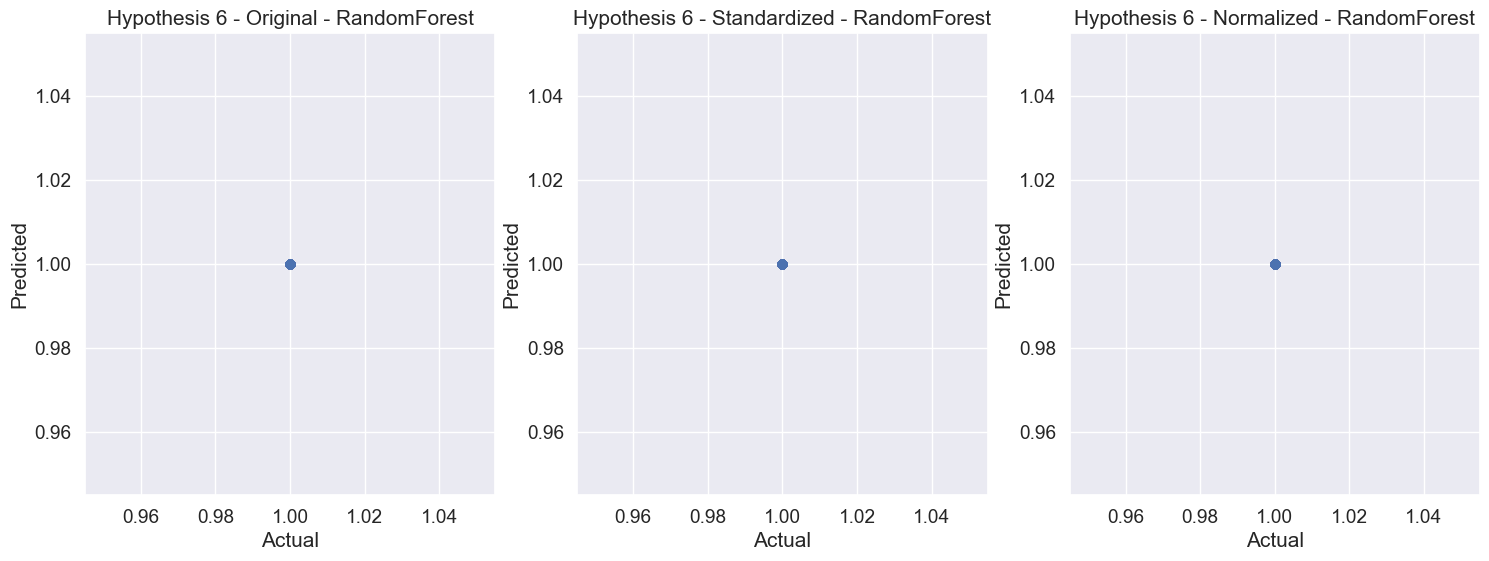

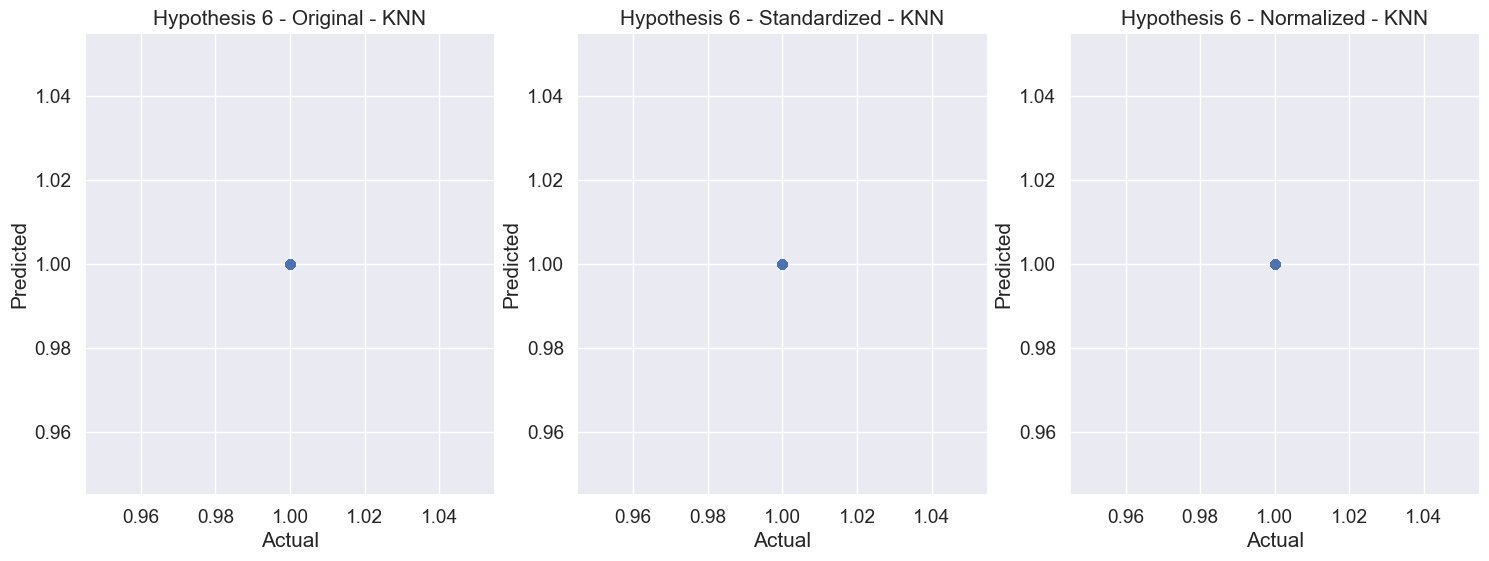

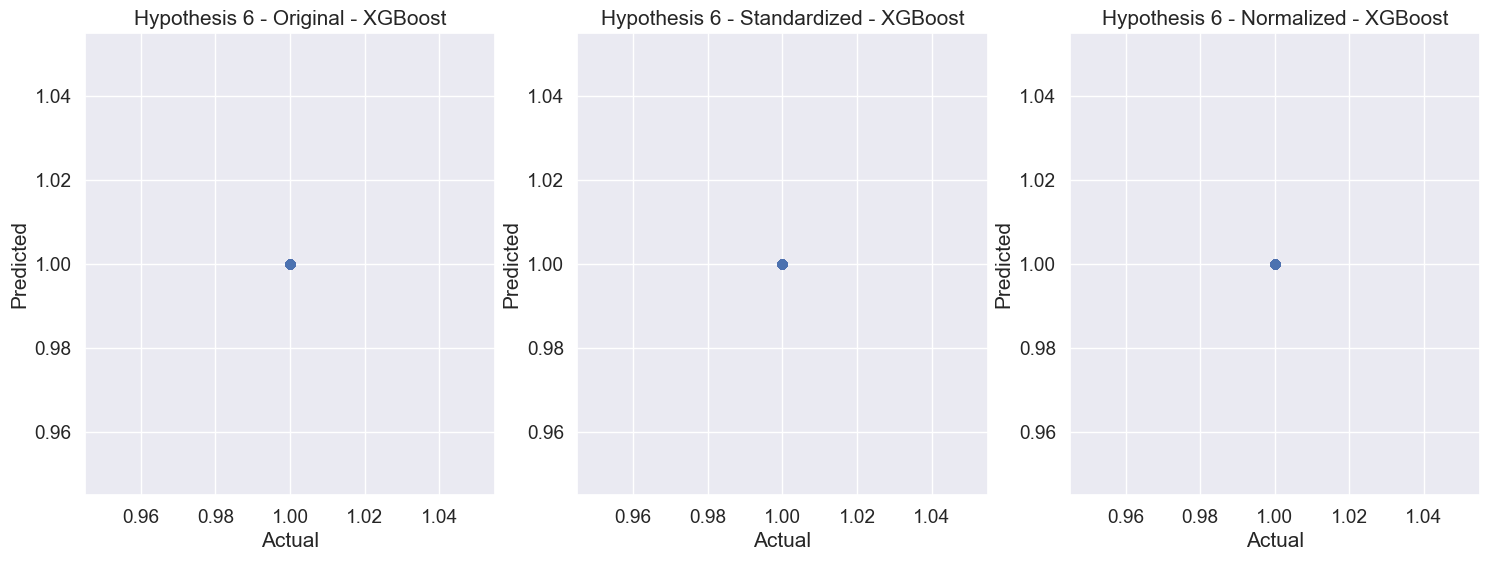

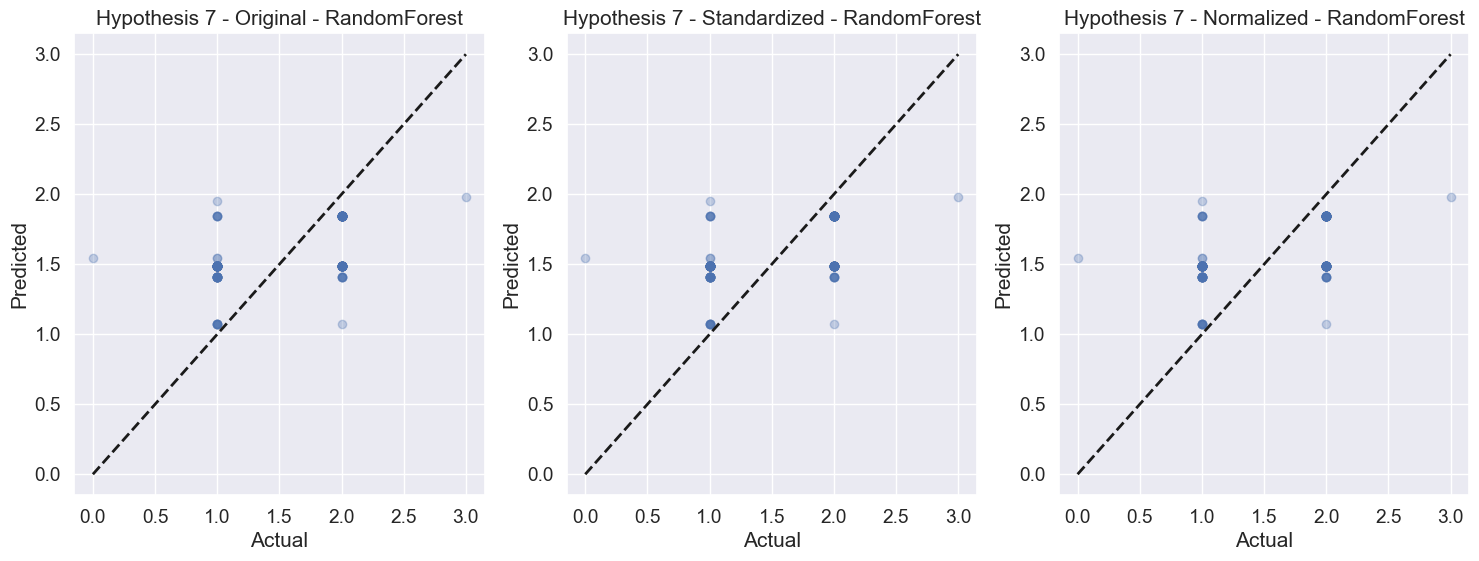

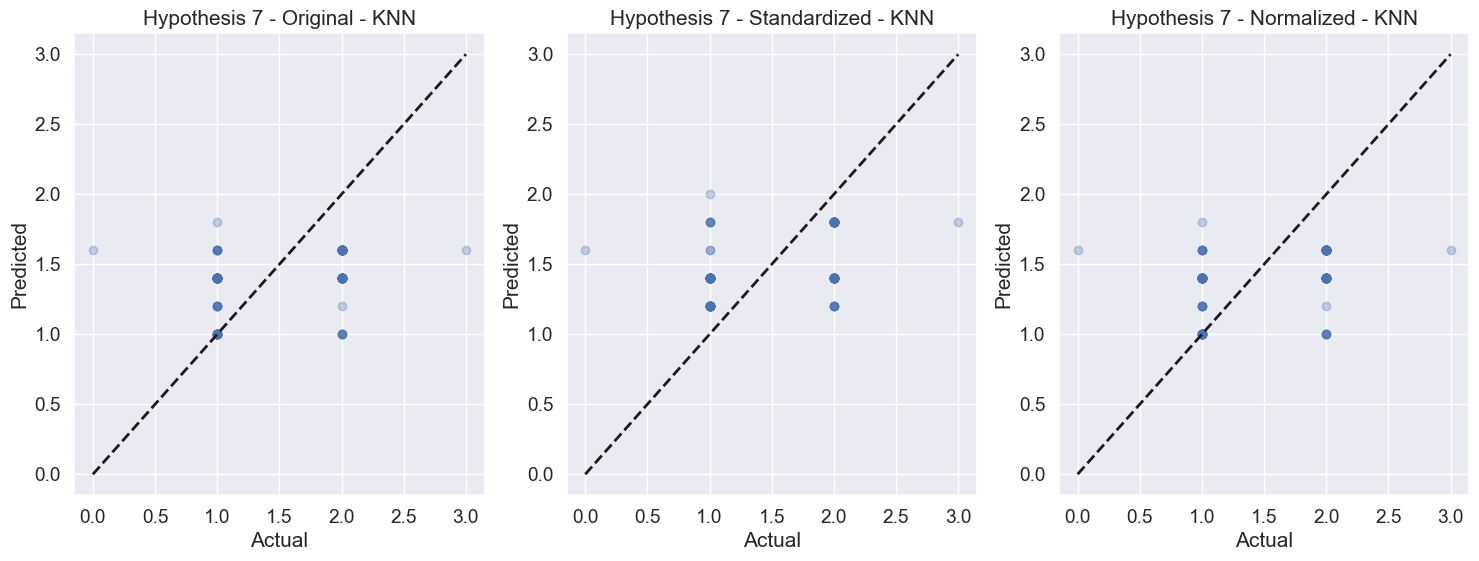

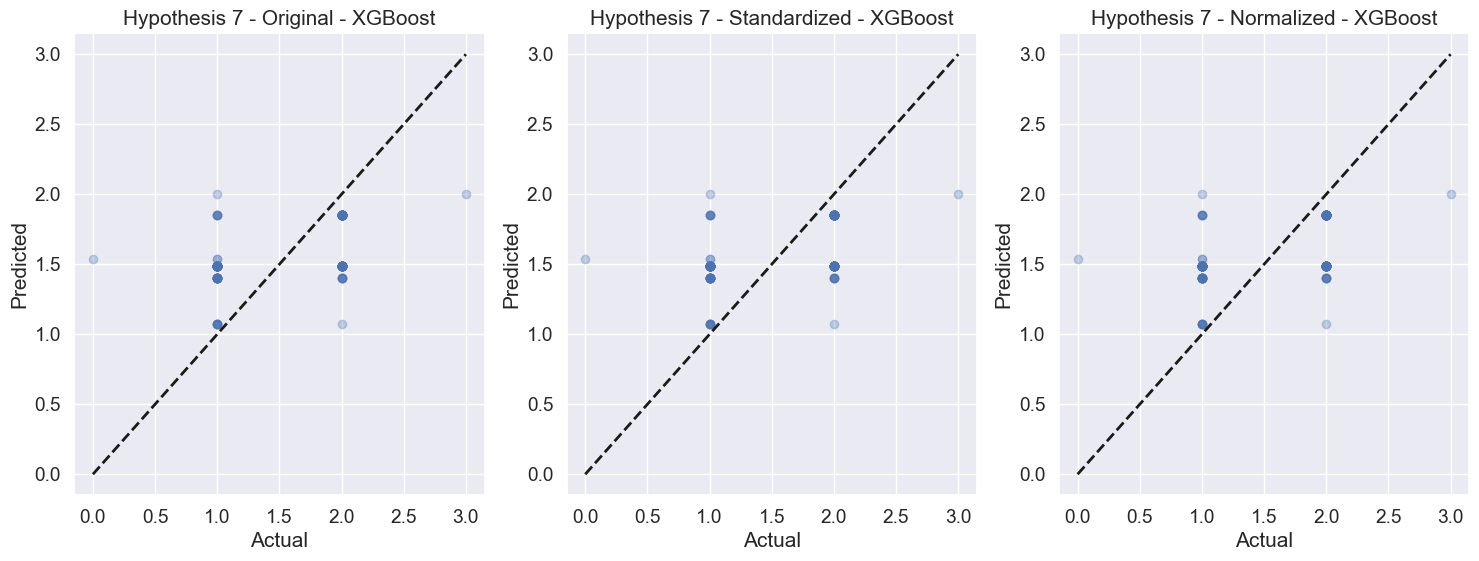

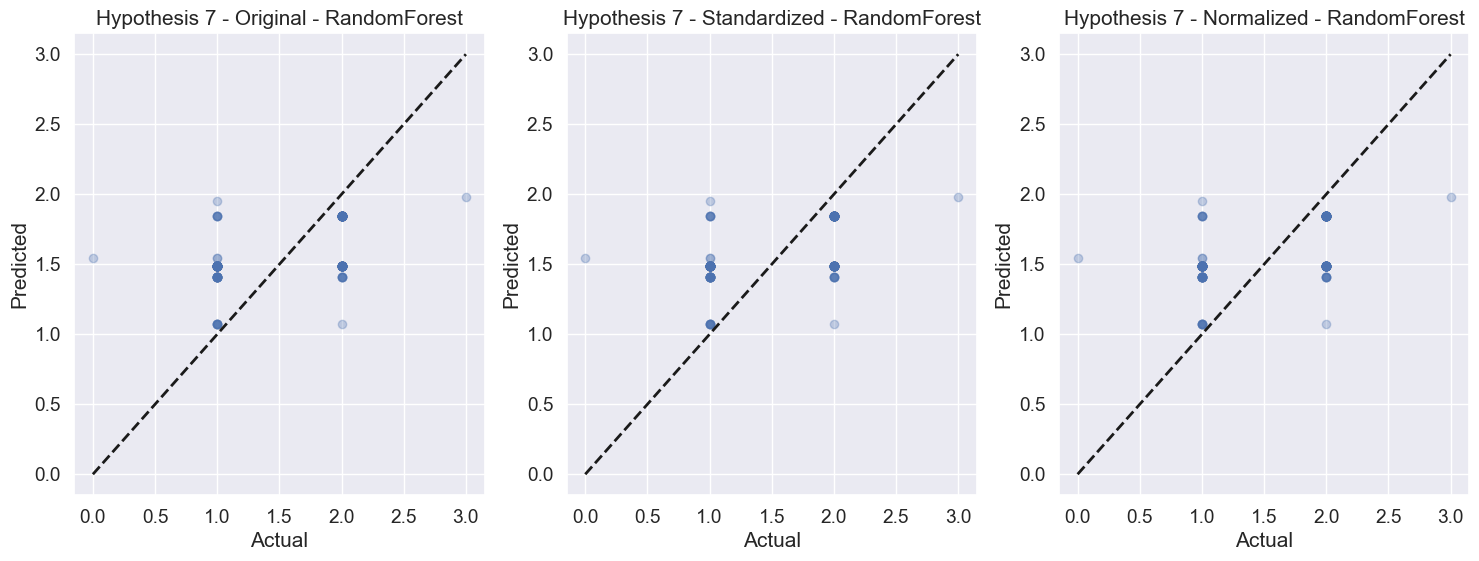

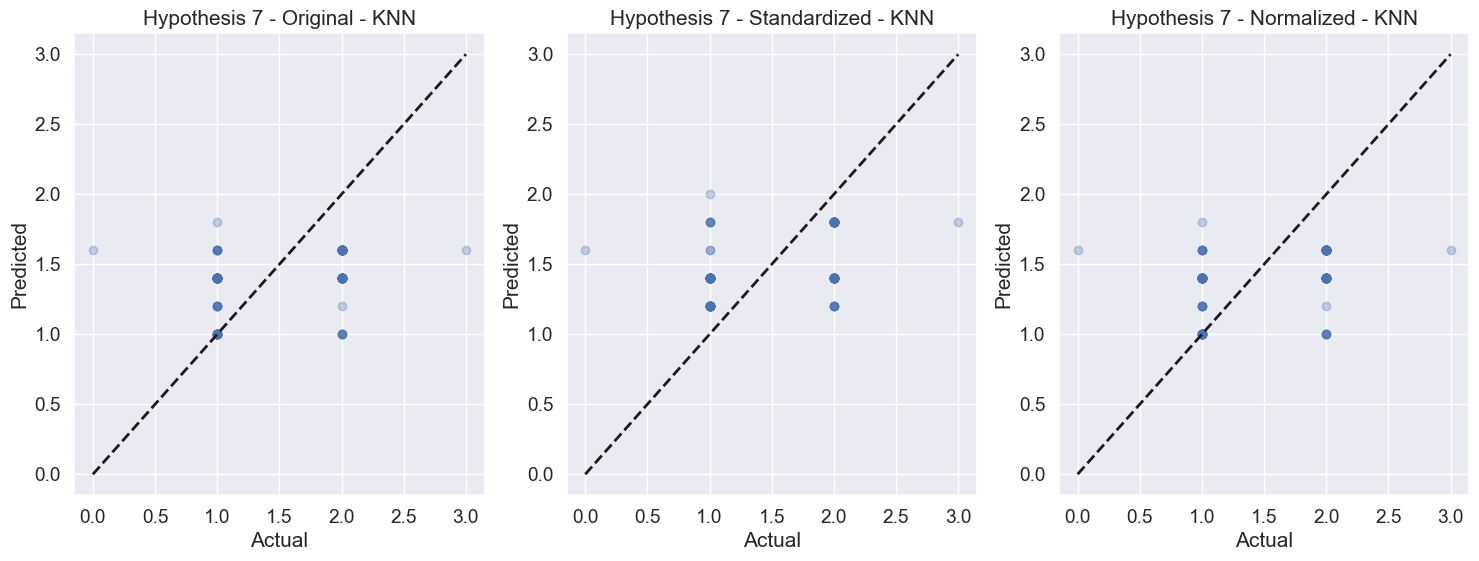

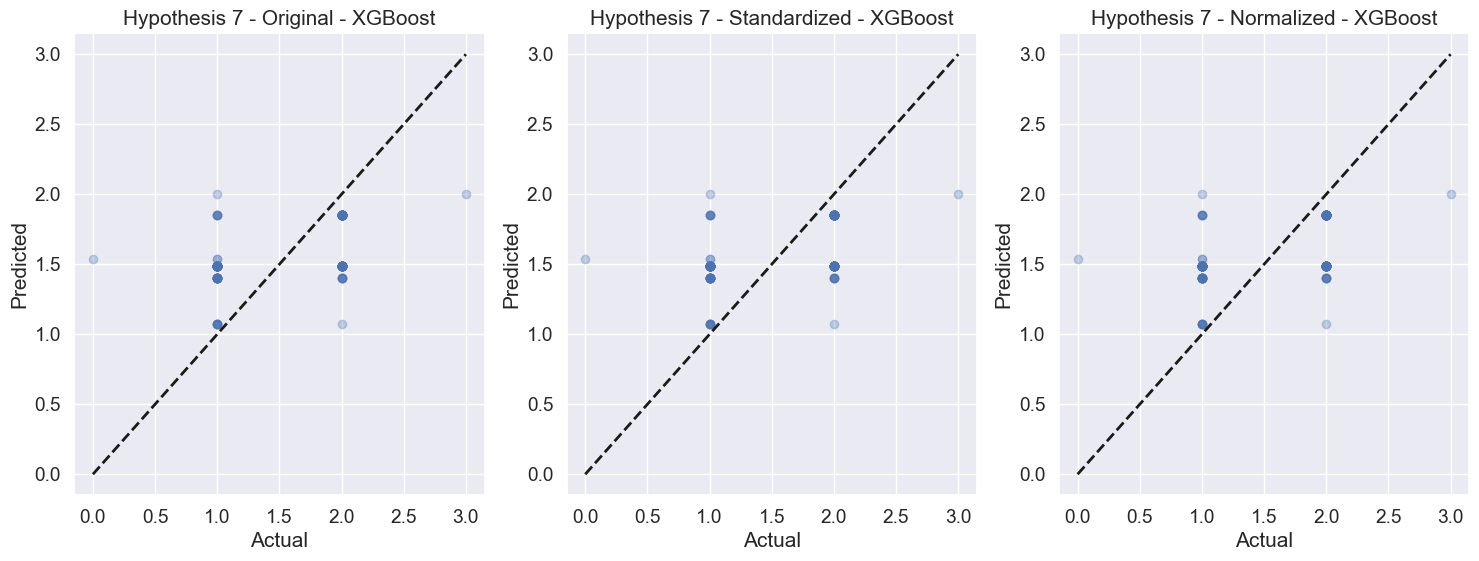

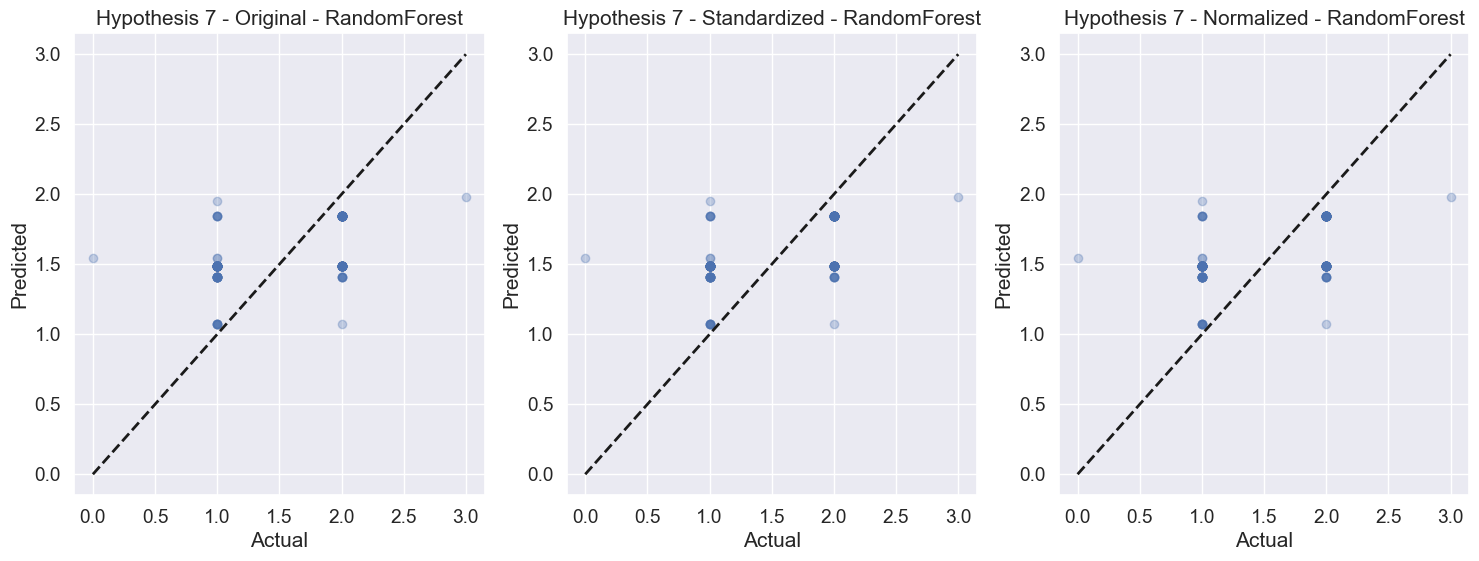

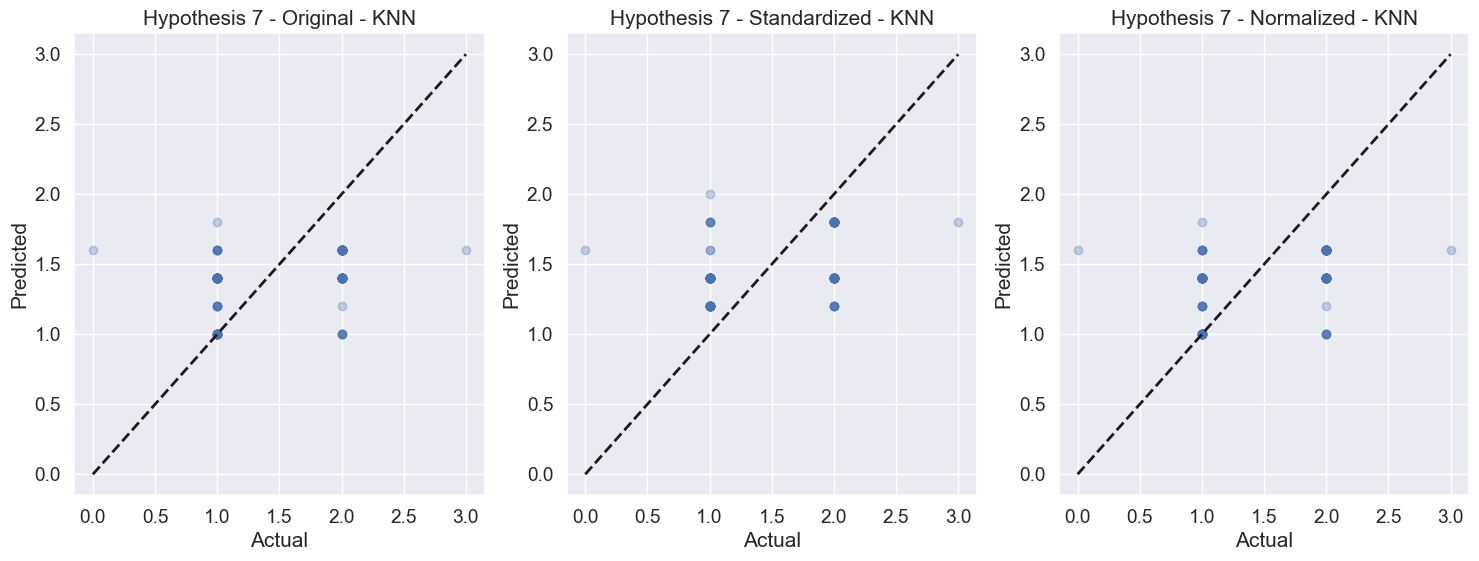

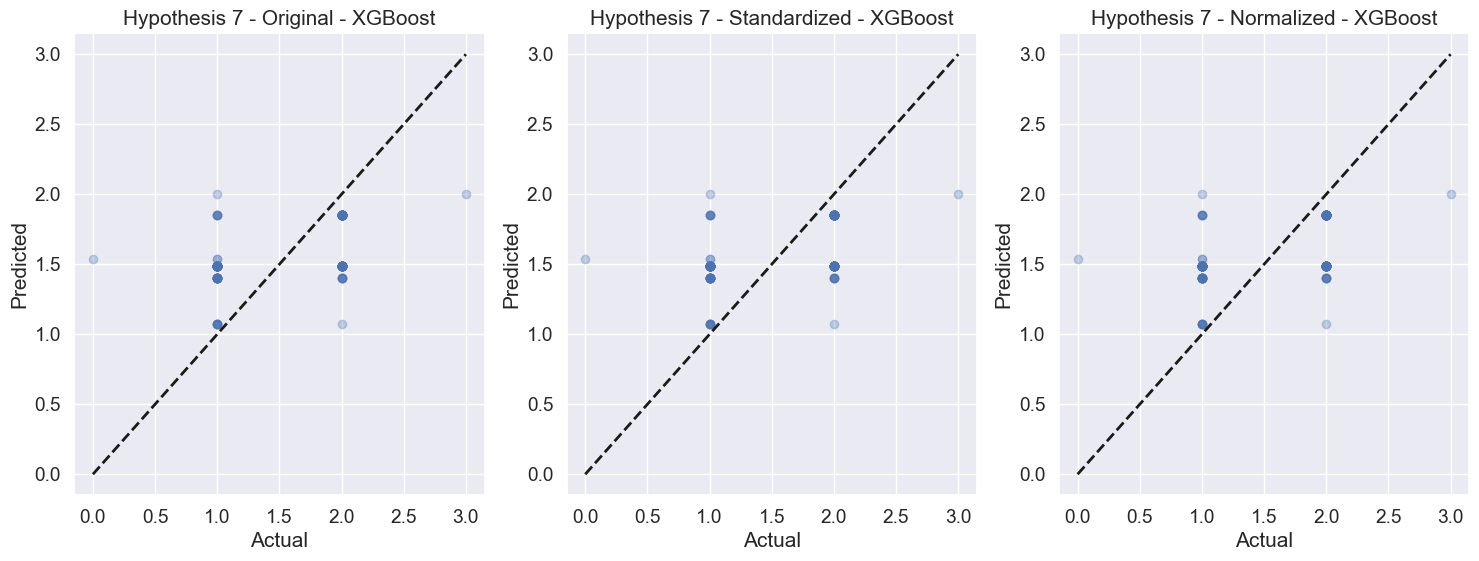

In [52]:

# Prepare and evaluate each hypothesis
bsmt_qual_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    'NoBasement': 0 # No Basement
}
# Hypothesis 1: The Impact of LotShape on Basement Quality (BsmtQual)
X_hypothesis_1 = train_df_subset[['lotshape']].copy()
X_hypothesis_1 = pd.get_dummies(X_hypothesis_1)  # Convert categorical data to numerical
y_hypothesis_1 = train_df_subset['bsmtqual'].map(bsmt_qual_mapping)
results['Hypothesis 1'] = evaluate_hypothesis('Hypothesis 1', X_hypothesis_1, y_hypothesis_1)

# Hypothesis 2: Influence of Exterior Material on Fireplaces (FireplaceQu)
exterior_mapping = {'BrkFace': 1, 'Stone': 2}
fb_qual_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    'NoFirePlace': 0 # No Basement
}

X_hypothesis_2 = train_df_subset[['exterior1st']].copy()
X_hypothesis_2['exterior1st'] = X_hypothesis_2['exterior1st'].map(exterior_mapping).fillna(0)
y_hypothesis_2 = train_df_subset['fireplacequ'].map(fb_qual_mapping)
results['Hypothesis 2'] = evaluate_hypothesis('Hypothesis 2', X_hypothesis_2, y_hypothesis_2)


# Hypothesis 4: The Effect of Neighborhood on Overall Condition (OverallCond)
X_hypothesis_4 = pd.get_dummies(train_df_subset[['neighborhood']])
y_hypothesis_4 = train_df_subset['overallcond']
results['Hypothesis 4'] = evaluate_hypothesis('Hypothesis 4', X_hypothesis_4, y_hypothesis_4)

# Hypothesis 5: Relationship Between Year Built (YearBuilt) and Garage Quality (GarageQual)
garage_qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGarage': 0}
X_hypothesis_5 = train_df_subset[['yearbuilt']]
y_hypothesis_5 = train_df_subset['garagequal'].map(garage_qual_mapping)
results['Hypothesis 5'] = evaluate_hypothesis('Hypothesis 5', X_hypothesis_5, y_hypothesis_5)

# Hypothesis 6: The Impact of Lot Configuration (LotConfig) on Fence Presence
X_hypothesis_6 = pd.get_dummies(train_df_subset[['lotconfig']])
y_hypothesis_6 = train_df_subset['fence'].notnull().astype(int)
results['Hypothesis 6'] = evaluate_hypothesis('Hypothesis 6', X_hypothesis_6, y_hypothesis_6)

# Hypothesis 3: Influence of House Style on Number of Full Bathrooms (FullBath)
X_hypothesis_7 = pd.get_dummies(train_df_subset[['housestyle']])
y_hypothesis_7 = train_df_subset['fullbath']
results['Hypothesis 3'] = evaluate_hypothesis('Hypothesis 7', X_hypothesis_7, y_hypothesis_7)





R² > 0.7: Indicates a strong model with good predictive power. Generally acceptable for most applications.
0.5 < R² ≤ 0.7: Indicates a moderate model with reasonable predictive power. May be acceptable depending on the application.
0.3 < R² ≤ 0.5: Indicates a weak model with limited predictive power. Generally requires improvement but may be acceptable in exploratory or early-stage research.
R² ≤ 0.3: Indicates a poor model with minimal predictive power. Generally unacceptable for most applications.

In [53]:
# Define a threshold for accepting/rejecting hypotheses
r2_threshold = 0.5  # Example threshold for R² score to decide acceptance

def evaluate_results(results):
    evaluation_summary = []
    for hypothesis, models in results.items():
        for model_name, metrics in models.items():
            decision = 'Accept' if metrics['r2'] > r2_threshold else 'Reject'
            evaluation_summary.append({
                'Hypothesis': hypothesis,
                'Model': model_name,
                'r2': metrics['r2'],
                'mae': metrics['mae'],
                'mse': metrics['mse'],
                'rmse': metrics['rmse'],
                'Decision': decision
            })
    return pd.DataFrame(evaluation_summary)

# Print and display the evaluation summary
evaluation_summary_df = evaluate_results(results)
print(evaluation_summary_df)



      Hypothesis                      Model        r2       mae       mse  \
0   Hypothesis 1      Original_RandomForest -0.003644  0.672541  0.880331   
1   Hypothesis 1             Normalized_KNN -0.571431  0.782192  1.378356   
2   Hypothesis 1         Normalized_XGBoost -0.005033  0.672531  0.881549   
3   Hypothesis 1  Standardized_RandomForest -0.003644  0.672541  0.880331   
4   Hypothesis 1    Normalized_RandomForest -0.003644  0.672541  0.880331   
5   Hypothesis 2      Original_RandomForest -0.027437  1.764128  3.332423   
6   Hypothesis 2             Normalized_KNN -0.103938  1.787671  3.580548   
7   Hypothesis 2         Normalized_XGBoost -0.028570  1.765190  3.336098   
8   Hypothesis 2  Standardized_RandomForest -0.027437  1.764128  3.332423   
9   Hypothesis 2    Normalized_RandomForest -0.027437  1.764128  3.332423   
10  Hypothesis 4      Original_RandomForest  0.201088  0.694699  1.069664   
11  Hypothesis 4             Normalized_KNN  0.087167  0.730137  1.222192   

In [54]:
numerical_columns = train.select_dtypes(include=[np.number]).columns
skewness = train[numerical_columns].skew().sort_values(ascending=False)
for col in skewness.index:
    if skewness[col] > 0.75:
        train[col] = np.log1p(train[col])
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
data_normalized = train.copy()
data_standardized = train.copy()
data_normalized[numerical_columns] = min_max_scaler.fit_transform(train[numerical_columns])
data_standardized[numerical_columns] = standard_scaler.fit_transform(train[numerical_columns])

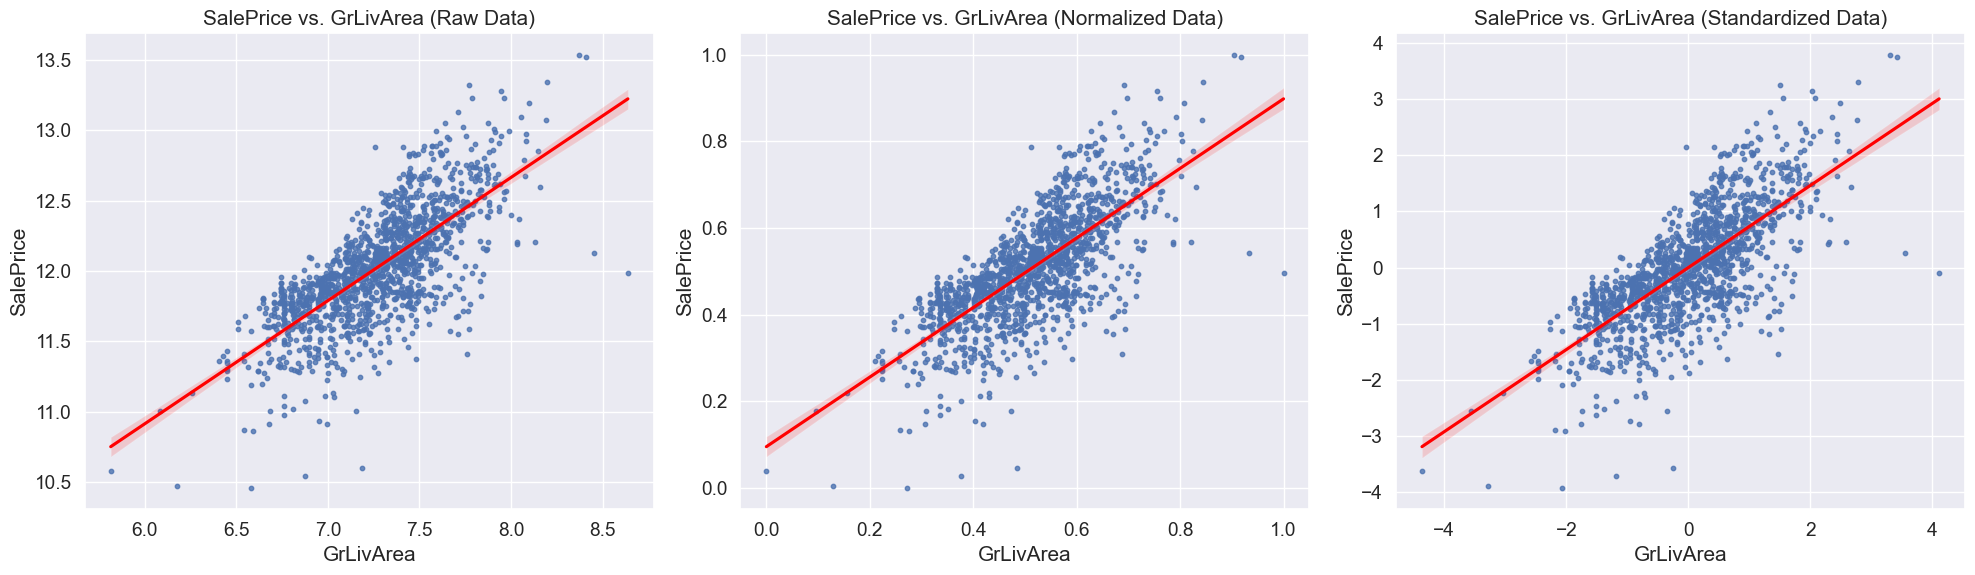

In [55]:
# Hypothesis 1: Larger houses (GrLivArea) have higher sale prices (SalePrice)
plt.figure(figsize=(20, 6))

# Raw Data
plt.subplot(1, 3, 1)
sns.regplot(x='grlivarea', y='saleprice', data=train, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. GrLivArea (Raw Data)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# Normalized Data
plt.subplot(1, 3, 2)
sns.regplot(x='grlivarea', y='saleprice', data=data_normalized, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. GrLivArea (Normalized Data)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# Standardized Data
plt.subplot(1, 3, 3)
sns.regplot(x='grlivarea', y='saleprice', data=data_standardized, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. GrLivArea (Standardized Data)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

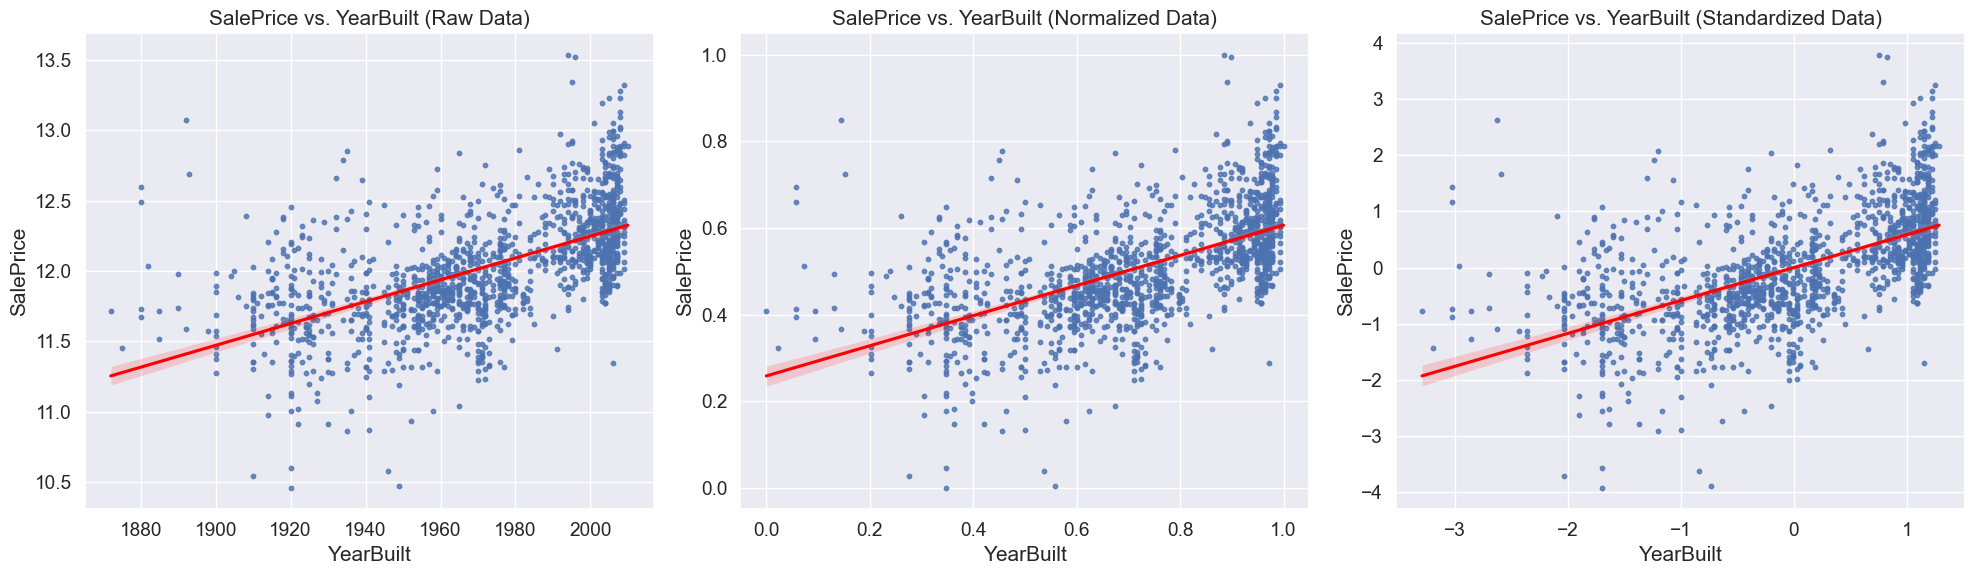

In [56]:
plt.figure(figsize=(20, 6))

# Raw Data
plt.subplot(1, 3, 1)
sns.regplot(x='yearbuilt', y='saleprice', data=train, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. YearBuilt (Raw Data)')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

# Normalized Data
plt.subplot(1, 3, 2)
sns.regplot(x='yearbuilt', y='saleprice', data=data_normalized, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. YearBuilt (Normalized Data)')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

# Standardized Data
plt.subplot(1, 3, 3)
sns.regplot(x='yearbuilt', y='saleprice', data=data_standardized, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. YearBuilt (Standardized Data)')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

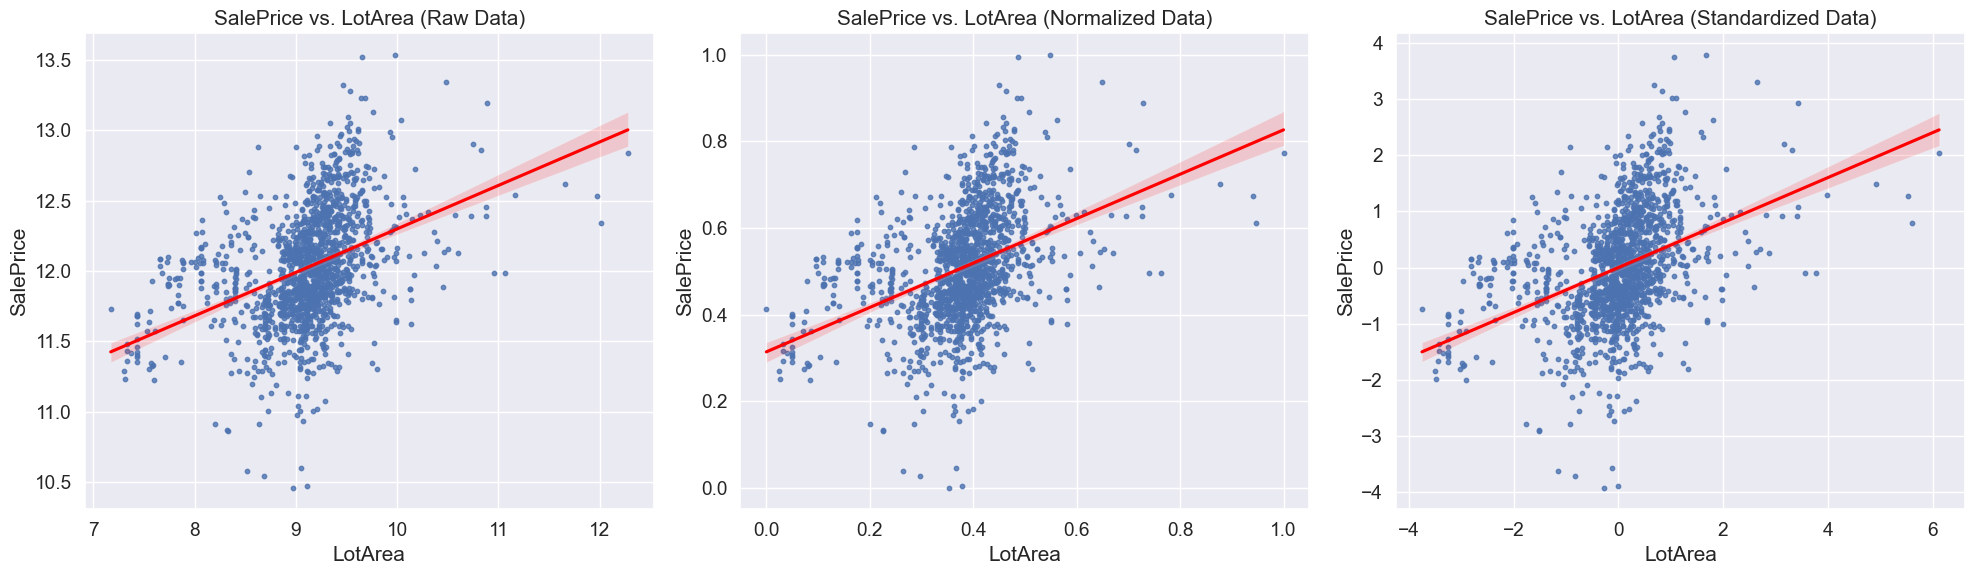

In [57]:
# Hypothesis 5: Houses in neighborhoods with higher average lot areas (LotArea) have higher sale prices (SalePrice)
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.regplot(x='lotarea', y='saleprice', data=train, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. LotArea (Raw Data)')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

plt.subplot(1, 3, 2)
sns.regplot(x='lotarea', y='saleprice', data=pd.DataFrame(data_normalized, columns=train.columns), scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. LotArea (Normalized Data)')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

plt.subplot(1, 3, 3)
sns.regplot(x='lotarea', y='saleprice', data=pd.DataFrame(data_standardized, columns=train.columns), scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. LotArea (Standardized Data)')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.tight_layout()

plt.show()

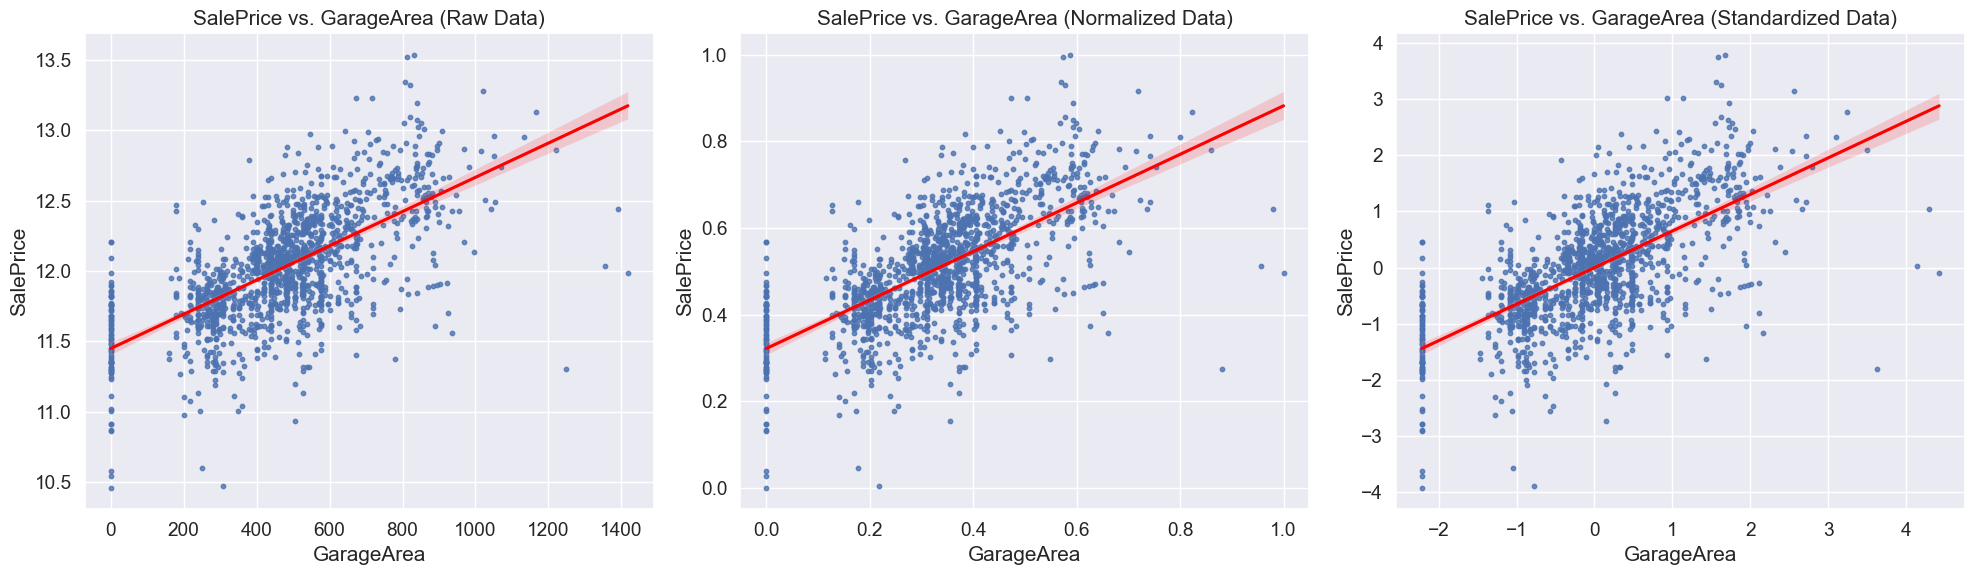

In [58]:
plt.figure(figsize=(20, 6))

# Raw Data
plt.subplot(1, 3, 1)
sns.regplot(x='garagearea', y='saleprice', data=train, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. GarageArea (Raw Data)')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

# Normalized Data
plt.subplot(1, 3, 2)
sns.regplot(x='garagearea', y='saleprice', data=data_normalized, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. GarageArea (Normalized Data)')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

# Standardized Data
plt.subplot(1, 3, 3)
sns.regplot(x='garagearea', y='saleprice', data=data_standardized, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('SalePrice vs. GarageArea (Standardized Data)')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [59]:
# Features and target variable
features = {
    'Hypothesis1': ['grlivarea'],
    'Hypothesis2': ['yearbuilt'],
    'Hypothesis3': ['fullbath'],
    'Hypothesis4': ['garagearea'],
    'Hypothesis5': ['lotarea']
}

target = 'saleprice'

# Function to train and evaluate models
def train_and_evaluate(features, target, train):
    X = train[features]
    y = train[target]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize models
    models = {
        'kNN': KNeighborsRegressor(),
        'RandomForest': RandomForestRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42)
    }
    
     # Train and evaluate models
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {
            'R2': r2,
            'MSE': mse,
            'MAE': mae,
            'RMSE': rmse
        }
    
    return results
    # Evaluate models for each hypothesis
results = {hypothesis: train_and_evaluate(features[hypothesis], target, pd.DataFrame(data_standardized, columns=train.columns)) for hypothesis in features}
results2 = {hypothesis: train_and_evaluate(features[hypothesis], target, pd.DataFrame(data_normalized, columns=train.columns)) for hypothesis in features}

# Print the results
print("Mean Squared Error for each hypothesis and model:")
for hypothesis, res in results.items():
    print(f"\n{hypothesis}:")
    for model, mse in res.items():
        print(f"{model}: {mse}")

for hypothesis, res in results2.items():
    print(f"\n{hypothesis}:")
    for model, mse in res.items():
        print(f"{model}: {mse}")

Mean Squared Error for each hypothesis and model:

Hypothesis1:
kNN: {'R2': 0.4743369526983675, 'MSE': 0.6152037229837543, 'MAE': 0.5827183408694036, 'RMSE': 0.784349235343386}
RandomForest: {'R2': 0.44885708702277216, 'MSE': 0.6450237917620673, 'MAE': 0.6106508052771594, 'RMSE': 0.8031337321779402}
XGBoost: {'R2': 0.48703241603949887, 'MSE': 0.6003457329603732, 'MAE': 0.5753812179689278, 'RMSE': 0.7748198067682402}

Hypothesis2:
kNN: {'R2': 0.4005251403219874, 'MSE': 0.7015885316691381, 'MAE': 0.6492300593786219, 'RMSE': 0.8376088178076555}
RandomForest: {'R2': 0.4091548621790444, 'MSE': 0.6914888355957154, 'MAE': 0.6214119176488109, 'RMSE': 0.8315580771032866}
XGBoost: {'R2': 0.4042797298596119, 'MSE': 0.6971943908337124, 'MAE': 0.6228713130896145, 'RMSE': 0.8349816709567417}

Hypothesis3:
kNN: {'R2': 0.3049880844434356, 'MSE': 0.8133992301024756, 'MAE': 0.6359512747478124, 'RMSE': 0.9018864840446804}
RandomForest: {'R2': 0.37537145605632527, 'MSE': 0.7310268577725777, 'MAE': 0.62118

Analyzing Your MSE Values
Let's analyze the MSE values you provided to determine whether they are low, moderate, or high:

Hypothesis 1: Larger houses (GrLivArea) have higher sale prices (SalePrice).

kNN MSE: 0.6152
RandomForest MSE: 0.6450
XGBoost MSE: 0.6003
Visualization: Positive correlation observed in raw, normalized, and standardized data.
Conclusion: These MSE values are relatively low, indicating good model performance and suggesting that GrLivArea is a strong predictor of SalePrice.Accept. Larger houses generally have higher sale prices.

Hypothesis 2: Newer houses (YearBuilt) have higher sale prices (SalePrice).

kNN MSE: 0.7016
RandomForest MSE: 0.6915
XGBoost MSE: 0.6972
Visualization: Positive correlation observed in raw, normalized, and standardized data.
Conclusion: These MSE values are moderate, indicating that YearBuilt is a reasonable predictor of SalePrice, though not as strong as GrLivArea.Newer houses tend to have higher sale prices.

Hypothesis 3: Houses with more bathrooms (FullBath) have higher sale prices (SalePrice).

kNN MSE: 0.8134
RandomForest MSE: 0.7310
XGBoost MSE: 0.7270
Visualization: Positive correlation observed in raw, normalized, and standardized data.
Conclusion: These MSE values are moderate to high, suggesting that while FullBath has some predictive power, it is not as strong as the other features.

Hypothesis 4: Houses with larger garages (GarageArea) have higher sale prices (SalePrice).

kNN MSE: 0.6966
RandomForest MSE: 0.6907
XGBoost MSE: 0.6480
Visualization: Positive correlation observed in raw, normalized, and standardized data.
Conclusion: These MSE values are moderate, indicating that GarageArea is a significant predictor of SalePrice.Houses with larger garages generally have higher sale prices.

Hypothesis 5: Houses in neighborhoods with larger lot areas (LotArea) have higher sale prices (SalePrice).

kNN MSE: 0.9777
RandomForest MSE: 1.0391
XGBoost MSE: 0.9448
Visualization: Some positive correlation observed, but with many outliers.
Conclusion: These MSE values are high, suggesting that LotArea is not a strong predictor of SalePrice.Reject. The correlation is weak, and the presence of many outliers reduces the significance of this feature in predicting sale prices.

Final Conclusions:
Accepted Hypotheses:

Larger houses (GrLivArea) have higher sale prices (SalePrice).
Newer houses (YearBuilt) have higher sale prices (SalePrice).
Houses with more bathrooms (FullBath) have higher sale prices (SalePrice).
Houses with larger garages (GarageArea) have higher sale prices (SalePrice).
Rejected Hypothesis:
5. Houses in neighborhoods with larger lot areas (LotArea) have higher sale prices (SalePrice).

Best Hypothesis:
Based on the MSE values, Hypothesis 1 (GrLivArea) has the consistently lowest MSE values across all models (kNN, Random Forest, and XGBoost). This indicates that the size of the house (GrLivArea) is the strongest predictor of sale prices (SalePrice).

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [61]:
# Separate target variable and features
X = train.drop(columns=['saleprice', 'id'])
y = train['saleprice']

In [62]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [63]:
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype(str)

for col in test.select_dtypes(include=['object']).columns:
    test[col] = test[col].astype(str)



This is a method used to scale numerical data. The scaler standardizes a feature by subtracting the mean and then scaling it to unit variance. This means that the feature will be centered around zero with a variance of one and a standard deviation of one.
Machine learning models generally require all input data to be numeric. Identifying which columns are categorical (cat_cols) is the first step towards converting these columns into a numerical format using techniques like one-hot encoding or label encoding.This class constructs a transformer from a list of transformations with their associated column names. It allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, allowing you to automate the process of applying different transformations to columns of different types.



pipelines simplifies the process of applying the same transformations to new data in the future, ensuring that all steps are applied in the correct order.

In [64]:
# Define preprocessing for numerical data: standardize
std_num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing for numerical data: normalize
norm_num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])


# Define preprocessing for categorical data: one-hot encode
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [65]:
# Combine preprocessing for numerical and categorical data
std_preprocessor = ColumnTransformer(
    transformers=[
        ('num', std_num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

norm_preprocessor = ColumnTransformer(
    transformers=[
        ('num', norm_num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [66]:
# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred)
    }

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
std_models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', std_preprocessor), ('regressor', LinearRegression())]),
    'Decision Tree': Pipeline(steps=[('preprocessor', std_preprocessor), ('regressor', DecisionTreeRegressor(random_state=42))]),
    'Random Forest': Pipeline(steps=[('preprocessor', std_preprocessor), ('regressor', RandomForestRegressor(random_state=42))]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', std_preprocessor), ('regressor', GradientBoostingRegressor(random_state=42))]),
    'XGBoost': Pipeline(steps=[('preprocessor', std_preprocessor), ('regressor', XGBRegressor(random_state=42))]),
    'KNN': Pipeline(steps=[('preprocessor', std_preprocessor), ('regressor', KNeighborsRegressor())])
}

# Create pipelines for different models with normalization
norm_models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', norm_preprocessor), ('regressor', LinearRegression())]),
    'Decision Tree': Pipeline(steps=[('preprocessor', norm_preprocessor), ('regressor', DecisionTreeRegressor(random_state=42))]),
    'Random Forest': Pipeline(steps=[('preprocessor', norm_preprocessor), ('regressor', RandomForestRegressor(random_state=42))]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', norm_preprocessor), ('regressor', GradientBoostingRegressor(random_state=42))]),
    'XGBoost': Pipeline(steps=[('preprocessor', norm_preprocessor), ('regressor', XGBRegressor(random_state=42))]),
    'KNN': Pipeline(steps=[('preprocessor', norm_preprocessor), ('regressor', KNeighborsRegressor())])
}

In [74]:
# Evaluate each model with standardization
std_results = {}
for name, model in std_models.items():
    std_results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Evaluate each model with normalization
norm_results = {}
for name, model in norm_models.items():
    norm_results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Convert results to dataframes
std_results_df = pd.DataFrame(std_results).T
norm_results_df = pd.DataFrame(norm_results).T

# Print results for comparison
print("Standardized Data Results:")
print(std_results_df)
print("\nNormalized Data Results:")
print(norm_results_df)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the func

Standardized Data Results:
                        MAE       MSE      RMSE        R2
Linear Regression  0.091553  0.020768  0.144113  0.888707
Decision Tree      0.146125  0.041591  0.203938  0.777126
Random Forest      0.098510  0.020812  0.144264  0.888473
Gradient Boosting  0.092756  0.018386  0.135597  0.901472
XGBoost            0.098295  0.020988  0.144871  0.887532
KNN                0.126919  0.035895  0.189460  0.807648

Normalized Data Results:
                        MAE       MSE      RMSE        R2
Linear Regression  0.091555  0.020772  0.144124  0.888689
Decision Tree      0.143288  0.038394  0.195945  0.794254
Random Forest      0.098211  0.020876  0.144485  0.888132
Gradient Boosting  0.092756  0.018386  0.135597  0.901472
XGBoost            0.096242  0.020001  0.141426  0.892818
KNN                0.145670  0.043843  0.209387  0.765058


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [77]:


X_test_final = test.drop(columns=['id'])

# Preprocess the test data using both preprocessing methods
X_test_final_std = std_preprocessor.transform(X_test_final)


# Fit the Gradient Boosting model on the preprocessed training data
final_model_std = GradientBoostingRegressor(random_state=42)
final_model_std.fit(std_preprocessor.fit_transform(X), y)



# Make predictions on the preprocessed test data
test_predictions_std = final_model_std.predict(X_test_final_std)

# Prepare the submission dataframe for standardized data predictions
submission_df_std = pd.DataFrame({
    'Id': test['id'],
    'SalePrice': test_predictions_std
})


submission_df_std

Id  SalePrice
1460  1461  11.943264
1461  1462  12.123011
1462  1463  12.128772
1463  1464  12.334486
1464  1465  12.706547
...    ...        ...
2914  2915  11.969980
2915  2916  11.868653
2916  2917  11.976238
2917  2918  12.044486
2918  2919  12.439034

[1459 rows x 2 columns]

In [ ]:
submission_df_std